# Test PPO et CPO par Omnisafe

In [ ]:
# Cell 1: Imports, configuration, and helper functions

import omnisafe
import safety_gymnasium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import glob

custom_cfgs = {
    'train_cfgs': {
        'total_steps': 1024000,
        'vector_env_nums': 16,
        'parallel': 1,
        'torch_threads': 1,
    },
    'algo_cfgs': {
        'steps_per_epoch': 16_000,
        'update_iters': 10,
    },
    'logger_cfgs': {
        'use_wandb': False,
        'save_model_freq': 10,
        'log_dir': './results/',
    },
}
env_id = 'SafetyPointGoal1-v0'

def find_seed_dir(base_dir, algo, env_id):
    pattern = os.path.join(base_dir, f"{algo}*{env_id}*")
    runs = glob.glob(pattern)
    if not runs:
        raise FileNotFoundError(f"No run folder matches {pattern}")
    run_dir = runs[0]
    seeds = [d for d in os.listdir(run_dir) if d.startswith('seed-')]
    if not seeds:
        raise FileNotFoundError(f"No seed subfolder under {run_dir}")
    return os.path.join(run_dir, seeds[0])

def load_from_csv(algo, env_id, base_dir='./results/'):
    seed_dir = find_seed_dir(base_dir, algo, env_id)
    csv_path = os.path.join(seed_dir, 'progress.csv')
    df = pd.read_csv(csv_path)
    reward_cols = [c for c in df.columns if 'EpRet' in c or 'Reward' in c]
    cost_cols   = [c for c in df.columns if 'EpCost' in c or 'Cost' in c]
    if not reward_cols or not cost_cols:
        print("Available columns:", df.columns.tolist())
        raise KeyError("Couldn't find reward or cost columns in progress.csv")
    rewards = df[reward_cols[0]].to_numpy()
    costs   = df[cost_cols[0]].to_numpy()
    return rewards, costs


In [ ]:
# Cell 2: Train PPO

ppo_agent = omnisafe.Agent('PPO', env_id=env_id, custom_cfgs=custom_cfgs)
ppo_agent.learn()


Loading PPO.yaml from /home/chaos/miniconda3/envs/safe_rl/lib/python3.10/site-packages/omnisafe/utils/../configs/on-policy/PPO.yaml


Logging data to ./results/PPO-{SafetyPointGoal1-v0}/seed-000-2025-05-01-22-39-34/progress.csv

Save with config in config.json

INFO: Start training

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.4135296642780304    │
│ Metrics/EpCost                │ 70.375                 │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 0.0                    │
│ Train/Entropy                 │ 1.413534164428711      │
│ Train/KL                      │ 0.013913876377046108   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9995099902153015     │
│ Train/PolicyRatio/Min         │ 0.9995099902153015     │
│ Train/PolicyRatio/Max         │ 0.9995099902153015     │
│ Train/PolicyRatio/Std         │ 0.018280720338225365   │
│ Train/LR                      │ 0.00029531249310821295 │
│ Train/PolicyStd               │ 0.9946256875991821     │
│ TotalEnvSteps                 │ 16000.0                │
│ Loss/Loss_pi                  │ -0.012713826261460781  │
│ Loss/Loss_pi/Delta            │ -0.012713826261460781  │
│ Value/Adv                     │ 0.04275118559598923    │
│ Loss/Loss_reward_critic       │ 0.00788282509893179    │
│ Loss/Loss_reward_critic/Delta │ 0.00788282509893179    │
│ Value/reward                  │ -0.015424421988427639  │
│ Time/Total                    │ 8.434455871582031      │
│ Time/Rollout                  │ 4.2847700119018555     │
│ Time/Update                   │ 4.149119853973389      │
│ Time/Epoch                    │ 8.43391227722168       │
│ Time/FPS                      │ 1897.1031494140625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 0.1969633400440216     │
│ Metrics/EpCost                │ 75.59375               │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 1.0                    │
│ Train/Entropy                 │ 1.4080932140350342     │
│ Train/KL                      │ 0.010514818131923676   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000610589981079      │
│ Train/PolicyRatio/Min         │ 1.000610589981079      │
│ Train/PolicyRatio/Max         │ 1.000610589981079      │
│ Train/PolicyRatio/Std         │ 0.018671713769435883   │
│ Train/LR                      │ 0.00029062500107102096 │
│ Train/PolicyStd               │ 0.9892299771308899     │
│ TotalEnvSteps                 │ 32000.0                │
│ Loss/Loss_pi                  │ -0.008600307628512383  │
│ Loss/Loss_pi/Delta            │ 0.004113518632948399   │
│ Value/Adv                     │ -0.14843107759952545   │
│ Loss/Loss_reward_critic       │ 0.005489876493811607   │
│ Loss/Loss_reward_critic/Delta │ -0.002392948605120182  │
│ Value/reward                  │ 0.022585801780223846   │
│ Time/Total                    │ 17.063783645629883     │
│ Time/Rollout                  │ 4.4563798904418945     │
│ Time/Update                   │ 4.167737007141113      │
│ Time/Epoch                    │ 8.624136924743652      │
│ Time/FPS                      │ 1855.25830078125       │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 0.4218323230743408     │
│ Metrics/EpCost                │ 69.25                  │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 2.0                    │
│ Train/Entropy                 │ 1.3927264213562012     │
│ Train/KL                      │ 0.012704326771199703   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9984171986579895     │
│ Train/PolicyRatio/Min         │ 0.9984171986579895     │
│ Train/PolicyRatio/Max         │ 0.9984171986579895     │
│ Train/PolicyRatio/Std         │ 0.01970626413822174    │
│ Train/LR                      │ 0.000285937509033829   │
│ Train/PolicyStd               │ 0.9741568565368652     │
│ TotalEnvSteps                 │ 48000.0                │
│ Loss/Loss_pi                  │ -0.011450161226093769  │
│ Loss/Loss_pi/Delta            │ -0.0028498535975813866 │
│ Value/Adv                     │ -0.07911579310894012   │
│ Loss/Loss_reward_critic       │ 0.004565709736198187   │
│ Loss/Loss_reward_critic/Delta │ -0.0009241667576134205 │
│ Value/reward                  │ 0.015676891431212425   │
│ Time/Total                    │ 25.7219295501709       │
│ Time/Rollout                  │ 4.372578144073486      │
│ Time/Update                   │ 4.280407905578613      │
│ Time/Epoch                    │ 8.653016090393066      │
│ Time/FPS                      │ 1849.06640625          │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.7132055759429932     │
│ Metrics/EpCost                │ 73.73999786376953      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 3.0                    │
│ Train/Entropy                 │ 1.3797625303268433     │
│ Train/KL                      │ 0.009689370170235634   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000006079673767      │
│ Train/PolicyRatio/Min         │ 1.000006079673767      │
│ Train/PolicyRatio/Max         │ 1.000006079673767      │
│ Train/PolicyRatio/Std         │ 0.017514558508992195   │
│ Train/LR                      │ 0.00028124998789280653 │
│ Train/PolicyStd               │ 0.9616278409957886     │
│ TotalEnvSteps                 │ 64000.0                │
│ Loss/Loss_pi                  │ -0.006872164085507393  │
│ Loss/Loss_pi/Delta            │ 0.004577997140586376   │
│ Value/Adv                     │ 0.21711578965187073    │
│ Loss/Loss_reward_critic       │ 0.011042620055377483   │
│ Loss/Loss_reward_critic/Delta │ 0.0064769103191792965  │
│ Value/reward                  │ 0.10040485858917236    │
│ Time/Total                    │ 34.207706451416016     │
│ Time/Rollout                  │ 4.324052810668945      │
│ Time/Update                   │ 4.156596660614014      │
│ Time/Epoch                    │ 8.480669021606445      │
│ Time/FPS                      │ 1886.6435546875        │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.5387253761291504     │
│ Metrics/EpCost                │ 81.87999725341797      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 4.0                    │
│ Train/Entropy                 │ 1.3658939599990845     │
│ Train/KL                      │ 0.009618080221116543   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9991714954376221     │
│ Train/PolicyRatio/Min         │ 0.9991714954376221     │
│ Train/PolicyRatio/Max         │ 0.9991714954376221     │
│ Train/PolicyRatio/Std         │ 0.016334258019924164   │
│ Train/LR                      │ 0.00027656249585561454 │
│ Train/PolicyStd               │ 0.9483517408370972     │
│ TotalEnvSteps                 │ 80000.0                │
│ Loss/Loss_pi                  │ -0.005924958270043135  │
│ Loss/Loss_pi/Delta            │ 0.0009472058154642582  │
│ Value/Adv                     │ 0.1774141639471054     │
│ Loss/Loss_reward_critic       │ 0.00979485735297203    │
│ Loss/Loss_reward_critic/Delta │ -0.0012477627024054527 │
│ Value/reward                  │ 0.09930551052093506    │
│ Time/Total                    │ 42.81678771972656      │
│ Time/Rollout                  │ 4.399226188659668      │
│ Time/Update                   │ 4.204838752746582      │
│ Time/Epoch                    │ 8.604093551635742      │
│ Time/FPS                      │ 1859.580078125         │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 4.099581718444824      │
│ Metrics/EpCost                │ 96.23999786376953      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 5.0                    │
│ Train/Entropy                 │ 1.3401238918304443     │
│ Train/KL                      │ 0.010149571113288403   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994704127311707     │
│ Train/PolicyRatio/Min         │ 0.9994704127311707     │
│ Train/PolicyRatio/Max         │ 0.9994704127311707     │
│ Train/PolicyRatio/Std         │ 0.015866313129663467   │
│ Train/LR                      │ 0.00027187500381842256 │
│ Train/PolicyStd               │ 0.9242597818374634     │
│ TotalEnvSteps                 │ 96000.0                │
│ Loss/Loss_pi                  │ -0.007842842489480972  │
│ Loss/Loss_pi/Delta            │ -0.0019178842194378376 │
│ Value/Adv                     │ 0.2933468818664551     │
│ Loss/Loss_reward_critic       │ 0.015518011525273323   │
│ Loss/Loss_reward_critic/Delta │ 0.005723154172301292   │
│ Value/reward                  │ 0.18744823336601257    │
│ Time/Total                    │ 51.446041107177734     │
│ Time/Rollout                  │ 4.444511413574219      │
│ Time/Update                   │ 4.179855823516846      │
│ Time/Epoch                    │ 8.624387741088867      │
│ Time/FPS                      │ 1855.2042236328125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 4.8795881271362305     │
│ Metrics/EpCost                │ 109.45999908447266     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 6.0                    │
│ Train/Entropy                 │ 1.3203765153884888     │
│ Train/KL                      │ 0.009959935210645199   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9979873299598694     │
│ Train/PolicyRatio/Min         │ 0.9979873299598694     │
│ Train/PolicyRatio/Max         │ 0.9979873299598694     │
│ Train/PolicyRatio/Std         │ 0.016973085701465607   │
│ Train/LR                      │ 0.00026718751178123057 │
│ Train/PolicyStd               │ 0.9062474370002747     │
│ TotalEnvSteps                 │ 112000.0               │
│ Loss/Loss_pi                  │ -0.007973420433700085  │
│ Loss/Loss_pi/Delta            │ -0.0001305779442191124 │
│ Value/Adv                     │ -0.1278388500213623    │
│ Loss/Loss_reward_critic       │ 0.015534250065684319   │
│ Loss/Loss_reward_critic/Delta │ 1.6238540410995483e-05 │
│ Value/reward                  │ 0.2553674280643463     │
│ Time/Total                    │ 59.969879150390625     │
│ Time/Rollout                  │ 4.3304572105407715     │
│ Time/Update                   │ 4.188365936279297      │
│ Time/Epoch                    │ 8.518841743469238      │
│ Time/FPS                      │ 1878.189697265625      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.456727981567383      │
│ Metrics/EpCost                │ 105.04000091552734     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 7.0                    │
│ Train/Entropy                 │ 1.2959755659103394     │
│ Train/KL                      │ 0.008542733266949654   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994502067565918     │
│ Train/PolicyRatio/Min         │ 0.9994502067565918     │
│ Train/PolicyRatio/Max         │ 0.9994502067565918     │
│ Train/PolicyRatio/Std         │ 0.015653762966394424   │
│ Train/LR                      │ 0.0002624999906402081  │
│ Train/PolicyStd               │ 0.8845105171203613     │
│ TotalEnvSteps                 │ 128000.0               │
│ Loss/Loss_pi                  │ -0.008287917822599411  │
│ Loss/Loss_pi/Delta            │ -0.0003144973888993263 │
│ Value/Adv                     │ -0.027475474402308464  │
│ Loss/Loss_reward_critic       │ 0.015088513493537903   │
│ Loss/Loss_reward_critic/Delta │ -0.0004457365721464157 │
│ Value/reward                  │ 0.3368537724018097     │
│ Time/Total                    │ 68.4431381225586       │
│ Time/Rollout                  │ 4.293887138366699      │
│ Time/Update                   │ 4.174802780151367      │
│ Time/Epoch                    │ 8.468708038330078      │
│ Time/FPS                      │ 1889.3082275390625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 8.913885116577148      │
│ Metrics/EpCost                │ 86.76000213623047      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 8.0                    │
│ Train/Entropy                 │ 1.272990107536316      │
│ Train/KL                      │ 0.010128794237971306   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9990538954734802     │
│ Train/PolicyRatio/Min         │ 0.9990538954734802     │
│ Train/PolicyRatio/Max         │ 0.9990538954734802     │
│ Train/PolicyRatio/Std         │ 0.017301535233855247   │
│ Train/LR                      │ 0.00025781249860301614 │
│ Train/PolicyStd               │ 0.8645219802856445     │
│ TotalEnvSteps                 │ 144000.0               │
│ Loss/Loss_pi                  │ -0.010355361737310886  │
│ Loss/Loss_pi/Delta            │ -0.0020674439147114754 │
│ Value/Adv                     │ 0.05698961764574051    │
│ Loss/Loss_reward_critic       │ 0.020224060863256454   │
│ Loss/Loss_reward_critic/Delta │ 0.005135547369718552   │
│ Value/reward                  │ 0.5538605451583862     │
│ Time/Total                    │ 76.96728515625         │
│ Time/Rollout                  │ 4.3483171463012695     │
│ Time/Update                   │ 4.170676231384277      │
│ Time/Epoch                    │ 8.519010543823242      │
│ Time/FPS                      │ 1878.1524658203125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 11.005636215209961     │
│ Metrics/EpCost                │ 85.0199966430664       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 9.0                    │
│ Train/Entropy                 │ 1.2482800483703613     │
│ Train/KL                      │ 0.010129005648195744   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999962329864502      │
│ Train/PolicyRatio/Min         │ 0.999962329864502      │
│ Train/PolicyRatio/Max         │ 0.999962329864502      │
│ Train/PolicyRatio/Std         │ 0.016996178776025772   │
│ Train/LR                      │ 0.00025312500656582415 │
│ Train/PolicyStd               │ 0.8436718583106995     │
│ TotalEnvSteps                 │ 160000.0               │
│ Loss/Loss_pi                  │ -0.011333948001265526  │
│ Loss/Loss_pi/Delta            │ -0.0009785862639546394 │
│ Value/Adv                     │ 0.14312893152236938    │
│ Loss/Loss_reward_critic       │ 0.018331164494156837   │
│ Loss/Loss_reward_critic/Delta │ -0.001892896369099617  │
│ Value/reward                  │ 0.6379979252815247     │
│ Time/Total                    │ 85.51958465576172      │
│ Time/Rollout                  │ 4.405062675476074      │
│ Time/Update                   │ 4.142141342163086      │
│ Time/Epoch                    │ 8.547228813171387      │
│ Time/FPS                      │ 1871.9517822265625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 12.779278755187988     │
│ Metrics/EpCost                │ 82.80000305175781      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 10.0                   │
│ Train/Entropy                 │ 1.2206144332885742     │
│ Train/KL                      │ 0.011333074420690536   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9978234171867371     │
│ Train/PolicyRatio/Min         │ 0.9978234171867371     │
│ Train/PolicyRatio/Max         │ 0.9978234171867371     │
│ Train/PolicyRatio/Std         │ 0.017398875206708908   │
│ Train/LR                      │ 0.00024843751452863216 │
│ Train/PolicyStd               │ 0.8209674954414368     │
│ TotalEnvSteps                 │ 176000.0               │
│ Loss/Loss_pi                  │ -0.012091735377907753  │
│ Loss/Loss_pi/Delta            │ -0.0007577873766422272 │
│ Value/Adv                     │ 0.21460160613059998    │
│ Loss/Loss_reward_critic       │ 0.01737665757536888    │
│ Loss/Loss_reward_critic/Delta │ -0.0009545069187879562 │
│ Value/reward                  │ 0.6822777390480042     │
│ Time/Total                    │ 94.15631866455078      │
│ Time/Rollout                  │ 4.466858863830566      │
│ Time/Update                   │ 4.1642680168151855     │
│ Time/Epoch                    │ 8.63115119934082       │
│ Time/FPS                      │ 1853.75048828125       │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 13.924919128417969     │
│ Metrics/EpCost                │ 89.69999694824219      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 11.0                   │
│ Train/Entropy                 │ 1.2015633583068848     │
│ Train/KL                      │ 0.009408165700733662   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9977862238883972     │
│ Train/PolicyRatio/Min         │ 0.9977862238883972     │
│ Train/PolicyRatio/Max         │ 0.9977862238883972     │
│ Train/PolicyRatio/Std         │ 0.016237176954746246   │
│ Train/LR                      │ 0.00024374999338760972 │
│ Train/PolicyStd               │ 0.8058079481124878     │
│ TotalEnvSteps                 │ 192000.0               │
│ Loss/Loss_pi                  │ -0.011705365963280201  │
│ Loss/Loss_pi/Delta            │ 0.00038636941462755203 │
│ Value/Adv                     │ 0.04874236136674881    │
│ Loss/Loss_reward_critic       │ 0.018741363659501076   │
│ Loss/Loss_reward_critic/Delta │ 0.0013647060841321945  │
│ Value/reward                  │ 0.8927403688430786     │
│ Time/Total                    │ 102.75482940673828     │
│ Time/Rollout                  │ 4.449889659881592      │
│ Time/Update                   │ 4.1435227394104        │
│ Time/Epoch                    │ 8.593433380126953      │
│ Time/FPS                      │ 1861.8868408203125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 15.149785995483398     │
│ Metrics/EpCost                │ 78.0                   │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 12.0                   │
│ Train/Entropy                 │ 1.17825186252594       │
│ Train/KL                      │ 0.00887850672006607    │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9979058504104614     │
│ Train/PolicyRatio/Min         │ 0.9979058504104614     │
│ Train/PolicyRatio/Max         │ 0.9979058504104614     │
│ Train/PolicyRatio/Std         │ 0.015603351406753063   │
│ Train/LR                      │ 0.00023906250135041773 │
│ Train/PolicyStd               │ 0.7875398993492126     │
│ TotalEnvSteps                 │ 208000.0               │
│ Loss/Loss_pi                  │ -0.00896149780601263   │
│ Loss/Loss_pi/Delta            │ 0.0027438681572675705  │
│ Value/Adv                     │ 0.06368976831436157    │
│ Loss/Loss_reward_critic       │ 0.022397356107831      │
│ Loss/Loss_reward_critic/Delta │ 0.0036559924483299255  │
│ Value/reward                  │ 1.008160948753357      │
│ Time/Total                    │ 111.33565521240234     │
│ Time/Rollout                  │ 4.442595481872559      │
│ Time/Update                   │ 4.133396148681641      │
│ Time/Epoch                    │ 8.576009750366211      │
│ Time/FPS                      │ 1865.6695556640625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 16.812992095947266     │
│ Metrics/EpCost                │ 73.0                   │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 13.0                   │
│ Train/Entropy                 │ 1.1544127464294434     │
│ Train/KL                      │ 0.013352264650166035   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999138593673706      │
│ Train/PolicyRatio/Min         │ 0.999138593673706      │
│ Train/PolicyRatio/Max         │ 0.999138593673706      │
│ Train/PolicyRatio/Std         │ 0.01619008742272854    │
│ Train/LR                      │ 0.00023437499476131052 │
│ Train/PolicyStd               │ 0.7691763043403625     │
│ TotalEnvSteps                 │ 224000.0               │
│ Loss/Loss_pi                  │ -0.011138365603983402  │
│ Loss/Loss_pi/Delta            │ -0.002176867797970772  │
│ Value/Adv                     │ 0.012120924890041351   │
│ Loss/Loss_reward_critic       │ 0.018972812220454216   │
│ Loss/Loss_reward_critic/Delta │ -0.0034245438873767853 │
│ Value/reward                  │ 1.1180965900421143     │
│ Time/Total                    │ 120.02447509765625     │
│ Time/Rollout                  │ 4.463191509246826      │
│ Time/Update                   │ 4.220621109008789      │
│ Time/Epoch                    │ 8.683830261230469      │
│ Time/FPS                      │ 1842.5048828125        │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 18.206432342529297     │
│ Metrics/EpCost                │ 65.4800033569336       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 14.0                   │
│ Train/Entropy                 │ 1.1257164478302002     │
│ Train/KL                      │ 0.008977054618299007   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0004345178604126     │
│ Train/PolicyRatio/Min         │ 1.0004345178604126     │
│ Train/PolicyRatio/Max         │ 1.0004345178604126     │
│ Train/PolicyRatio/Std         │ 0.015065787360072136   │
│ Train/LR                      │ 0.00022968750272411853 │
│ Train/PolicyStd               │ 0.7474998235702515     │
│ TotalEnvSteps                 │ 240000.0               │
│ Loss/Loss_pi                  │ -0.009405487217009068  │
│ Loss/Loss_pi/Delta            │ 0.0017328783869743347  │
│ Value/Adv                     │ -0.040780555456876755  │
│ Loss/Loss_reward_critic       │ 0.0257333405315876     │
│ Loss/Loss_reward_critic/Delta │ 0.006760528311133385   │
│ Value/reward                  │ 1.278602123260498      │
│ Time/Total                    │ 128.60801696777344     │
│ Time/Rollout                  │ 4.420510292053223      │
│ Time/Update                   │ 4.158231258392334      │
│ Time/Epoch                    │ 8.578761100769043      │
│ Time/FPS                      │ 1865.0711669921875     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 19.333934783935547     │
│ Metrics/EpCost                │ 64.27999877929688      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 15.0                   │
│ Train/Entropy                 │ 1.1098945140838623     │
│ Train/KL                      │ 0.00977660994976759    │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9989232420921326     │
│ Train/PolicyRatio/Min         │ 0.9989232420921326     │
│ Train/PolicyRatio/Max         │ 0.9989232420921326     │
│ Train/PolicyRatio/Std         │ 0.015254939906299114   │
│ Train/LR                      │ 0.00022499999613501132 │
│ Train/PolicyStd               │ 0.7361613512039185     │
│ TotalEnvSteps                 │ 256000.0               │
│ Loss/Loss_pi                  │ -0.00874335877597332   │
│ Loss/Loss_pi/Delta            │ 0.0006621284410357475  │
│ Value/Adv                     │ 0.019495312124490738   │
│ Loss/Loss_reward_critic       │ 0.024150708690285683   │
│ Loss/Loss_reward_critic/Delta │ -0.001582631841301918  │
│ Value/reward                  │ 1.414036750793457      │
│ Time/Total                    │ 137.1920623779297      │
│ Time/Rollout                  │ 4.398568153381348      │
│ Time/Update                   │ 4.180603981018066      │
│ Time/Epoch                    │ 8.579191207885742      │
│ Time/FPS                      │ 1864.9776611328125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 20.48760223388672      │
│ Metrics/EpCost                │ 62.13999938964844      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 16.0                   │
│ Train/Entropy                 │ 1.089054822921753      │
│ Train/KL                      │ 0.01057996042072773    │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0000077486038208     │
│ Train/PolicyRatio/Min         │ 1.0000077486038208     │
│ Train/PolicyRatio/Max         │ 1.0000077486038208     │
│ Train/PolicyRatio/Std         │ 0.015104229561984539   │
│ Train/LR                      │ 0.00022031250409781933 │
│ Train/PolicyStd               │ 0.7212773561477661     │
│ TotalEnvSteps                 │ 272000.0               │
│ Loss/Loss_pi                  │ -0.008571584708988667  │
│ Loss/Loss_pi/Delta            │ 0.00017177406698465347 │
│ Value/Adv                     │ 0.022026026621460915   │
│ Loss/Loss_reward_critic       │ 0.02378470078110695    │
│ Loss/Loss_reward_critic/Delta │ -0.0003660079091787338 │
│ Value/reward                  │ 1.4787811040878296     │
│ Time/Total                    │ 145.7068634033203      │
│ Time/Rollout                  │ 4.32951021194458       │
│ Time/Update                   │ 4.180177688598633      │
│ Time/Epoch                    │ 8.509708404541016      │
│ Time/FPS                      │ 1880.2054443359375     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 21.26691246032715       │
│ Metrics/EpCost                │ 61.29999923706055       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 17.0                    │
│ Train/Entropy                 │ 1.070546269416809       │
│ Train/KL                      │ 0.008032966405153275    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9988691210746765      │
│ Train/PolicyRatio/Min         │ 0.9988691210746765      │
│ Train/PolicyRatio/Max         │ 0.9988691210746765      │
│ Train/PolicyRatio/Std         │ 0.0147163150832057      │
│ Train/LR                      │ 0.0002156249975087121   │
│ Train/PolicyStd               │ 0.7081602811813354      │
│ TotalEnvSteps                 │ 288000.0                │
│ Loss/Loss_pi                  │ -0.008864819072186947   │
│ Loss/Loss_pi/Delta            │ -0.00029323436319828033 │
│ Value/Adv                     │ -0.18958765268325806    │
│ Loss/Loss_reward_critic       │ 0.02453797683119774     │
│ Loss/Loss_reward_critic/Delta │ 0.0007532760500907898   │
│ Value/reward                  │ 1.5939472913742065      │
│ Time/Total                    │ 154.27682495117188      │
│ Time/Rollout                  │ 4.418262481689453       │
│ Time/Update                   │ 4.146514892578125       │
│ Time/Epoch                    │ 8.564801216125488       │
│ Time/FPS                      │ 1868.1112060546875      │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 21.781877517700195     │
│ Metrics/EpCost                │ 60.099998474121094     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 18.0                   │
│ Train/Entropy                 │ 1.0512925386428833     │
│ Train/KL                      │ 0.008872286416590214   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9988395571708679     │
│ Train/PolicyRatio/Min         │ 0.9988395571708679     │
│ Train/PolicyRatio/Max         │ 0.9988395571708679     │
│ Train/PolicyRatio/Std         │ 0.0149045679718256     │
│ Train/LR                      │ 0.00021093750547152013 │
│ Train/PolicyStd               │ 0.6951580047607422     │
│ TotalEnvSteps                 │ 304000.0               │
│ Loss/Loss_pi                  │ -0.009475532919168472  │
│ Loss/Loss_pi/Delta            │ -0.0006107138469815254 │
│ Value/Adv                     │ -0.01570034772157669   │
│ Loss/Loss_reward_critic       │ 0.01962273381650448    │
│ Loss/Loss_reward_critic/Delta │ -0.00491524301469326   │
│ Value/reward                  │ 1.7127114534378052     │
│ Time/Total                    │ 162.7672882080078      │
│ Time/Rollout                  │ 4.308281898498535      │
│ Time/Update                   │ 4.177026748657227      │
│ Time/Epoch                    │ 8.48532772064209       │
│ Time/FPS                      │ 1885.6080322265625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.19304847717285     │
│ Metrics/EpCost                │ 55.779998779296875    │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 19.0                  │
│ Train/Entropy                 │ 1.0339897871017456    │
│ Train/KL                      │ 0.009880670346319675  │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 0.9988209009170532    │
│ Train/PolicyRatio/Min         │ 0.9988209009170532    │
│ Train/PolicyRatio/Max         │ 0.9988209009170532    │
│ Train/PolicyRatio/Std         │ 0.015368610620498657  │
│ Train/LR                      │ 0.0002062499988824129 │
│ Train/PolicyStd               │ 0.683326780796051     │
│ TotalEnvSteps                 │ 320000.0              │
│ Loss/Loss_pi                  │ -0.008751495741307735 │
│ Loss/Loss_pi/Delta            │ 0.0007240371778607368 │
│ Value/Adv                     │ 0.0896918773651123    │
│ Loss/Loss_reward_critic       │ 0.02133495919406414   │
│ Loss/Loss_reward_critic/Delta │ 0.0017122253775596619 │
│ Value/reward                  │ 1.78280508518219      │
│ Time/Total                    │ 171.48683166503906    │
│ Time/Rollout                  │ 4.539762496948242     │
│ Time/Update                   │ 4.174882888793945     │
│ Time/Epoch                    │ 8.714670181274414     │
│ Time/FPS                      │ 1835.9847412109375    │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.270648956298828     │
│ Metrics/EpCost                │ 54.279998779296875     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 20.0                   │
│ Train/Entropy                 │ 1.0227359533309937     │
│ Train/KL                      │ 0.008552901446819305   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9998721480369568     │
│ Train/PolicyRatio/Min         │ 0.9998721480369568     │
│ Train/PolicyRatio/Max         │ 0.9998721480369568     │
│ Train/PolicyRatio/Std         │ 0.014462933875620365   │
│ Train/LR                      │ 0.00020156250684522092 │
│ Train/PolicyStd               │ 0.675926685333252      │
│ TotalEnvSteps                 │ 336000.0               │
│ Loss/Loss_pi                  │ -0.007270348258316517  │
│ Loss/Loss_pi/Delta            │ 0.0014811474829912186  │
│ Value/Adv                     │ -0.08478887379169464   │
│ Loss/Loss_reward_critic       │ 0.02292708493769169    │
│ Loss/Loss_reward_critic/Delta │ 0.0015921257436275482  │
│ Value/reward                  │ 1.8369609117507935     │
│ Time/Total                    │ 180.02708435058594     │
│ Time/Rollout                  │ 4.344117164611816      │
│ Time/Update                   │ 4.189766883850098      │
│ Time/Epoch                    │ 8.533903121948242      │
│ Time/FPS                      │ 1874.874755859375      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.583078384399414     │
│ Metrics/EpCost                │ 56.459999084472656     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 21.0                   │
│ Train/Entropy                 │ 1.0087215900421143     │
│ Train/KL                      │ 0.007879328913986683   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9998536109924316     │
│ Train/PolicyRatio/Min         │ 0.9998536109924316     │
│ Train/PolicyRatio/Max         │ 0.9998536109924316     │
│ Train/PolicyRatio/Std         │ 0.014909634366631508   │
│ Train/LR                      │ 0.0001968750002561137  │
│ Train/PolicyStd               │ 0.6663925647735596     │
│ TotalEnvSteps                 │ 352000.0               │
│ Loss/Loss_pi                  │ -0.009170533157885075  │
│ Loss/Loss_pi/Delta            │ -0.0019001848995685577 │
│ Value/Adv                     │ -0.00826062262058258   │
│ Loss/Loss_reward_critic       │ 0.021610483527183533   │
│ Loss/Loss_reward_critic/Delta │ -0.0013166014105081558 │
│ Value/reward                  │ 1.9306507110595703     │
│ Time/Total                    │ 188.63987731933594     │
│ Time/Rollout                  │ 4.4152421951293945     │
│ Time/Update                   │ 4.192476272583008      │
│ Time/Epoch                    │ 8.607741355895996      │
│ Time/FPS                      │ 1858.7918701171875     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.033292770385742     │
│ Metrics/EpCost                │ 57.119998931884766     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 22.0                   │
│ Train/Entropy                 │ 0.98296719789505       │
│ Train/KL                      │ 0.0093735596165061     │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9999912977218628     │
│ Train/PolicyRatio/Min         │ 0.9999912977218628     │
│ Train/PolicyRatio/Max         │ 0.9999912977218628     │
│ Train/PolicyRatio/Std         │ 0.014973226003348827   │
│ Train/LR                      │ 0.0001921874936670065  │
│ Train/PolicyStd               │ 0.6496399641036987     │
│ TotalEnvSteps                 │ 368000.0               │
│ Loss/Loss_pi                  │ -0.008478005416691303  │
│ Loss/Loss_pi/Delta            │ 0.0006925277411937714  │
│ Value/Adv                     │ 0.298030287027359      │
│ Loss/Loss_reward_critic       │ 0.02056407555937767    │
│ Loss/Loss_reward_critic/Delta │ -0.0010464079678058624 │
│ Value/reward                  │ 1.9959439039230347     │
│ Time/Total                    │ 197.28643798828125     │
│ Time/Rollout                  │ 4.4691314697265625     │
│ Time/Update                   │ 4.172293663024902      │
│ Time/Epoch                    │ 8.641444206237793      │
│ Time/FPS                      │ 1851.5423583984375     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.60955047607422      │
│ Metrics/EpCost                │ 59.2400016784668       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 23.0                   │
│ Train/Entropy                 │ 0.9634829163551331     │
│ Train/KL                      │ 0.00871601328253746    │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000610113143921      │
│ Train/PolicyRatio/Min         │ 1.000610113143921      │
│ Train/PolicyRatio/Max         │ 1.000610113143921      │
│ Train/PolicyRatio/Std         │ 0.01524581853300333    │
│ Train/LR                      │ 0.0001875000016298145  │
│ Train/PolicyStd               │ 0.6372851729393005     │
│ TotalEnvSteps                 │ 384000.0               │
│ Loss/Loss_pi                  │ -0.008106062188744545  │
│ Loss/Loss_pi/Delta            │ 0.00037194322794675827 │
│ Value/Adv                     │ 0.041303642094135284   │
│ Loss/Loss_reward_critic       │ 0.021564532071352005   │
│ Loss/Loss_reward_critic/Delta │ 0.0010004565119743347  │
│ Value/reward                  │ 2.078793525695801      │
│ Time/Total                    │ 205.8430938720703      │
│ Time/Rollout                  │ 4.37574577331543       │
│ Time/Update                   │ 4.176333904266357      │
│ Time/Epoch                    │ 8.552099227905273      │
│ Time/FPS                      │ 1870.8857421875        │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.413236618041992    │
│ Metrics/EpCost                │ 56.900001525878906    │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 24.0                  │
│ Train/Entropy                 │ 0.9542802572250366    │
│ Train/KL                      │ 0.006878037005662918  │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 0.9991052746772766    │
│ Train/PolicyRatio/Min         │ 0.9991052746772766    │
│ Train/PolicyRatio/Max         │ 0.9991052746772766    │
│ Train/PolicyRatio/Std         │ 0.013981598429381847  │
│ Train/LR                      │ 0.0001828124950407073 │
│ Train/PolicyStd               │ 0.6318684220314026    │
│ TotalEnvSteps                 │ 400000.0              │
│ Loss/Loss_pi                  │ -0.006274288985878229 │
│ Loss/Loss_pi/Delta            │ 0.0018317732028663158 │
│ Value/Adv                     │ -0.04747052490711212  │
│ Loss/Loss_reward_critic       │ 0.019069761037826538  │
│ Loss/Loss_reward_critic/Delta │ -0.002494771033525467 │
│ Value/reward                  │ 2.1126389503479004    │
│ Time/Total                    │ 214.42652893066406    │
│ Time/Rollout                  │ 4.396786689758301     │
│ Time/Update                   │ 4.181310653686523     │
│ Time/Epoch                    │ 8.578147888183594     │
│ Time/FPS                      │ 1865.20458984375      │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.450088500976562     │
│ Metrics/EpCost                │ 64.37999725341797      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 25.0                   │
│ Train/Entropy                 │ 0.9398781061172485     │
│ Train/KL                      │ 0.009128001518547535   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994120001792908     │
│ Train/PolicyRatio/Min         │ 0.9994120001792908     │
│ Train/PolicyRatio/Max         │ 0.9994120001792908     │
│ Train/PolicyRatio/Std         │ 0.015042765066027641   │
│ Train/LR                      │ 0.0001781250030035153  │
│ Train/PolicyStd               │ 0.6231069564819336     │
│ TotalEnvSteps                 │ 416000.0               │
│ Loss/Loss_pi                  │ -0.0081108333542943    │
│ Loss/Loss_pi/Delta            │ -0.001836544368416071  │
│ Value/Adv                     │ 0.1370951533317566     │
│ Loss/Loss_reward_critic       │ 0.018527956679463387   │
│ Loss/Loss_reward_critic/Delta │ -0.0005418043583631516 │
│ Value/reward                  │ 2.1396615505218506     │
│ Time/Total                    │ 223.00192260742188     │
│ Time/Rollout                  │ 4.376305103302002      │
│ Time/Update                   │ 4.1936187744140625     │
│ Time/Epoch                    │ 8.56994342803955       │
│ Time/FPS                      │ 1866.9903564453125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.474628448486328     │
│ Metrics/EpCost                │ 60.779998779296875     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 26.0                   │
│ Train/Entropy                 │ 0.9167634844779968     │
│ Train/KL                      │ 0.008075270801782608   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0002936124801636     │
│ Train/PolicyRatio/Min         │ 1.0002936124801636     │
│ Train/PolicyRatio/Max         │ 1.0002936124801636     │
│ Train/PolicyRatio/Std         │ 0.01532962266355753    │
│ Train/LR                      │ 0.0001734374964144081  │
│ Train/PolicyStd               │ 0.6093006134033203     │
│ TotalEnvSteps                 │ 432000.0               │
│ Loss/Loss_pi                  │ -0.009940685704350471  │
│ Loss/Loss_pi/Delta            │ -0.0018298523500561714 │
│ Value/Adv                     │ -0.18391820788383484   │
│ Loss/Loss_reward_critic       │ 0.016821343451738358   │
│ Loss/Loss_reward_critic/Delta │ -0.001706613227725029  │
│ Value/reward                  │ 2.2030749320983887     │
│ Time/Total                    │ 231.47158813476562     │
│ Time/Rollout                  │ 4.290095329284668      │
│ Time/Update                   │ 4.1746296882629395     │
│ Time/Epoch                    │ 8.464746475219727      │
│ Time/FPS                      │ 1890.1923828125        │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.01453399658203     │
│ Metrics/EpCost                │ 57.20000076293945     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 27.0                  │
│ Train/Entropy                 │ 0.8988193273544312    │
│ Train/KL                      │ 0.007680260110646486  │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 0.9984201192855835    │
│ Train/PolicyRatio/Min         │ 0.9984201192855835    │
│ Train/PolicyRatio/Max         │ 0.9984201192855835    │
│ Train/PolicyRatio/Std         │ 0.01425855327397585   │
│ Train/LR                      │ 0.0001687500043772161 │
│ Train/PolicyStd               │ 0.598463773727417     │
│ TotalEnvSteps                 │ 448000.0              │
│ Loss/Loss_pi                  │ -0.008231298066675663 │
│ Loss/Loss_pi/Delta            │ 0.0017093876376748085 │
│ Value/Adv                     │ -0.07668150216341019  │
│ Loss/Loss_reward_critic       │ 0.018155673518776894  │
│ Loss/Loss_reward_critic/Delta │ 0.001334330067038536  │
│ Value/reward                  │ 2.2258729934692383    │
│ Time/Total                    │ 240.07749938964844    │
│ Time/Rollout                  │ 4.401019096374512     │
│ Time/Update                   │ 4.200421333312988     │
│ Time/Epoch                    │ 8.601460456848145     │
│ Time/FPS                      │ 1860.1492919921875    │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.775835037231445     │
│ Metrics/EpCost                │ 54.720001220703125     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 28.0                   │
│ Train/Entropy                 │ 0.8805539011955261     │
│ Train/KL                      │ 0.006939936429262161   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9996790289878845     │
│ Train/PolicyRatio/Min         │ 0.9996790289878845     │
│ Train/PolicyRatio/Max         │ 0.9996790289878845     │
│ Train/PolicyRatio/Std         │ 0.014723224565386772   │
│ Train/LR                      │ 0.00016406249778810889 │
│ Train/PolicyStd               │ 0.5875215530395508     │
│ TotalEnvSteps                 │ 464000.0               │
│ Loss/Loss_pi                  │ -0.009218621999025345  │
│ Loss/Loss_pi/Delta            │ -0.0009873239323496819 │
│ Value/Adv                     │ 0.0012836046516895294  │
│ Loss/Loss_reward_critic       │ 0.01672106236219406    │
│ Loss/Loss_reward_critic/Delta │ -0.0014346111565828323 │
│ Value/reward                  │ 2.2668159008026123     │
│ Time/Total                    │ 248.70843505859375     │
│ Time/Rollout                  │ 4.39793062210083       │
│ Time/Update                   │ 4.228335380554199      │
│ Time/Epoch                    │ 8.626285552978516      │
│ Time/FPS                      │ 1854.7962646484375     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.088125228881836    │
│ Metrics/EpCost                │ 53.5                  │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 29.0                  │
│ Train/Entropy                 │ 0.864320695400238     │
│ Train/KL                      │ 0.008128885179758072  │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 0.999955952167511     │
│ Train/PolicyRatio/Min         │ 0.999955952167511     │
│ Train/PolicyRatio/Max         │ 0.999955952167511     │
│ Train/PolicyRatio/Std         │ 0.01439356617629528   │
│ Train/LR                      │ 0.0001593750057509169 │
│ Train/PolicyStd               │ 0.5782261490821838    │
│ TotalEnvSteps                 │ 480000.0              │
│ Loss/Loss_pi                  │ -0.008303564973175526 │
│ Loss/Loss_pi/Delta            │ 0.0009150570258498192 │
│ Value/Adv                     │ -0.04482623189687729  │
│ Loss/Loss_reward_critic       │ 0.016801243647933006  │
│ Loss/Loss_reward_critic/Delta │ 8.018128573894501e-05 │
│ Value/reward                  │ 2.299619436264038     │
│ Time/Total                    │ 257.2692565917969     │
│ Time/Rollout                  │ 4.365008354187012     │
│ Time/Update                   │ 4.191300868988037     │
│ Time/Epoch                    │ 8.556339263916016     │
│ Time/FPS                      │ 1869.96142578125      │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.488195419311523      │
│ Metrics/EpCost                │ 51.400001525878906      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 30.0                    │
│ Train/Entropy                 │ 0.8506980538368225      │
│ Train/KL                      │ 0.008288820274174213    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0009831190109253      │
│ Train/PolicyRatio/Min         │ 1.0009831190109253      │
│ Train/PolicyRatio/Max         │ 1.0009831190109253      │
│ Train/PolicyRatio/Std         │ 0.014950210228562355    │
│ Train/LR                      │ 0.00015468749916180968  │
│ Train/PolicyStd               │ 0.5703140497207642      │
│ TotalEnvSteps                 │ 496000.0                │
│ Loss/Loss_pi                  │ -0.008348176255822182   │
│ Loss/Loss_pi/Delta            │ -4.4611282646656036e-05 │
│ Value/Adv                     │ -0.032302938401699066   │
│ Loss/Loss_reward_critic       │ 0.01691516675055027     │
│ Loss/Loss_reward_critic/Delta │ 0.0001139231026172638   │
│ Value/reward                  │ 2.3584632873535156      │
│ Time/Total                    │ 265.8714599609375       │
│ Time/Rollout                  │ 4.417623519897461       │
│ Time/Update                   │ 4.179473876953125       │
│ Time/Epoch                    │ 8.597116470336914       │
│ Time/FPS                      │ 1861.08935546875        │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.671119689941406    │
│ Metrics/EpCost                │ 48.65999984741211     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 31.0                  │
│ Train/Entropy                 │ 0.8343857526779175    │
│ Train/KL                      │ 0.0098236333578825    │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 1.0005011558532715    │
│ Train/PolicyRatio/Min         │ 1.0005011558532715    │
│ Train/PolicyRatio/Max         │ 1.0005011558532715    │
│ Train/PolicyRatio/Std         │ 0.014406640082597733  │
│ Train/LR                      │ 0.0001500000071246177 │
│ Train/PolicyStd               │ 0.5613396763801575    │
│ TotalEnvSteps                 │ 512000.0              │
│ Loss/Loss_pi                  │ -0.009362289682030678 │
│ Loss/Loss_pi/Delta            │ -0.001014113426208496 │
│ Value/Adv                     │ -0.1267608404159546   │
│ Loss/Loss_reward_critic       │ 0.0179348886013031    │
│ Loss/Loss_reward_critic/Delta │ 0.0010197218507528305 │
│ Value/reward                  │ 2.369521141052246     │
│ Time/Total                    │ 274.4721984863281     │
│ Time/Rollout                  │ 4.435908317565918     │
│ Time/Update                   │ 4.159675598144531     │
│ Time/Epoch                    │ 8.595602989196777     │
│ Time/FPS                      │ 1861.4168701171875    │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.861248016357422     │
│ Metrics/EpCost                │ 46.91999816894531      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 32.0                   │
│ Train/Entropy                 │ 0.8161190152168274     │
│ Train/KL                      │ 0.01016380824148655    │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9987286329269409     │
│ Train/PolicyRatio/Min         │ 0.9987286329269409     │
│ Train/PolicyRatio/Max         │ 0.9987286329269409     │
│ Train/PolicyRatio/Std         │ 0.014381494373083115   │
│ Train/LR                      │ 0.00014531250053551048 │
│ Train/PolicyStd               │ 0.5512651801109314     │
│ TotalEnvSteps                 │ 528000.0               │
│ Loss/Loss_pi                  │ -0.008760690689086914  │
│ Loss/Loss_pi/Delta            │ 0.0006015989929437637  │
│ Value/Adv                     │ 0.08936557173728943    │
│ Loss/Loss_reward_critic       │ 0.01590731553733349    │
│ Loss/Loss_reward_critic/Delta │ -0.002027573063969612  │
│ Value/reward                  │ 2.378028154373169      │
│ Time/Total                    │ 283.0821838378906      │
│ Time/Rollout                  │ 4.424172401428223      │
│ Time/Update                   │ 4.181155204772949      │
│ Time/Epoch                    │ 8.6053466796875        │
│ Time/FPS                      │ 1859.3092041015625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.808565139770508     │
│ Metrics/EpCost                │ 47.619998931884766     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 33.0                   │
│ Train/Entropy                 │ 0.8000689744949341     │
│ Train/KL                      │ 0.00857110321521759    │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9996201992034912     │
│ Train/PolicyRatio/Min         │ 0.9996201992034912     │
│ Train/PolicyRatio/Max         │ 0.9996201992034912     │
│ Train/PolicyRatio/Std         │ 0.013673276640474796   │
│ Train/LR                      │ 0.00014062499394640326 │
│ Train/PolicyStd               │ 0.5424808859825134     │
│ TotalEnvSteps                 │ 544000.0               │
│ Loss/Loss_pi                  │ -0.007220793049782515  │
│ Loss/Loss_pi/Delta            │ 0.0015398976393043995  │
│ Value/Adv                     │ 0.12959328293800354    │
│ Loss/Loss_reward_critic       │ 0.018871819600462914   │
│ Loss/Loss_reward_critic/Delta │ 0.002964504063129425   │
│ Value/reward                  │ 2.4127821922302246     │
│ Time/Total                    │ 291.6431884765625      │
│ Time/Rollout                  │ 4.378691673278809      │
│ Time/Update                   │ 4.177670001983643      │
│ Time/Epoch                    │ 8.556381225585938      │
│ Time/FPS                      │ 1869.949462890625      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.947423934936523     │
│ Metrics/EpCost                │ 55.20000076293945      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 34.0                   │
│ Train/Entropy                 │ 0.7888258099555969     │
│ Train/KL                      │ 0.008662707172334194   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999897837638855      │
│ Train/PolicyRatio/Min         │ 0.999897837638855      │
│ Train/PolicyRatio/Max         │ 0.999897837638855      │
│ Train/PolicyRatio/Std         │ 0.014091427437961102   │
│ Train/LR                      │ 0.00013593750190921128 │
│ Train/PolicyStd               │ 0.5363909602165222     │
│ TotalEnvSteps                 │ 560000.0               │
│ Loss/Loss_pi                  │ -0.008271398022770882  │
│ Loss/Loss_pi/Delta            │ -0.001050604972988367  │
│ Value/Adv                     │ 0.1453244984149933     │
│ Loss/Loss_reward_critic       │ 0.018094100058078766   │
│ Loss/Loss_reward_critic/Delta │ -0.0007777195423841476 │
│ Value/reward                  │ 2.436098098754883      │
│ Time/Total                    │ 300.2669677734375      │
│ Time/Rollout                  │ 4.433035373687744      │
│ Time/Update                   │ 4.185791015625         │
│ Time/Epoch                    │ 8.618846893310547      │
│ Time/FPS                      │ 1856.3968505859375     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.939964294433594     │
│ Metrics/EpCost                │ 55.20000076293945      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 35.0                   │
│ Train/Entropy                 │ 0.7758253216743469     │
│ Train/KL                      │ 0.008482784032821655   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9973648190498352     │
│ Train/PolicyRatio/Min         │ 0.9973648190498352     │
│ Train/PolicyRatio/Max         │ 0.9973648190498352     │
│ Train/PolicyRatio/Std         │ 0.014413964003324509   │
│ Train/LR                      │ 0.00013124999532010406 │
│ Train/PolicyStd               │ 0.5294939279556274     │
│ TotalEnvSteps                 │ 576000.0               │
│ Loss/Loss_pi                  │ -0.009452629834413528  │
│ Loss/Loss_pi/Delta            │ -0.0011812318116426468 │
│ Value/Adv                     │ -0.18788814544677734   │
│ Loss/Loss_reward_critic       │ 0.015252416953444481   │
│ Loss/Loss_reward_critic/Delta │ -0.002841683104634285  │
│ Value/reward                  │ 2.4483208656311035     │
│ Time/Total                    │ 308.8133544921875      │
│ Time/Rollout                  │ 4.333420753479004      │
│ Time/Update                   │ 4.2081193923950195     │
│ Time/Epoch                    │ 8.541559219360352      │
│ Time/FPS                      │ 1873.1944580078125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.179218292236328     │
│ Metrics/EpCost                │ 55.7599983215332       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 36.0                   │
│ Train/Entropy                 │ 0.7606088519096375     │
│ Train/KL                      │ 0.008469108492136002   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9982495903968811     │
│ Train/PolicyRatio/Min         │ 0.9982495903968811     │
│ Train/PolicyRatio/Max         │ 0.9982495903968811     │
│ Train/PolicyRatio/Std         │ 0.014444959349930286   │
│ Train/LR                      │ 0.00012656250328291208 │
│ Train/PolicyStd               │ 0.5213809609413147     │
│ TotalEnvSteps                 │ 592000.0               │
│ Loss/Loss_pi                  │ -0.00922801811248064   │
│ Loss/Loss_pi/Delta            │ 0.00022461172193288803 │
│ Value/Adv                     │ 0.020971983671188354   │
│ Loss/Loss_reward_critic       │ 0.018403606489300728   │
│ Loss/Loss_reward_critic/Delta │ 0.003151189535856247   │
│ Value/reward                  │ 2.4517459869384766     │
│ Time/Total                    │ 317.5610656738281      │
│ Time/Rollout                  │ 4.550008773803711      │
│ Time/Update                   │ 4.193026542663574      │
│ Time/Epoch                    │ 8.743059158325195      │
│ Time/FPS                      │ 1830.023193359375      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.234933853149414     │
│ Metrics/EpCost                │ 54.18000030517578      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 37.0                   │
│ Train/Entropy                 │ 0.7453247904777527     │
│ Train/KL                      │ 0.007990606129169464   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9988266825675964     │
│ Train/PolicyRatio/Min         │ 0.9988266825675964     │
│ Train/PolicyRatio/Max         │ 0.9988266825675964     │
│ Train/PolicyRatio/Std         │ 0.013845345936715603   │
│ Train/LR                      │ 0.00012187499669380486 │
│ Train/PolicyStd               │ 0.513272762298584      │
│ TotalEnvSteps                 │ 608000.0               │
│ Loss/Loss_pi                  │ -0.007088920567184687  │
│ Loss/Loss_pi/Delta            │ 0.0021390975452959538  │
│ Value/Adv                     │ 0.035697732120752335   │
│ Loss/Loss_reward_critic       │ 0.01671881414949894    │
│ Loss/Loss_reward_critic/Delta │ -0.0016847923398017883 │
│ Value/reward                  │ 2.4989821910858154     │
│ Time/Total                    │ 326.1404724121094      │
│ Time/Rollout                  │ 4.361377716064453      │
│ Time/Update                   │ 4.213226318359375      │
│ Time/Epoch                    │ 8.574625968933105      │
│ Time/FPS                      │ 1865.9705810546875     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.554311752319336     │
│ Metrics/EpCost                │ 52.900001525878906     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 38.0                   │
│ Train/Entropy                 │ 0.7283383011817932     │
│ Train/KL                      │ 0.008651780895888805   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994984269142151     │
│ Train/PolicyRatio/Min         │ 0.9994984269142151     │
│ Train/PolicyRatio/Max         │ 0.9994984269142151     │
│ Train/PolicyRatio/Std         │ 0.014607696793973446   │
│ Train/LR                      │ 0.00011718749738065526 │
│ Train/PolicyStd               │ 0.5043392181396484     │
│ TotalEnvSteps                 │ 624000.0               │
│ Loss/Loss_pi                  │ -0.00898770708590746   │
│ Loss/Loss_pi/Delta            │ -0.0018987865187227726 │
│ Value/Adv                     │ -0.020064156502485275  │
│ Loss/Loss_reward_critic       │ 0.015941917896270752   │
│ Loss/Loss_reward_critic/Delta │ -0.0007768962532281876 │
│ Value/reward                  │ 2.492542266845703      │
│ Time/Total                    │ 334.7917175292969      │
│ Time/Rollout                  │ 4.45417594909668       │
│ Time/Update                   │ 4.19230842590332       │
│ Time/Epoch                    │ 8.646509170532227      │
│ Time/FPS                      │ 1850.457763671875      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.397056579589844     │
│ Metrics/EpCost                │ 55.29999923706055      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 39.0                   │
│ Train/Entropy                 │ 0.7187033891677856     │
│ Train/KL                      │ 0.006373658776283264   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9988231658935547     │
│ Train/PolicyRatio/Min         │ 0.9988231658935547     │
│ Train/PolicyRatio/Max         │ 0.9988231658935547     │
│ Train/PolicyRatio/Std         │ 0.013545798137784004   │
│ Train/LR                      │ 0.00011249999806750566 │
│ Train/PolicyStd               │ 0.4995664060115814     │
│ TotalEnvSteps                 │ 640000.0               │
│ Loss/Loss_pi                  │ -0.007186479866504669  │
│ Loss/Loss_pi/Delta            │ 0.00180122721940279    │
│ Value/Adv                     │ 0.12296444922685623    │
│ Loss/Loss_reward_critic       │ 0.0172751322388649     │
│ Loss/Loss_reward_critic/Delta │ 0.0013332143425941467  │
│ Value/reward                  │ 2.5095157623291016     │
│ Time/Total                    │ 343.3205261230469      │
│ Time/Rollout                  │ 4.338972091674805      │
│ Time/Update                   │ 4.185308933258057      │
│ Time/Epoch                    │ 8.524300575256348      │
│ Time/FPS                      │ 1876.9869384765625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.451519012451172     │
│ Metrics/EpCost                │ 53.63999938964844      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 40.0                   │
│ Train/Entropy                 │ 0.710951566696167      │
│ Train/KL                      │ 0.007296061608940363   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999147355556488      │
│ Train/PolicyRatio/Min         │ 0.999147355556488      │
│ Train/PolicyRatio/Max         │ 0.999147355556488      │
│ Train/PolicyRatio/Std         │ 0.013461537659168243   │
│ Train/LR                      │ 0.00010781249875435606 │
│ Train/PolicyStd               │ 0.49583399295806885    │
│ TotalEnvSteps                 │ 656000.0               │
│ Loss/Loss_pi                  │ -0.008398219011723995  │
│ Loss/Loss_pi/Delta            │ -0.001211739145219326  │
│ Value/Adv                     │ -0.12111201882362366   │
│ Loss/Loss_reward_critic       │ 0.016804156824946404   │
│ Loss/Loss_reward_critic/Delta │ -0.0004709754139184952 │
│ Value/reward                  │ 2.5095884799957275     │
│ Time/Total                    │ 351.89373779296875     │
│ Time/Rollout                  │ 4.381931304931641      │
│ Time/Update                   │ 4.185603618621826      │
│ Time/Epoch                    │ 8.56755542755127       │
│ Time/FPS                      │ 1867.5107421875        │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.64104652404785      │
│ Metrics/EpCost                │ 57.15999984741211      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 41.0                   │
│ Train/Entropy                 │ 0.6970353722572327     │
│ Train/KL                      │ 0.009954744018614292   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9987097382545471     │
│ Train/PolicyRatio/Min         │ 0.9987097382545471     │
│ Train/PolicyRatio/Max         │ 0.9987097382545471     │
│ Train/PolicyRatio/Std         │ 0.014478766359388828   │
│ Train/LR                      │ 0.00010312499944120646 │
│ Train/PolicyStd               │ 0.48895278573036194    │
│ TotalEnvSteps                 │ 672000.0               │
│ Loss/Loss_pi                  │ -0.0084532480686903    │
│ Loss/Loss_pi/Delta            │ -5.502905696630478e-05 │
│ Value/Adv                     │ 0.0016524195671081543  │
│ Loss/Loss_reward_critic       │ 0.017183279618620872   │
│ Loss/Loss_reward_critic/Delta │ 0.000379122793674469   │
│ Value/reward                  │ 2.5205767154693604     │
│ Time/Total                    │ 360.5004577636719      │
│ Time/Rollout                  │ 4.402413845062256      │
│ Time/Update                   │ 4.199703216552734      │
│ Time/Epoch                    │ 8.602142333984375      │
│ Time/FPS                      │ 1860.001953125         │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.783374786376953    │
│ Metrics/EpCost                │ 54.13999938964844     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 42.0                  │
│ Train/Entropy                 │ 0.6809727549552917    │
│ Train/KL                      │ 0.007735908031463623  │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 1.0006942749023438    │
│ Train/PolicyRatio/Min         │ 1.0006942749023438    │
│ Train/PolicyRatio/Max         │ 1.0006942749023438    │
│ Train/PolicyRatio/Std         │ 0.012986632063984871  │
│ Train/LR                      │ 9.843750012805685e-05 │
│ Train/PolicyStd               │ 0.4811294972896576    │
│ TotalEnvSteps                 │ 688000.0              │
│ Loss/Loss_pi                  │ -0.007229975890368223 │
│ Loss/Loss_pi/Delta            │ 0.0012232721783220768 │
│ Value/Adv                     │ 0.17156389355659485   │
│ Loss/Loss_reward_critic       │ 0.0172052513808012    │
│ Loss/Loss_reward_critic/Delta │ 2.197176218032837e-05 │
│ Value/reward                  │ 2.549389600753784     │
│ Time/Total                    │ 369.2313537597656     │
│ Time/Rollout                  │ 4.517054557800293     │
│ Time/Update                   │ 4.209043025970459     │
│ Time/Epoch                    │ 8.726129531860352     │
│ Time/FPS                      │ 1833.5736083984375    │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.145002365112305      │
│ Metrics/EpCost                │ 51.68000030517578       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 43.0                    │
│ Train/Entropy                 │ 0.6668764352798462      │
│ Train/KL                      │ 0.007186789996922016    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.999136745929718       │
│ Train/PolicyRatio/Min         │ 0.999136745929718       │
│ Train/PolicyRatio/Max         │ 0.999136745929718       │
│ Train/PolicyRatio/Std         │ 0.01374025084078312     │
│ Train/LR                      │ 9.375000081490725e-05   │
│ Train/PolicyStd               │ 0.47423022985458374     │
│ TotalEnvSteps                 │ 704000.0                │
│ Loss/Loss_pi                  │ -0.007429962046444416   │
│ Loss/Loss_pi/Delta            │ -0.00019998615607619286 │
│ Value/Adv                     │ -0.05032723769545555    │
│ Loss/Loss_reward_critic       │ 0.017821941524744034    │
│ Loss/Loss_reward_critic/Delta │ 0.000616690143942833    │
│ Value/reward                  │ 2.552912712097168       │
│ Time/Total                    │ 377.8373107910156       │
│ Time/Rollout                  │ 4.415901184082031       │
│ Time/Update                   │ 4.185526371002197       │
│ Time/Epoch                    │ 8.601456642150879       │
│ Time/FPS                      │ 1860.150146484375       │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.049657821655273     │
│ Metrics/EpCost                │ 53.779998779296875     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 44.0                   │
│ Train/Entropy                 │ 0.6565391421318054     │
│ Train/KL                      │ 0.006890894845128059   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994869232177734     │
│ Train/PolicyRatio/Min         │ 0.9994869232177734     │
│ Train/PolicyRatio/Max         │ 0.9994869232177734     │
│ Train/PolicyRatio/Std         │ 0.013657660223543644   │
│ Train/LR                      │ 8.906250150175765e-05  │
│ Train/PolicyStd               │ 0.4690648019313812     │
│ TotalEnvSteps                 │ 720000.0               │
│ Loss/Loss_pi                  │ -0.008687117137014866  │
│ Loss/Loss_pi/Delta            │ -0.0012571550905704498 │
│ Value/Adv                     │ 0.03264778107404709    │
│ Loss/Loss_reward_critic       │ 0.015174075029790401   │
│ Loss/Loss_reward_critic/Delta │ -0.0026478664949536324 │
│ Value/reward                  │ 2.5502359867095947     │
│ Time/Total                    │ 386.31549072265625     │
│ Time/Rollout                  │ 4.286736488342285      │
│ Time/Update                   │ 4.1867170333862305     │
│ Time/Epoch                    │ 8.473474502563477      │
│ Time/FPS                      │ 1888.24560546875       │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.21969985961914     │
│ Metrics/EpCost                │ 58.63999938964844     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 45.0                  │
│ Train/Entropy                 │ 0.6475815773010254    │
│ Train/KL                      │ 0.006991979666054249  │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 0.9994876980781555    │
│ Train/PolicyRatio/Min         │ 0.9994876980781555    │
│ Train/PolicyRatio/Max         │ 0.9994876980781555    │
│ Train/PolicyRatio/Std         │ 0.01289443951100111   │
│ Train/LR                      │ 8.437500218860805e-05 │
│ Train/PolicyStd               │ 0.4649590253829956    │
│ TotalEnvSteps                 │ 736000.0              │
│ Loss/Loss_pi                  │ -0.00657656230032444  │
│ Loss/Loss_pi/Delta            │ 0.002110554836690426  │
│ Value/Adv                     │ -0.01122545450925827  │
│ Loss/Loss_reward_critic       │ 0.015622282400727272  │
│ Loss/Loss_reward_critic/Delta │ 0.0004482073709368706 │
│ Value/reward                  │ 2.581688404083252     │
│ Time/Total                    │ 394.9953308105469     │
│ Time/Rollout                  │ 4.465097427368164     │
│ Time/Update                   │ 4.210058689117432     │
│ Time/Epoch                    │ 8.675175666809082     │
│ Time/FPS                      │ 1844.34326171875      │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.197141647338867    │
│ Metrics/EpCost                │ 55.97999954223633     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 46.0                  │
│ Train/Entropy                 │ 0.6372879147529602    │
│ Train/KL                      │ 0.00666044931858778   │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 1.0001091957092285    │
│ Train/PolicyRatio/Min         │ 1.0001091957092285    │
│ Train/PolicyRatio/Max         │ 1.0001091957092285    │
│ Train/PolicyRatio/Std         │ 0.013020896352827549  │
│ Train/LR                      │ 7.968750287545845e-05 │
│ Train/PolicyStd               │ 0.46015575528144836   │
│ TotalEnvSteps                 │ 752000.0              │
│ Loss/Loss_pi                  │ -0.007099321112036705 │
│ Loss/Loss_pi/Delta            │ -0.000522758811712265 │
│ Value/Adv                     │ 0.057135649025440216  │
│ Loss/Loss_reward_critic       │ 0.01668766513466835   │
│ Loss/Loss_reward_critic/Delta │ 0.0010653827339410782 │
│ Value/reward                  │ 2.5925240516662598    │
│ Time/Total                    │ 403.5865478515625     │
│ Time/Rollout                  │ 4.39504337310791      │
│ Time/Update                   │ 4.191166400909424     │
│ Time/Epoch                    │ 8.58623218536377      │
│ Time/FPS                      │ 1863.448486328125     │
└───────────────────────────────┴───────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.273752212524414     │
│ Metrics/EpCost                │ 54.52000045776367      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 47.0                   │
│ Train/Entropy                 │ 0.63149094581604       │
│ Train/KL                      │ 0.005417695734649897   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994956254959106     │
│ Train/PolicyRatio/Min         │ 0.9994956254959106     │
│ Train/PolicyRatio/Max         │ 0.9994956254959106     │
│ Train/PolicyRatio/Std         │ 0.012736943550407887   │
│ Train/LR                      │ 7.500000356230885e-05  │
│ Train/PolicyStd               │ 0.4572075307369232     │
│ TotalEnvSteps                 │ 768000.0               │
│ Loss/Loss_pi                  │ -0.006650885101407766  │
│ Loss/Loss_pi/Delta            │ 0.0004484360106289387  │
│ Value/Adv                     │ -0.2892928719520569    │
│ Loss/Loss_reward_critic       │ 0.01440354622900486    │
│ Loss/Loss_reward_critic/Delta │ -0.0022841189056634903 │
│ Value/reward                  │ 2.615334987640381      │
│ Time/Total                    │ 412.1946105957031      │
│ Time/Rollout                  │ 4.397924900054932      │
│ Time/Update                   │ 4.2054595947265625     │
│ Time/Epoch                    │ 8.60340404510498       │
│ Time/FPS                      │ 1859.7291259765625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.244407653808594     │
│ Metrics/EpCost                │ 46.279998779296875     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 48.0                   │
│ Train/Entropy                 │ 0.6295598745346069     │
│ Train/KL                      │ 0.006744076497852802   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9998795986175537     │
│ Train/PolicyRatio/Min         │ 0.9998795986175537     │
│ Train/PolicyRatio/Max         │ 0.9998795986175537     │
│ Train/PolicyRatio/Std         │ 0.013114174827933311   │
│ Train/LR                      │ 7.031249697320163e-05  │
│ Train/PolicyStd               │ 0.4560936987400055     │
│ TotalEnvSteps                 │ 784000.0               │
│ Loss/Loss_pi                  │ -0.007342723198235035  │
│ Loss/Loss_pi/Delta            │ -0.0006918380968272686 │
│ Value/Adv                     │ -0.038002800196409225  │
│ Loss/Loss_reward_critic       │ 0.015991484746336937   │
│ Loss/Loss_reward_critic/Delta │ 0.001587938517332077   │
│ Value/reward                  │ 2.6107094287872314     │
│ Time/Total                    │ 420.71356201171875     │
│ Time/Rollout                  │ 4.328629970550537      │
│ Time/Update                   │ 4.185144901275635      │
│ Time/Epoch                    │ 8.513797760009766      │
│ Time/FPS                      │ 1879.3023681640625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.311630249023438     │
│ Metrics/EpCost                │ 48.29999923706055      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 49.0                   │
│ Train/Entropy                 │ 0.6225070357322693     │
│ Train/KL                      │ 0.006543290335685015   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9984508752822876     │
│ Train/PolicyRatio/Min         │ 0.9984508752822876     │
│ Train/PolicyRatio/Max         │ 0.9984508752822876     │
│ Train/PolicyRatio/Std         │ 0.012512347660958767   │
│ Train/LR                      │ 6.562499766005203e-05  │
│ Train/PolicyStd               │ 0.4527337849140167     │
│ TotalEnvSteps                 │ 800000.0               │
│ Loss/Loss_pi                  │ -0.007524522487074137  │
│ Loss/Loss_pi/Delta            │ -0.0001817992888391018 │
│ Value/Adv                     │ 0.07859811186790466    │
│ Loss/Loss_reward_critic       │ 0.019396482035517693   │
│ Loss/Loss_reward_critic/Delta │ 0.0034049972891807556  │
│ Value/reward                  │ 2.590815782546997      │
│ Time/Total                    │ 429.3876953125         │
│ Time/Rollout                  │ 4.501303672790527      │
│ Time/Update                   │ 4.168063640594482      │
│ Time/Epoch                    │ 8.66938591003418       │
│ Time/FPS                      │ 1845.57470703125       │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.26321029663086      │
│ Metrics/EpCost                │ 47.400001525878906     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 50.0                   │
│ Train/Entropy                 │ 0.6153301000595093     │
│ Train/KL                      │ 0.006449342239648104   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0000437498092651     │
│ Train/PolicyRatio/Min         │ 1.0000437498092651     │
│ Train/PolicyRatio/Max         │ 1.0000437498092651     │
│ Train/PolicyRatio/Std         │ 0.01209631934762001    │
│ Train/LR                      │ 6.093749834690243e-05  │
│ Train/PolicyStd               │ 0.4494774043560028     │
│ TotalEnvSteps                 │ 816000.0               │
│ Loss/Loss_pi                  │ -0.007402862422168255  │
│ Loss/Loss_pi/Delta            │ 0.00012166006490588188 │
│ Value/Adv                     │ -0.09636346250772476   │
│ Loss/Loss_reward_critic       │ 0.016000207513570786   │
│ Loss/Loss_reward_critic/Delta │ -0.003396274521946907  │
│ Value/reward                  │ 2.597536563873291      │
│ Time/Total                    │ 437.9865417480469      │
│ Time/Rollout                  │ 4.39063835144043       │
│ Time/Update                   │ 4.202877998352051      │
│ Time/Epoch                    │ 8.59354019165039       │
│ Time/FPS                      │ 1861.8636474609375     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.162622451782227      │
│ Metrics/EpCost                │ 49.2400016784668        │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 51.0                    │
│ Train/Entropy                 │ 0.609096348285675       │
│ Train/KL                      │ 0.006819384638220072    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0005416870117188      │
│ Train/PolicyRatio/Min         │ 1.0005416870117188      │
│ Train/PolicyRatio/Max         │ 1.0005416870117188      │
│ Train/PolicyRatio/Std         │ 0.012129813432693481    │
│ Train/LR                      │ 5.624999903375283e-05   │
│ Train/PolicyStd               │ 0.4466066360473633      │
│ TotalEnvSteps                 │ 832000.0                │
│ Loss/Loss_pi                  │ -0.0076074316166341305  │
│ Loss/Loss_pi/Delta            │ -0.00020456919446587563 │
│ Value/Adv                     │ -0.016638221219182014   │
│ Loss/Loss_reward_critic       │ 0.01681826263666153     │
│ Loss/Loss_reward_critic/Delta │ 0.000818055123090744    │
│ Value/reward                  │ 2.6220171451568604      │
│ Time/Total                    │ 446.5389099121094       │
│ Time/Rollout                  │ 4.359386444091797       │
│ Time/Update                   │ 4.187968730926514       │
│ Time/Epoch                    │ 8.547374725341797       │
│ Time/FPS                      │ 1871.919921875          │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.141407012939453     │
│ Metrics/EpCost                │ 49.380001068115234     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 52.0                   │
│ Train/Entropy                 │ 0.603843629360199      │
│ Train/KL                      │ 0.0060439929366111755  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9985767602920532     │
│ Train/PolicyRatio/Min         │ 0.9985767602920532     │
│ Train/PolicyRatio/Max         │ 0.9985767602920532     │
│ Train/PolicyRatio/Std         │ 0.012527871876955032   │
│ Train/LR                      │ 5.156249972060323e-05  │
│ Train/PolicyStd               │ 0.44435346126556396    │
│ TotalEnvSteps                 │ 848000.0               │
│ Loss/Loss_pi                  │ -0.007400935515761375  │
│ Loss/Loss_pi/Delta            │ 0.00020649610087275505 │
│ Value/Adv                     │ -0.03414549306035042   │
│ Loss/Loss_reward_critic       │ 0.016994908452033997   │
│ Loss/Loss_reward_critic/Delta │ 0.00017664581537246704 │
│ Value/reward                  │ 2.6343936920166016     │
│ Time/Total                    │ 455.12933349609375     │
│ Time/Rollout                  │ 4.40462064743042       │
│ Time/Update                   │ 4.181063652038574      │
│ Time/Epoch                    │ 8.58571720123291       │
│ Time/FPS                      │ 1863.560302734375      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.236631393432617     │
│ Metrics/EpCost                │ 53.220001220703125     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 53.0                   │
│ Train/Entropy                 │ 0.5948318243026733     │
│ Train/KL                      │ 0.0061057377606630325  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9992915987968445     │
│ Train/PolicyRatio/Min         │ 0.9992915987968445     │
│ Train/PolicyRatio/Max         │ 0.9992915987968445     │
│ Train/PolicyRatio/Std         │ 0.01124478131532669    │
│ Train/LR                      │ 4.6875000407453626e-05 │
│ Train/PolicyStd               │ 0.4403958022594452     │
│ TotalEnvSteps                 │ 864000.0               │
│ Loss/Loss_pi                  │ -0.006743151694536209  │
│ Loss/Loss_pi/Delta            │ 0.0006577838212251663  │
│ Value/Adv                     │ -0.27771803736686707   │
│ Loss/Loss_reward_critic       │ 0.015530414879322052   │
│ Loss/Loss_reward_critic/Delta │ -0.0014644935727119446 │
│ Value/reward                  │ 2.6219558715820312     │
│ Time/Total                    │ 463.6816101074219      │
│ Time/Rollout                  │ 4.334158420562744      │
│ Time/Update                   │ 4.213285446166992      │
│ Time/Epoch                    │ 8.547463417053223      │
│ Time/FPS                      │ 1871.9005126953125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.107221603393555     │
│ Metrics/EpCost                │ 52.81999969482422      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 54.0                   │
│ Train/Entropy                 │ 0.587997317314148      │
│ Train/KL                      │ 0.005525766406208277   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9995794892311096     │
│ Train/PolicyRatio/Min         │ 0.9995794892311096     │
│ Train/PolicyRatio/Max         │ 0.9995794892311096     │
│ Train/PolicyRatio/Std         │ 0.011458409950137138   │
│ Train/LR                      │ 4.2187501094304025e-05 │
│ Train/PolicyStd               │ 0.43732964992523193    │
│ TotalEnvSteps                 │ 880000.0               │
│ Loss/Loss_pi                  │ -0.007001059129834175  │
│ Loss/Loss_pi/Delta            │ -0.000257907435297966  │
│ Value/Adv                     │ 0.04309861734509468    │
│ Loss/Loss_reward_critic       │ 0.014501446858048439   │
│ Loss/Loss_reward_critic/Delta │ -0.001028968021273613  │
│ Value/reward                  │ 2.6016223430633545     │
│ Time/Total                    │ 472.2750549316406      │
│ Time/Rollout                  │ 4.339066505432129      │
│ Time/Update                   │ 4.249717712402344      │
│ Time/Epoch                    │ 8.588804244995117      │
│ Time/FPS                      │ 1862.890380859375      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.07707977294922       │
│ Metrics/EpCost                │ 56.29999923706055       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 55.0                    │
│ Train/Entropy                 │ 0.5809904336929321      │
│ Train/KL                      │ 0.005571632646024227    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.000964879989624       │
│ Train/PolicyRatio/Min         │ 1.000964879989624       │
│ Train/PolicyRatio/Max         │ 1.000964879989624       │
│ Train/PolicyRatio/Std         │ 0.011306156404316425    │
│ Train/LR                      │ 3.7500001781154424e-05  │
│ Train/PolicyStd               │ 0.4341910183429718      │
│ TotalEnvSteps                 │ 896000.0                │
│ Loss/Loss_pi                  │ -0.006511596497148275   │
│ Loss/Loss_pi/Delta            │ 0.0004894626326858997   │
│ Value/Adv                     │ 0.16652454435825348     │
│ Loss/Loss_reward_critic       │ 0.014445182867348194    │
│ Loss/Loss_reward_critic/Delta │ -5.6263990700244904e-05 │
│ Value/reward                  │ 2.608459234237671       │
│ Time/Total                    │ 480.8296813964844       │
│ Time/Rollout                  │ 4.333278656005859       │
│ Time/Update                   │ 4.21640682220459        │
│ Time/Epoch                    │ 8.549704551696777       │
│ Time/FPS                      │ 1871.40966796875        │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.29462432861328      │
│ Metrics/EpCost                │ 58.880001068115234     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 56.0                   │
│ Train/Entropy                 │ 0.5726298093795776     │
│ Train/KL                      │ 0.004253011662513018   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994502067565918     │
│ Train/PolicyRatio/Min         │ 0.9994502067565918     │
│ Train/PolicyRatio/Max         │ 0.9994502067565918     │
│ Train/PolicyRatio/Std         │ 0.01114600244909525    │
│ Train/LR                      │ 3.2812498830026016e-05 │
│ Train/PolicyStd               │ 0.4304690957069397     │
│ TotalEnvSteps                 │ 912000.0               │
│ Loss/Loss_pi                  │ -0.005698738619685173  │
│ Loss/Loss_pi/Delta            │ 0.0008128578774631023  │
│ Value/Adv                     │ 0.14730089902877808    │
│ Loss/Loss_reward_critic       │ 0.017690058797597885   │
│ Loss/Loss_reward_critic/Delta │ 0.003244875930249691   │
│ Value/reward                  │ 2.6230244636535645     │
│ Time/Total                    │ 489.46551513671875     │
│ Time/Rollout                  │ 4.441883087158203      │
│ Time/Update                   │ 4.189496040344238      │
│ Time/Epoch                    │ 8.631399154663086      │
│ Time/FPS                      │ 1853.6971435546875     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.441600799560547      │
│ Metrics/EpCost                │ 50.70000076293945       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 57.0                    │
│ Train/Entropy                 │ 0.5660182237625122      │
│ Train/KL                      │ 0.005378799978643656    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9987403154373169      │
│ Train/PolicyRatio/Min         │ 0.9987403154373169      │
│ Train/PolicyRatio/Max         │ 0.9987403154373169      │
│ Train/PolicyRatio/Std         │ 0.011498925276100636    │
│ Train/LR                      │ 2.8124999516876414e-05  │
│ Train/PolicyStd               │ 0.42751723527908325     │
│ TotalEnvSteps                 │ 928000.0                │
│ Loss/Loss_pi                  │ -0.006272952537983656   │
│ Loss/Loss_pi/Delta            │ -0.0005742139182984829  │
│ Value/Adv                     │ 0.03355572372674942     │
│ Loss/Loss_reward_critic       │ 0.017472324892878532    │
│ Loss/Loss_reward_critic/Delta │ -0.00021773390471935272 │
│ Value/reward                  │ 2.6365859508514404      │
│ Time/Total                    │ 498.1807556152344       │
│ Time/Rollout                  │ 4.510929107666016       │
│ Time/Update                   │ 4.1994147300720215      │
│ Time/Epoch                    │ 8.710365295410156       │
│ Time/FPS                      │ 1836.8922119140625      │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.520977020263672     │
│ Metrics/EpCost                │ 53.29999923706055      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 58.0                   │
│ Train/Entropy                 │ 0.560434103012085      │
│ Train/KL                      │ 0.004420985467731953   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994551539421082     │
│ Train/PolicyRatio/Min         │ 0.9994551539421082     │
│ Train/PolicyRatio/Max         │ 0.9994551539421082     │
│ Train/PolicyRatio/Std         │ 0.010606566444039345   │
│ Train/LR                      │ 2.3437500203726813e-05 │
│ Train/PolicyStd               │ 0.4250640273094177     │
│ TotalEnvSteps                 │ 944000.0               │
│ Loss/Loss_pi                  │ -0.005574584472924471  │
│ Loss/Loss_pi/Delta            │ 0.000698368065059185   │
│ Value/Adv                     │ -0.06624098867177963   │
│ Loss/Loss_reward_critic       │ 0.015669669955968857   │
│ Loss/Loss_reward_critic/Delta │ -0.0018026549369096756 │
│ Value/reward                  │ 2.644439220428467      │
│ Time/Total                    │ 506.7414245605469      │
│ Time/Rollout                  │ 4.3722076416015625     │
│ Time/Update                   │ 4.183754920959473      │
│ Time/Epoch                    │ 8.555986404418945      │
│ Time/FPS                      │ 1870.0357666015625     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.452953338623047     │
│ Metrics/EpCost                │ 51.939998626708984     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 59.0                   │
│ Train/Entropy                 │ 0.5575489401817322     │
│ Train/KL                      │ 0.004865429829806089   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9996079206466675     │
│ Train/PolicyRatio/Min         │ 0.9996079206466675     │
│ Train/PolicyRatio/Max         │ 0.9996079206466675     │
│ Train/PolicyRatio/Std         │ 0.010884488001465797   │
│ Train/LR                      │ 1.8750000890577212e-05 │
│ Train/PolicyStd               │ 0.42384985089302063    │
│ TotalEnvSteps                 │ 960000.0               │
│ Loss/Loss_pi                  │ -0.006298610474914312  │
│ Loss/Loss_pi/Delta            │ -0.0007240260019898415 │
│ Value/Adv                     │ 0.301044225692749      │
│ Loss/Loss_reward_critic       │ 0.016214465722441673   │
│ Loss/Loss_reward_critic/Delta │ 0.0005447957664728165  │
│ Value/reward                  │ 2.6787540912628174     │
│ Time/Total                    │ 515.357666015625       │
│ Time/Rollout                  │ 4.425222396850586      │
│ Time/Update                   │ 4.186139106750488      │
│ Time/Epoch                    │ 8.611381530761719      │
│ Time/FPS                      │ 1858.00634765625       │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.322891235351562     │
│ Metrics/EpCost                │ 56.900001525878906     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 60.0                   │
│ Train/Entropy                 │ 0.555020809173584      │
│ Train/KL                      │ 0.004399338737130165   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999488353729248      │
│ Train/PolicyRatio/Min         │ 0.999488353729248      │
│ Train/PolicyRatio/Max         │ 0.999488353729248      │
│ Train/PolicyRatio/Std         │ 0.010005428455770016   │
│ Train/LR                      │ 1.4062499758438207e-05 │
│ Train/PolicyStd               │ 0.4228104054927826     │
│ TotalEnvSteps                 │ 976000.0               │
│ Loss/Loss_pi                  │ -0.005062850657850504  │
│ Loss/Loss_pi/Delta            │ 0.0012357598170638084  │
│ Value/Adv                     │ 0.0055724577978253365  │
│ Loss/Loss_reward_critic       │ 0.014866769313812256   │
│ Loss/Loss_reward_critic/Delta │ -0.0013476964086294174 │
│ Value/reward                  │ 2.6620333194732666     │
│ Time/Total                    │ 523.9653930664062      │
│ Time/Rollout                  │ 4.369270324707031      │
│ Time/Update                   │ 4.233221054077148      │
│ Time/Epoch                    │ 8.602511405944824      │
│ Time/FPS                      │ 1859.922119140625      │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.276243209838867     │
│ Metrics/EpCost                │ 57.720001220703125     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 61.0                   │
│ Train/Entropy                 │ 0.5515329837799072     │
│ Train/KL                      │ 0.0037561370991170406  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000321626663208      │
│ Train/PolicyRatio/Min         │ 1.000321626663208      │
│ Train/PolicyRatio/Max         │ 1.000321626663208      │
│ Train/PolicyRatio/Std         │ 0.00955711118876934    │
│ Train/LR                      │ 9.375000445288606e-06  │
│ Train/PolicyStd               │ 0.4213266670703888     │
│ TotalEnvSteps                 │ 992000.0               │
│ Loss/Loss_pi                  │ -0.004686348140239716  │
│ Loss/Loss_pi/Delta            │ 0.00037650251761078835 │
│ Value/Adv                     │ -0.023709742352366447  │
│ Loss/Loss_reward_critic       │ 0.012740764766931534   │
│ Loss/Loss_reward_critic/Delta │ -0.002126004546880722  │
│ Value/reward                  │ 2.6677443981170654     │
│ Time/Total                    │ 532.6170043945312      │
│ Time/Rollout                  │ 4.392462730407715      │
│ Time/Update                   │ 4.2544708251953125     │
│ Time/Epoch                    │ 8.646958351135254      │
│ Time/FPS                      │ 1850.3616943359375     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.28533363342285      │
│ Metrics/EpCost                │ 57.060001373291016     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 62.0                   │
│ Train/Entropy                 │ 0.5492129325866699     │
│ Train/KL                      │ 0.003083744551986456   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0005106925964355     │
│ Train/PolicyRatio/Min         │ 1.0005106925964355     │
│ Train/PolicyRatio/Max         │ 1.0005106925964355     │
│ Train/PolicyRatio/Std         │ 0.007508247159421444   │
│ Train/LR                      │ 4.687500222644303e-06  │
│ Train/PolicyStd               │ 0.4203506410121918     │
│ TotalEnvSteps                 │ 1008000.0              │
│ Loss/Loss_pi                  │ -0.0037112045101821423 │
│ Loss/Loss_pi/Delta            │ 0.0009751436300575733  │
│ Value/Adv                     │ 0.10080793499946594    │
│ Loss/Loss_reward_critic       │ 0.01576172187924385    │
│ Loss/Loss_reward_critic/Delta │ 0.003020957112312317   │
│ Value/reward                  │ 2.6727817058563232     │
│ Time/Total                    │ 541.2445678710938      │
│ Time/Rollout                  │ 4.411916732788086      │
│ Time/Update                   │ 4.210714340209961      │
│ Time/Epoch                    │ 8.622649192810059      │
│ Time/FPS                      │ 1855.5782470703125     │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.38692855834961       │
│ Metrics/EpCost                │ 57.7400016784668        │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 63.0                    │
│ Train/Entropy                 │ 0.5473069548606873      │
│ Train/KL                      │ 0.0030486949253827333   │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0003141164779663      │
│ Train/PolicyRatio/Min         │ 1.0003141164779663      │
│ Train/PolicyRatio/Max         │ 1.0003141164779663      │
│ Train/PolicyRatio/Std         │ 0.007305758073925972    │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.4195462763309479      │
│ TotalEnvSteps                 │ 1024000.0               │
│ Loss/Loss_pi                  │ -0.003096123458817601   │
│ Loss/Loss_pi/Delta            │ 0.000615081051364541    │
│ Value/Adv                     │ -0.11165524274110794    │
│ Loss/Loss_reward_critic       │ 0.015596650540828705    │
│ Loss/Loss_reward_critic/Delta │ -0.00016507133841514587 │
│ Value/reward                  │ 2.6535534858703613      │
│ Time/Total                    │ 549.8541870117188       │
│ Time/Rollout                  │ 4.394068717956543       │
│ Time/Update                   │ 4.210878372192383       │
│ Time/Epoch                    │ 8.604978561401367       │
│ Time/FPS                      │ 1859.388671875          │
└───────────────────────────────┴─────────────────────────┘

(26.38692855834961, 57.7400016784668, 1000.0)

In [ ]:
# Cell 3: Train CPO

cpo_agent = omnisafe.Agent('CPO', env_id=env_id, custom_cfgs=custom_cfgs)
cpo_agent.learn()


Loading CPO.yaml from /home/chaos/miniconda3/envs/safe_rl/lib/python3.10/site-packages/omnisafe/utils/../configs/on-policy/CPO.yaml


Logging data to ./results/CPO-{SafetyPointGoal1-v0}/seed-000-2025-05-01-23-02-30/progress.csv

Save with config in config.json

INFO: Start training

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0009456429397687316 Actual: -0.0013490383280441165

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.4135296642780304    │
│ Metrics/EpCost                │ 70.375                 │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 0.0                    │
│ Train/Entropy                 │ 1.4120832681655884     │
│ Train/KL                      │ 0.00013168177974876016 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0003185272216797     │
│ Train/PolicyRatio/Min         │ 1.0003185272216797     │
│ Train/PolicyRatio/Max         │ 1.0003185272216797     │
│ Train/PolicyRatio/Std         │ 0.00022517656907439232 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9931907653808594     │
│ TotalEnvSteps                 │ 16000.0                │
│ Loss/Loss_pi                  │ -0.01068025641143322   │
│ Loss/Loss_pi/Delta            │ -0.01068025641143322   │
│ Value/Adv                     │ 6.139278418970662e-09  │
│ Loss/Loss_reward_critic       │ 0.005750270094722509   │
│ Loss/Loss_reward_critic/Delta │ 0.005750270094722509   │
│ Value/reward                  │ -0.015424421988427639  │
│ Loss/Loss_cost_critic         │ 3.599839925765991      │
│ Loss/Loss_cost_critic/Delta   │ 3.599839925765991      │
│ Value/cost                    │ -0.1572130173444748    │
│ Time/Total                    │ 7.403229713439941      │
│ Time/Rollout                  │ 4.404816150665283      │
│ Time/Update                   │ 2.9977314472198486     │
│ Time/Epoch                    │ 7.402556419372559      │
│ Time/FPS                      │ 2161.41552734375       │
│ Misc/Alpha                    │ 0.892530083656311      │
│ Misc/FinalStepNorm            │ 0.3233298361301422     │
│ Misc/gradient_norm            │ 0.10335192084312439    │
│ Misc/xHx                      │ 0.025106381624937057   │
│ Misc/H_inv_g                  │ 0.306511253118515      │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.18612737953662872    │
│ Misc/A                        │ 0.02506166882812977    │
│ Misc/B                        │ -16759.7734375         │
│ Misc/q                        │ 0.025106381624937057   │
│ Misc/r                        │ 0.0023436592891812325  │
│ Misc/s                        │ 0.12284702062606812    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.403489887714386      │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0024124733172357082 Actual: -0.0025154652539640665

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.30800753831863403    │
│ Metrics/EpCost                │ 49.6875                 │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 1.0                     │
│ Train/Entropy                 │ 1.4022916555404663      │
│ Train/KL                      │ 0.00018536689458414912  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9989613890647888      │
│ Train/PolicyRatio/Min         │ 0.9989613890647888      │
│ Train/PolicyRatio/Max         │ 0.9989613890647888      │
│ Train/PolicyRatio/Std         │ 0.0007344228797592223   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9835658073425293      │
│ TotalEnvSteps                 │ 32000.0                 │
│ Loss/Loss_pi                  │ -0.00869880709797144    │
│ Loss/Loss_pi/Delta            │ 0.0019814493134617805   │
│ Value/Adv                     │ -1.3113021779531664e-09 │
│ Loss/Loss_reward_critic       │ 0.005265038926154375    │
│ Loss/Loss_reward_critic/Delta │ -0.0004852311685681343  │
│ Value/reward                  │ 0.0031261632684618235   │
│ Loss/Loss_cost_critic         │ 1.086136817932129       │
│ Loss/Loss_cost_critic/Delta   │ -2.5137031078338623     │
│ Value/cost                    │ 0.7101522088050842      │
│ Time/Total                    │ 14.714252471923828      │
│ Time/Rollout                  │ 4.385261535644531       │
│ Time/Update                   │ 2.9187822341918945      │
│ Time/Epoch                    │ 7.304050922393799       │
│ Time/FPS                      │ 2190.5654296875         │
│ Misc/Alpha                    │ 1.079283356666565       │
│ Misc/FinalStepNorm            │ 0.2746941149234772      │
│ Misc/gradient_norm            │ 0.08753634989261627     │
│ Misc/xHx                      │ 0.017169544473290443    │
│ Misc/H_inv_g                  │ 0.2360266000032425      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.20188748836517334     │
│ Misc/A                        │ 0.01687854342162609     │
│ Misc/B                        │ -6017.34814453125       │
│ Misc/q                        │ 0.017169544473290443    │
│ Misc/r                        │ 0.005429019220173359    │
│ Misc/s                        │ 0.10128557682037354     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.44436636567115784     │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -6.852200021967292e-05 Actual: -0.00023054670600686222

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.43673887848854065   │
│ Metrics/EpCost                │ 40.625                 │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 2.0                    │
│ Train/Entropy                 │ 1.3999336957931519     │
│ Train/KL                      │ 0.00014450032904278487 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9990976452827454     │
│ Train/PolicyRatio/Min         │ 0.9990976452827454     │
│ Train/PolicyRatio/Max         │ 0.9990976452827454     │
│ Train/PolicyRatio/Std         │ 0.0006380471168085933  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9812045693397522     │
│ TotalEnvSteps                 │ 48000.0                │
│ Loss/Loss_pi                  │ -0.0070627611130476    │
│ Loss/Loss_pi/Delta            │ 0.0016360459849238396  │
│ Value/Adv                     │ -9.536743617033494e-10 │
│ Loss/Loss_reward_critic       │ 0.0035209213383495808  │
│ Loss/Loss_reward_critic/Delta │ -0.0017441175878047943 │
│ Value/reward                  │ 0.0025157718919217587  │
│ Loss/Loss_cost_critic         │ 0.6438077092170715     │
│ Loss/Loss_cost_critic/Delta   │ -0.4423291087150574    │
│ Value/cost                    │ 1.3783740997314453     │
│ Time/Total                    │ 22.427186965942383     │
│ Time/Rollout                  │ 4.455256938934326      │
│ Time/Update                   │ 3.2500858306884766     │
│ Time/Epoch                    │ 7.705350399017334      │
│ Time/FPS                      │ 2076.479248046875      │
│ Misc/Alpha                    │ 0.7383800745010376     │
│ Misc/FinalStepNorm            │ 0.31326785683631897    │
│ Misc/gradient_norm            │ 0.12688098847866058    │
│ Misc/xHx                      │ 0.03668342903256416    │
│ Misc/H_inv_g                  │ 0.34310710430145264    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.1134873777627945     │
│ Misc/A                        │ 0.03668319433927536    │
│ Misc/B                        │ -5447.72802734375      │
│ Misc/q                        │ 0.03668342903256416    │
│ Misc/r                        │ 0.00010257249232381582 │
│ Misc/s                        │ 0.044814951717853546   │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.6680415868759155     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.008731940761208534 Actual: 0.008772519417107105

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.4696239233016968    │
│ Metrics/EpCost                │ 29.5                   │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 3.0                    │
│ Train/Entropy                 │ 1.396780014038086      │
│ Train/KL                      │ 0.00016901010531000793 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000287652015686      │
│ Train/PolicyRatio/Min         │ 1.000287652015686      │
│ Train/PolicyRatio/Max         │ 1.000287652015686      │
│ Train/PolicyRatio/Std         │ 0.00020337259047664702 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9781110286712646     │
│ TotalEnvSteps                 │ 64000.0                │
│ Loss/Loss_pi                  │ -0.015567752532660961  │
│ Loss/Loss_pi/Delta            │ -0.008504991419613361  │
│ Value/Adv                     │ -7.98702259885431e-09  │
│ Loss/Loss_reward_critic       │ 0.0027174954302608967  │
│ Loss/Loss_reward_critic/Delta │ -0.0008034259080886841 │
│ Value/reward                  │ 0.010575255379080772   │
│ Loss/Loss_cost_critic         │ 1.1921006441116333     │
│ Loss/Loss_cost_critic/Delta   │ 0.5482929348945618     │
│ Value/cost                    │ 1.3925062417984009     │
│ Time/Total                    │ 31.96422576904297      │
│ Time/Rollout                  │ 4.465933799743652      │
│ Time/Update                   │ 5.06436824798584       │
│ Time/Epoch                    │ 9.530309677124023      │
│ Time/FPS                      │ 1678.854248046875      │
│ Misc/Alpha                    │ 0.6181968450546265     │
│ Misc/FinalStepNorm            │ 0.29670777916908264    │
│ Misc/gradient_norm            │ 0.1977490484714508     │
│ Misc/xHx                      │ 0.05233308672904968    │
│ Misc/H_inv_g                  │ 0.36013689637184143    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.15499548614025116    │
│ Misc/A                        │ 0.04852074757218361    │
│ Misc/B                        │ -283.151611328125      │
│ Misc/q                        │ 0.05233308672904968    │
│ Misc/r                        │ -0.016511382535099983  │
│ Misc/s                        │ 0.0715114027261734     │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.5288437008857727     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0015336540527641773 Actual: 0.0014455837663263083

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.4964798390865326    │
│ Metrics/EpCost                │ 35.099998474121094     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 4.0                    │
│ Train/Entropy                 │ 1.3943895101547241     │
│ Train/KL                      │ 0.00015228618576657027 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994316101074219     │
│ Train/PolicyRatio/Min         │ 0.9994316101074219     │
│ Train/PolicyRatio/Max         │ 0.9994316101074219     │
│ Train/PolicyRatio/Std         │ 0.00040194042958319187 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9757699966430664     │
│ TotalEnvSteps                 │ 80000.0                │
│ Loss/Loss_pi                  │ -0.009857576340436935  │
│ Loss/Loss_pi/Delta            │ 0.005710176192224026   │
│ Value/Adv                     │ 3.933906533859499e-09  │
│ Loss/Loss_reward_critic       │ 0.004373233299702406   │
│ Loss/Loss_reward_critic/Delta │ 0.0016557378694415092  │
│ Value/reward                  │ -0.022171735763549805  │
│ Loss/Loss_cost_critic         │ 1.5094398260116577     │
│ Loss/Loss_cost_critic/Delta   │ 0.3173391819000244     │
│ Value/cost                    │ 0.5544780492782593     │
│ Time/Total                    │ 41.74546432495117      │
│ Time/Rollout                  │ 4.667754173278809      │
│ Time/Update                   │ 5.106831073760986      │
│ Time/Epoch                    │ 9.774592399597168      │
│ Time/FPS                      │ 1636.89697265625       │
│ Misc/Alpha                    │ 0.8680849075317383     │
│ Misc/FinalStepNorm            │ 0.3071241080760956     │
│ Misc/gradient_norm            │ 0.1241188645362854     │
│ Misc/xHx                      │ 0.026540275663137436   │
│ Misc/H_inv_g                  │ 0.27335458993911743    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.16380687057971954    │
│ Misc/A                        │ 0.026422670111060143   │
│ Misc/B                        │ -1469.457763671875     │
│ Misc/q                        │ 0.026540275663137436   │
│ Misc/r                        │ -0.002857276238501072  │
│ Misc/s                        │ 0.06941919028759003    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.5367538928985596     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.002197271678596735 Actual: -0.0022004256024956703

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.1907506138086319    │
│ Metrics/EpCost                │ 52.52000045776367      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 5.0                    │
│ Train/Entropy                 │ 1.3957260847091675     │
│ Train/KL                      │ 0.00019464865908958018 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0010789632797241     │
│ Train/PolicyRatio/Min         │ 1.0010789632797241     │
│ Train/PolicyRatio/Max         │ 1.0010789632797241     │
│ Train/PolicyRatio/Std         │ 0.0007629141327925026  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9770658016204834     │
│ TotalEnvSteps                 │ 96000.0                │
│ Loss/Loss_pi                  │ -0.012885482981801033  │
│ Loss/Loss_pi/Delta            │ -0.0030279066413640976 │
│ Value/Adv                     │ 7.867813067718998e-09  │
│ Loss/Loss_reward_critic       │ 0.0024198361206799746  │
│ Loss/Loss_reward_critic/Delta │ -0.0019533971790224314 │
│ Value/reward                  │ -0.017582787200808525  │
│ Loss/Loss_cost_critic         │ 1.7876172065734863     │
│ Loss/Loss_cost_critic/Delta   │ 0.2781773805618286     │
│ Value/cost                    │ 3.2893500328063965     │
│ Time/Total                    │ 50.88147735595703      │
│ Time/Rollout                  │ 4.614589214324951      │
│ Time/Update                   │ 4.514639377593994      │
│ Time/Epoch                    │ 9.129240036010742      │
│ Time/FPS                      │ 1752.6104736328125     │
│ Misc/Alpha                    │ 0.6690851449966431     │
│ Misc/FinalStepNorm            │ 0.27181747555732727    │
│ Misc/gradient_norm            │ 0.1802436113357544     │
│ Misc/xHx                      │ 0.04467526078224182    │
│ Misc/H_inv_g                  │ 0.3213907778263092     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.30802586674690247    │
│ Misc/A                        │ 0.04443386197090149    │
│ Misc/B                        │ -4656.67431640625      │
│ Misc/q                        │ 0.04467526078224182    │
│ Misc/r                        │ 0.00626582745462656    │
│ Misc/s                        │ 0.1626369059085846     │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.350675493478775      │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0018290437292307615 Actual: 0.0013314061798155308

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.36458978056907654   │
│ Metrics/EpCost                │ 45.15999984741211      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 6.0                    │
│ Train/Entropy                 │ 1.3983861207962036     │
│ Train/KL                      │ 0.0001562246325192973  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9997167587280273     │
│ Train/PolicyRatio/Min         │ 0.9997167587280273     │
│ Train/PolicyRatio/Max         │ 0.9997167587280273     │
│ Train/PolicyRatio/Std         │ 0.00020025372214149684 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9796657562255859     │
│ TotalEnvSteps                 │ 112000.0               │
│ Loss/Loss_pi                  │ -0.007937164977192879  │
│ Loss/Loss_pi/Delta            │ 0.004948318004608154   │
│ Value/Adv                     │ 5.9604643443123e-10    │
│ Loss/Loss_reward_critic       │ 0.002953003393486142   │
│ Loss/Loss_reward_critic/Delta │ 0.0005331672728061676  │
│ Value/reward                  │ -0.05292268469929695   │
│ Loss/Loss_cost_critic         │ 0.6299440264701843     │
│ Loss/Loss_cost_critic/Delta   │ -1.157673180103302     │
│ Value/cost                    │ 1.334572672843933      │
│ Time/Total                    │ 60.61682891845703      │
│ Time/Rollout                  │ 4.910013198852539      │
│ Time/Update                   │ 4.818303108215332      │
│ Time/Epoch                    │ 9.728323936462402      │
│ Time/FPS                      │ 1644.68212890625       │
│ Misc/Alpha                    │ 0.6322914361953735     │
│ Misc/FinalStepNorm            │ 0.3030719757080078     │
│ Misc/gradient_norm            │ 0.1833031177520752     │
│ Misc/xHx                      │ 0.05002593994140625    │
│ Misc/H_inv_g                  │ 0.3411133885383606     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.1244606003165245     │
│ Misc/A                        │ 0.04985867068171501    │
│ Misc/B                        │ -10108.7431640625      │
│ Misc/q                        │ 0.05002593994140625    │
│ Misc/r                        │ -0.0025932868011295795 │
│ Misc/s                        │ 0.04020526260137558    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.7052993178367615     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.002090692752972245 Actual: -0.0013944488018751144

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.36220473051071167    │
│ Metrics/EpCost                │ 34.880001068115234      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 7.0                     │
│ Train/Entropy                 │ 1.3982681035995483      │
│ Train/KL                      │ 0.00017119401309173554  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9990752339363098      │
│ Train/PolicyRatio/Min         │ 0.9990752339363098      │
│ Train/PolicyRatio/Max         │ 0.9990752339363098      │
│ Train/PolicyRatio/Std         │ 0.0006539223832078278   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9795651435852051      │
│ TotalEnvSteps                 │ 128000.0                │
│ Loss/Loss_pi                  │ -0.008194251917302608   │
│ Loss/Loss_pi/Delta            │ -0.00025708694010972977 │
│ Value/Adv                     │ 3.218650901359865e-09   │
│ Loss/Loss_reward_critic       │ 0.0046692779287695885   │
│ Loss/Loss_reward_critic/Delta │ 0.0017162745352834463   │
│ Value/reward                  │ -0.0386957973241806     │
│ Loss/Loss_cost_critic         │ 0.6503453850746155      │
│ Loss/Loss_cost_critic/Delta   │ 0.020401358604431152    │
│ Value/cost                    │ 2.4573090076446533      │
│ Time/Total                    │ 69.2483139038086        │
│ Time/Rollout                  │ 4.875682830810547       │
│ Time/Update                   │ 3.748631477355957       │
│ Time/Epoch                    │ 8.624321937561035       │
│ Time/FPS                      │ 1855.2183837890625      │
│ Misc/Alpha                    │ 0.8000245690345764      │
│ Misc/FinalStepNorm            │ 0.29910728335380554     │
│ Misc/gradient_norm            │ 0.13445264101028442     │
│ Misc/xHx                      │ 0.031248072162270546    │
│ Misc/H_inv_g                  │ 0.3002151846885681      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.1763007640838623      │
│ Misc/A                        │ 0.03102952241897583     │
│ Misc/B                        │ -1282.1683349609375     │
│ Misc/q                        │ 0.031248072162270546    │
│ Misc/r                        │ 0.004079023841768503    │
│ Misc/s                        │ 0.07613109797239304     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.5125472545623779      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.00800427608191967 Actual: -0.00801950041204691

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.16119304299354553   │
│ Metrics/EpCost                │ 25.219999313354492     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 8.0                    │
│ Train/Entropy                 │ 1.4023820161819458     │
│ Train/KL                      │ 0.00018863486184272915 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994190335273743     │
│ Train/PolicyRatio/Min         │ 0.9994190335273743     │
│ Train/PolicyRatio/Max         │ 0.9994190335273743     │
│ Train/PolicyRatio/Std         │ 0.00041079125367105007 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9837055802345276     │
│ TotalEnvSteps                 │ 144000.0               │
│ Loss/Loss_pi                  │ -0.00423686346039176   │
│ Loss/Loss_pi/Delta            │ 0.003957388456910849   │
│ Value/Adv                     │ 7.3909758313561724e-09 │
│ Loss/Loss_reward_critic       │ 0.004623800050467253   │
│ Loss/Loss_reward_critic/Delta │ -4.547787830233574e-05 │
│ Value/reward                  │ -0.02040773257613182   │
│ Loss/Loss_cost_critic         │ 0.8103870749473572     │
│ Loss/Loss_cost_critic/Delta   │ 0.1600416898727417     │
│ Value/cost                    │ 2.191748857498169      │
│ Time/Total                    │ 76.71463012695312      │
│ Time/Rollout                  │ 4.496630668640137      │
│ Time/Update                   │ 2.962925910949707      │
│ Time/Epoch                    │ 7.459563732147217      │
│ Time/FPS                      │ 2144.897705078125      │
│ Misc/Alpha                    │ 0.7157739996910095     │
│ Misc/FinalStepNorm            │ 0.28164777159690857    │
│ Misc/gradient_norm            │ 0.18628926575183868    │
│ Misc/xHx                      │ 0.03903714567422867    │
│ Misc/H_inv_g                  │ 0.310782253742218      │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.21783411502838135    │
│ Misc/A                        │ 0.03583372384309769    │
│ Misc/B                        │ -0.5426655411720276    │
│ Misc/q                        │ 0.03903714567422867    │
│ Misc/r                        │ 0.01659981720149517    │
│ Misc/s                        │ 0.08601859211921692    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.48219066858291626    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.030541591346263885 Actual: 0.030469732359051704

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.13491438329219818   │
│ Metrics/EpCost                │ 17.260000228881836     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 9.0                    │
│ Train/Entropy                 │ 1.4103227853775024     │
│ Train/KL                      │ 0.00019393781258258969 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000744342803955      │
│ Train/PolicyRatio/Min         │ 1.000744342803955      │
│ Train/PolicyRatio/Max         │ 1.000744342803955      │
│ Train/PolicyRatio/Std         │ 0.0005263298517093062  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9915291666984558     │
│ TotalEnvSteps                 │ 160000.0               │
│ Loss/Loss_pi                  │ -0.021473050117492676  │
│ Loss/Loss_pi/Delta            │ -0.017236186657100916  │
│ Value/Adv                     │ 2.5033950468156263e-09 │
│ Loss/Loss_reward_critic       │ 0.004400682169944048   │
│ Loss/Loss_reward_critic/Delta │ -0.0002231178805232048 │
│ Value/reward                  │ -0.03836501017212868   │
│ Loss/Loss_cost_critic         │ 0.3917452096939087     │
│ Loss/Loss_cost_critic/Delta   │ -0.4186418652534485    │
│ Value/cost                    │ 1.4185549020767212     │
│ Time/Total                    │ 84.07189178466797      │
│ Time/Rollout                  │ 4.412871360778809      │
│ Time/Update                   │ 2.9373128414154053     │
│ Time/Epoch                    │ 7.350191116333008      │
│ Time/FPS                      │ 2176.814208984375      │
│ Misc/Alpha                    │ 0.6551820039749146     │
│ Misc/FinalStepNorm            │ 0.23890884220600128    │
│ Misc/gradient_norm            │ 0.16504521667957306    │
│ Misc/xHx                      │ 0.04659142345190048    │
│ Misc/H_inv_g                  │ 0.36464500427246094    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.11293400824069977    │
│ Misc/A                        │ 0.04397059231996536    │
│ Misc/B                        │ -1995.9273681640625    │
│ Misc/q                        │ 0.04659142345190048    │
│ Misc/r                        │ 0.008869228884577751   │
│ Misc/s                        │ 0.030014608055353165   │
│ Misc/Lambda_star              │ 1.526293396949768      │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.022707875818014145 Actual: 0.023250102996826172

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 0.336074560880661      │
│ Metrics/EpCost                │ 19.84000015258789      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 10.0                   │
│ Train/Entropy                 │ 1.4130176305770874     │
│ Train/KL                      │ 0.00021356416982598603 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.00106680393219       │
│ Train/PolicyRatio/Min         │ 1.00106680393219       │
│ Train/PolicyRatio/Max         │ 1.00106680393219       │
│ Train/PolicyRatio/Std         │ 0.000754372391384095   │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9941256642341614     │
│ TotalEnvSteps                 │ 176000.0               │
│ Loss/Loss_pi                  │ -0.016532735899090767  │
│ Loss/Loss_pi/Delta            │ 0.004940314218401909   │
│ Value/Adv                     │ 4.231929917608568e-09  │
│ Loss/Loss_reward_critic       │ 0.007321560755372047   │
│ Loss/Loss_reward_critic/Delta │ 0.0029208785854279995  │
│ Value/reward                  │ 0.017412619665265083   │
│ Loss/Loss_cost_critic         │ 0.6070904731750488     │
│ Loss/Loss_cost_critic/Delta   │ 0.21534526348114014    │
│ Value/cost                    │ 3.3869059085845947     │
│ Time/Total                    │ 91.43633270263672      │
│ Time/Rollout                  │ 4.3809051513671875     │
│ Time/Update                   │ 2.969939947128296      │
│ Time/Epoch                    │ 7.350852966308594      │
│ Time/FPS                      │ 2176.618408203125      │
│ Misc/Alpha                    │ 0.8816770911216736     │
│ Misc/FinalStepNorm            │ 0.2406659871339798     │
│ Misc/gradient_norm            │ 0.12683793902397156    │
│ Misc/xHx                      │ 0.02572827786207199    │
│ Misc/H_inv_g                  │ 0.2729639410972595     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.1655092090368271     │
│ Misc/A                        │ 0.025516215711832047   │
│ Misc/B                        │ -407.2495422363281     │
│ Misc/q                        │ 0.02572827786207199    │
│ Misc/r                        │ 0.0037234006449580193  │
│ Misc/s                        │ 0.06537585705518723    │
│ Misc/Lambda_star              │ 1.1342021226882935     │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.023477714508771896 Actual: 0.023930439725518227

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 0.6576825976371765     │
│ Metrics/EpCost                │ 24.020000457763672     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 11.0                   │
│ Train/Entropy                 │ 1.4089733362197876     │
│ Train/KL                      │ 0.0002087321481667459  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9995477795600891     │
│ Train/PolicyRatio/Min         │ 0.9995477795600891     │
│ Train/PolicyRatio/Max         │ 0.9995477795600891     │
│ Train/PolicyRatio/Std         │ 0.0003197540936525911  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9900936484336853     │
│ TotalEnvSteps                 │ 192000.0               │
│ Loss/Loss_pi                  │ -0.017179377377033234  │
│ Loss/Loss_pi/Delta            │ -0.0006466414779424667 │
│ Value/Adv                     │ 1.4901161193847656e-08 │
│ Loss/Loss_reward_critic       │ 0.005288857966661453   │
│ Loss/Loss_reward_critic/Delta │ -0.002032702788710594  │
│ Value/reward                  │ 0.021849563345313072   │
│ Loss/Loss_cost_critic         │ 1.238040566444397      │
│ Loss/Loss_cost_critic/Delta   │ 0.6309500932693481     │
│ Value/cost                    │ 3.5262510776519775     │
│ Time/Total                    │ 98.85662841796875      │
│ Time/Rollout                  │ 4.491471290588379      │
│ Time/Update                   │ 2.9222540855407715     │
│ Time/Epoch                    │ 7.413736343383789      │
│ Time/FPS                      │ 2158.15625             │
│ Misc/Alpha                    │ 0.8525921702384949     │
│ Misc/FinalStepNorm            │ 0.24973569810390472    │
│ Misc/gradient_norm            │ 0.12751884758472443    │
│ Misc/xHx                      │ 0.02751358225941658    │
│ Misc/H_inv_g                  │ 0.29291337728500366    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.19554820656776428    │
│ Misc/A                        │ 0.02732829935848713    │
│ Misc/B                        │ -10.179411888122559    │
│ Misc/q                        │ 0.02751358225941658    │
│ Misc/r                        │ 0.004176909103989601   │
│ Misc/s                        │ 0.09416218847036362    │
│ Misc/Lambda_star              │ 1.172893762588501      │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0011286921799182892 Actual: 0.0007168757729232311

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.8867017030715942      │
│ Metrics/EpCost                │ 48.279998779296875      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 12.0                    │
│ Train/Entropy                 │ 1.4147071838378906      │
│ Train/KL                      │ 0.00015507345960941166  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0006552934646606      │
│ Train/PolicyRatio/Min         │ 1.0006552934646606      │
│ Train/PolicyRatio/Max         │ 1.0006552934646606      │
│ Train/PolicyRatio/Std         │ 0.000463390548247844    │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9958176612854004      │
│ TotalEnvSteps                 │ 208000.0                │
│ Loss/Loss_pi                  │ -0.014220166951417923   │
│ Loss/Loss_pi/Delta            │ 0.0029592104256153107   │
│ Value/Adv                     │ -1.9550324026340604e-08 │
│ Loss/Loss_reward_critic       │ 0.0074861617758870125   │
│ Loss/Loss_reward_critic/Delta │ 0.0021973038092255592   │
│ Value/reward                  │ 0.1024169921875         │
│ Loss/Loss_cost_critic         │ 2.1894168853759766      │
│ Loss/Loss_cost_critic/Delta   │ 0.9513763189315796      │
│ Value/cost                    │ 3.6955208778381348      │
│ Time/Total                    │ 106.10603332519531      │
│ Time/Rollout                  │ 4.338838577270508       │
│ Time/Update                   │ 2.903663396835327       │
│ Time/Epoch                    │ 7.242509841918945       │
│ Time/FPS                      │ 2209.17919921875        │
│ Misc/Alpha                    │ 0.9802455902099609      │
│ Misc/FinalStepNorm            │ 0.3027716875076294      │
│ Misc/gradient_norm            │ 0.1104179099202156      │
│ Misc/xHx                      │ 0.020814212039113045    │
│ Misc/H_inv_g                  │ 0.2557315230369568      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.22627338767051697     │
│ Misc/A                        │ 0.020750515162944794    │
│ Misc/B                        │ -3769.442626953125      │
│ Misc/q                        │ 0.020814212039113045    │
│ Misc/r                        │ -0.0030262426007539034  │
│ Misc/s                        │ 0.14377599954605103     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.3729681670665741      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0007557510398328304 Actual: -0.0012047019554302096

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.3156628608703613     │
│ Metrics/EpCost                │ 59.7400016784668       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 13.0                   │
│ Train/Entropy                 │ 1.4135843515396118     │
│ Train/KL                      │ 0.00015368549793493003 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9990995526313782     │
│ Train/PolicyRatio/Min         │ 0.9990995526313782     │
│ Train/PolicyRatio/Max         │ 0.9990995526313782     │
│ Train/PolicyRatio/Std         │ 0.0006366702727973461  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9947072863578796     │
│ TotalEnvSteps                 │ 224000.0               │
│ Loss/Loss_pi                  │ -0.01082014013081789   │
│ Loss/Loss_pi/Delta            │ 0.003400026820600033   │
│ Value/Adv                     │ 1.710653307895882e-08  │
│ Loss/Loss_reward_critic       │ 0.006715619470924139   │
│ Loss/Loss_reward_critic/Delta │ -0.0007705423049628735 │
│ Value/reward                  │ 0.11882177740335464    │
│ Loss/Loss_cost_critic         │ 0.9914870858192444     │
│ Loss/Loss_cost_critic/Delta   │ -1.1979297995567322    │
│ Value/cost                    │ 3.701153039932251      │
│ Time/Total                    │ 113.38495635986328     │
│ Time/Rollout                  │ 4.299820899963379      │
│ Time/Update                   │ 2.9721155166625977     │
│ Time/Epoch                    │ 7.271944046020508      │
│ Time/FPS                      │ 2200.237060546875      │
│ Misc/Alpha                    │ 0.8583309054374695     │
│ Misc/FinalStepNorm            │ 0.32806867361068726    │
│ Misc/gradient_norm            │ 0.12412039935588837    │
│ Misc/xHx                      │ 0.027146905660629272   │
│ Misc/H_inv_g                  │ 0.2901299297809601     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.17740699648857117    │
│ Misc/A                        │ 0.027118347585201263   │
│ Misc/B                        │ -10981.6962890625      │
│ Misc/q                        │ 0.027146905660629272   │
│ Misc/r                        │ 0.0017715709982439876  │
│ Misc/s                        │ 0.1098979040980339     │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.4265994429588318     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.007801284082233906 Actual: -0.008046934381127357

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.8931379318237305     │
│ Metrics/EpCost                │ 63.599998474121094     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 14.0                   │
│ Train/Entropy                 │ 1.4021415710449219     │
│ Train/KL                      │ 0.0001628882164368406  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9993894696235657     │
│ Train/PolicyRatio/Min         │ 0.9993894696235657     │
│ Train/PolicyRatio/Max         │ 0.9993894696235657     │
│ Train/PolicyRatio/Std         │ 0.00043172421283088624 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9834480285644531     │
│ TotalEnvSteps                 │ 240000.0               │
│ Loss/Loss_pi                  │ -0.007336425594985485  │
│ Loss/Loss_pi/Delta            │ 0.003483714535832405   │
│ Value/Adv                     │ 2.98023217215615e-10   │
│ Loss/Loss_reward_critic       │ 0.009435276500880718   │
│ Loss/Loss_reward_critic/Delta │ 0.002719657029956579   │
│ Value/reward                  │ 0.16140030324459076    │
│ Loss/Loss_cost_critic         │ 1.5029953718185425     │
│ Loss/Loss_cost_critic/Delta   │ 0.5115082859992981     │
│ Value/cost                    │ 4.350845813751221      │
│ Time/Total                    │ 120.79664611816406     │
│ Time/Rollout                  │ 4.503703594207764      │
│ Time/Update                   │ 2.900921106338501      │
│ Time/Epoch                    │ 7.404632568359375      │
│ Time/FPS                      │ 2160.8095703125        │
│ Misc/Alpha                    │ 0.7673604488372803     │
│ Misc/FinalStepNorm            │ 0.2960354685783386     │
│ Misc/gradient_norm            │ 0.16455690562725067    │
│ Misc/xHx                      │ 0.03396495059132576    │
│ Misc/H_inv_g                  │ 0.29736170172691345    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.2529280483722687     │
│ Misc/A                        │ 0.030921949073672295   │
│ Misc/B                        │ -9657.3603515625       │
│ Misc/q                        │ 0.03396495059132576    │
│ Misc/r                        │ 0.021667497232556343   │
│ Misc/s                        │ 0.15428197383880615    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.36004549264907837    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.003964423201978207 Actual: -0.0039962707087397575

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.9678564071655273      │
│ Metrics/EpCost                │ 48.29999923706055       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 15.0                    │
│ Train/Entropy                 │ 1.404478907585144       │
│ Train/KL                      │ 0.00016030427650548518  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9988923072814941      │
│ Train/PolicyRatio/Min         │ 0.9988923072814941      │
│ Train/PolicyRatio/Max         │ 0.9988923072814941      │
│ Train/PolicyRatio/Std         │ 0.0007832289556972682   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9858028292655945      │
│ TotalEnvSteps                 │ 256000.0                │
│ Loss/Loss_pi                  │ -0.007140223402529955   │
│ Loss/Loss_pi/Delta            │ 0.00019620219245553017  │
│ Value/Adv                     │ -1.1920929521291868e-10 │
│ Loss/Loss_reward_critic       │ 0.008591578342020512    │
│ Loss/Loss_reward_critic/Delta │ -0.0008436981588602066  │
│ Value/reward                  │ 0.14569900929927826     │
│ Loss/Loss_cost_critic         │ 1.1216442584991455      │
│ Loss/Loss_cost_critic/Delta   │ -0.381351113319397      │
│ Value/cost                    │ 3.7073638439178467      │
│ Time/Total                    │ 128.1328887939453       │
│ Time/Rollout                  │ 4.382692337036133       │
│ Time/Update                   │ 2.9466214179992676      │
│ Time/Epoch                    │ 7.329320907592773       │
│ Time/FPS                      │ 2183.0126953125         │
│ Misc/Alpha                    │ 1.0176454782485962      │
│ Misc/FinalStepNorm            │ 0.29995793104171753     │
│ Misc/gradient_norm            │ 0.10601536184549332     │
│ Misc/xHx                      │ 0.01931242272257805     │
│ Misc/H_inv_g                  │ 0.2714908719062805      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.18476153910160065     │
│ Misc/A                        │ 0.01852658949792385     │
│ Misc/B                        │ -6141.8984375           │
│ Misc/q                        │ 0.01931242272257805     │
│ Misc/r                        │ 0.008334294892847538    │
│ Misc/s                        │ 0.08839093148708344     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.4756758511066437      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0026998454704880714 Actual: -0.0028757022228091955

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.7564141750335693     │
│ Metrics/EpCost                │ 45.540000915527344     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 16.0                   │
│ Train/Entropy                 │ 1.4129225015640259     │
│ Train/KL                      │ 0.00017190857033710927 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0009373426437378     │
│ Train/PolicyRatio/Min         │ 1.0009373426437378     │
│ Train/PolicyRatio/Max         │ 1.0009373426437378     │
│ Train/PolicyRatio/Std         │ 0.000662773207295686   │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9943058490753174     │
│ TotalEnvSteps                 │ 272000.0               │
│ Loss/Loss_pi                  │ -0.01023863721638918   │
│ Loss/Loss_pi/Delta            │ -0.0030984138138592243 │
│ Value/Adv                     │ 7.3909758313561724e-09 │
│ Loss/Loss_reward_critic       │ 0.00707286549732089    │
│ Loss/Loss_reward_critic/Delta │ -0.0015187128446996212 │
│ Value/reward                  │ 0.2217777669429779     │
│ Loss/Loss_cost_critic         │ 0.9445933699607849     │
│ Loss/Loss_cost_critic/Delta   │ -0.1770508885383606    │
│ Value/cost                    │ 4.184875965118408      │
│ Time/Total                    │ 135.4983673095703      │
│ Time/Rollout                  │ 4.428613662719727      │
│ Time/Update                   │ 2.9297778606414795     │
│ Time/Epoch                    │ 7.3583984375           │
│ Time/FPS                      │ 2174.38623046875       │
│ Misc/Alpha                    │ 0.8310108780860901     │
│ Misc/FinalStepNorm            │ 0.2847336530685425     │
│ Misc/gradient_norm            │ 0.13160206377506256    │
│ Misc/xHx                      │ 0.028961190953850746   │
│ Misc/H_inv_g                  │ 0.3101035952568054     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.22850778698921204    │
│ Misc/A                        │ 0.028596732765436172   │
│ Misc/B                        │ -3719.913330078125     │
│ Misc/q                        │ 0.028961190953850746   │
│ Misc/r                        │ 0.006429197732359171   │
│ Misc/s                        │ 0.1134137511253357     │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.41993504762649536    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0022705686278641224 Actual: -0.0019131129374727607

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.7506113052368164     │
│ Metrics/EpCost                │ 34.5                   │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 17.0                   │
│ Train/Entropy                 │ 1.4185891151428223     │
│ Train/KL                      │ 0.000176583111169748   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0006183385849        │
│ Train/PolicyRatio/Min         │ 1.0006183385849        │
│ Train/PolicyRatio/Max         │ 1.0006183385849        │
│ Train/PolicyRatio/Std         │ 0.0004372594994492829  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.000049114227295      │
│ TotalEnvSteps                 │ 288000.0               │
│ Loss/Loss_pi                  │ -0.011033219285309315  │
│ Loss/Loss_pi/Delta            │ -0.0007945820689201355 │
│ Value/Adv                     │ 8.165836007378857e-09  │
│ Loss/Loss_reward_critic       │ 0.00957130454480648    │
│ Loss/Loss_reward_critic/Delta │ 0.00249843904748559    │
│ Value/reward                  │ 0.22307804226875305    │
│ Loss/Loss_cost_critic         │ 0.7980260848999023     │
│ Loss/Loss_cost_critic/Delta   │ -0.14656728506088257   │
│ Value/cost                    │ 4.567242622375488      │
│ Time/Total                    │ 142.8323211669922      │
│ Time/Rollout                  │ 4.395301818847656      │
│ Time/Update                   │ 2.931718349456787      │
│ Time/Epoch                    │ 7.327027320861816      │
│ Time/FPS                      │ 2183.696044921875      │
│ Misc/Alpha                    │ 0.9011282324790955     │
│ Misc/FinalStepNorm            │ 0.28007772564888       │
│ Misc/gradient_norm            │ 0.10856756567955017    │
│ Misc/xHx                      │ 0.024629559367895126   │
│ Misc/H_inv_g                  │ 0.30031031370162964    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.2634427845478058     │
│ Misc/A                        │ 0.024371786043047905   │
│ Misc/B                        │ -677.8551635742188     │
│ Misc/q                        │ 0.024629559367895126   │
│ Misc/r                        │ 0.005858257412910461   │
│ Misc/s                        │ 0.133136585354805      │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.3875843584537506     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.004076337907463312 Actual: -0.004257344175130129

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.7965619564056396     │
│ Metrics/EpCost                │ 36.380001068115234     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 18.0                   │
│ Train/Entropy                 │ 1.4145604372024536     │
│ Train/KL                      │ 0.000163855918799527   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000609278678894      │
│ Train/PolicyRatio/Min         │ 1.000609278678894      │
│ Train/PolicyRatio/Max         │ 1.000609278678894      │
│ Train/PolicyRatio/Std         │ 0.0004307969647925347  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.996232271194458      │
│ TotalEnvSteps                 │ 304000.0               │
│ Loss/Loss_pi                  │ -0.006702755112200975  │
│ Loss/Loss_pi/Delta            │ 0.004330464173108339   │
│ Value/Adv                     │ 1.0728835597717534e-09 │
│ Loss/Loss_reward_critic       │ 0.008706003427505493   │
│ Loss/Loss_reward_critic/Delta │ -0.0008653011173009872 │
│ Value/reward                  │ 0.23389609158039093    │
│ Loss/Loss_cost_critic         │ 0.9433107376098633     │
│ Loss/Loss_cost_critic/Delta   │ 0.14528465270996094    │
│ Value/cost                    │ 4.256547451019287      │
│ Time/Total                    │ 150.1706085205078      │
│ Time/Rollout                  │ 4.407004356384277      │
│ Time/Update                   │ 2.9244139194488525     │
│ Time/Epoch                    │ 7.33142614364624       │
│ Time/FPS                      │ 2182.385986328125      │
│ Misc/Alpha                    │ 0.8898241519927979     │
│ Misc/FinalStepNorm            │ 0.30336686968803406    │
│ Misc/gradient_norm            │ 0.11231745779514313    │
│ Misc/xHx                      │ 0.025259310379624367   │
│ Misc/H_inv_g                  │ 0.29313257336616516    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.18235351145267487    │
│ Misc/A                        │ 0.024428483098745346   │
│ Misc/B                        │ -1500.6827392578125    │
│ Misc/q                        │ 0.025259310379624367   │
│ Misc/r                        │ 0.008467402309179306   │
│ Misc/s                        │ 0.08629584312438965    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.48141545057296753    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.003868002677336335 Actual: -0.004121863748878241

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.959533929824829      │
│ Metrics/EpCost                │ 33.900001525878906     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 19.0                   │
│ Train/Entropy                 │ 1.405584692955017      │
│ Train/KL                      │ 0.00015684711979702115 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9998943209648132     │
│ Train/PolicyRatio/Min         │ 0.9998943209648132     │
│ Train/PolicyRatio/Max         │ 0.9998943209648132     │
│ Train/PolicyRatio/Std         │ 7.474041194655001e-05  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9877393245697021     │
│ TotalEnvSteps                 │ 320000.0               │
│ Loss/Loss_pi                  │ -0.005305083934217691  │
│ Loss/Loss_pi/Delta            │ 0.001397671177983284   │
│ Value/Adv                     │ 6.9141385949933465e-09 │
│ Loss/Loss_reward_critic       │ 0.010942164808511734   │
│ Loss/Loss_reward_critic/Delta │ 0.002236161381006241   │
│ Value/reward                  │ 0.2333260476589203     │
│ Loss/Loss_cost_critic         │ 0.8677474856376648     │
│ Loss/Loss_cost_critic/Delta   │ -0.07556325197219849   │
│ Value/cost                    │ 3.5048394203186035     │
│ Time/Total                    │ 157.46783447265625     │
│ Time/Rollout                  │ 4.368163108825684      │
│ Time/Update                   │ 2.922499656677246      │
│ Time/Epoch                    │ 7.290672302246094      │
│ Time/FPS                      │ 2194.585205078125      │
│ Misc/Alpha                    │ 0.9111525416374207     │
│ Misc/FinalStepNorm            │ 0.31417524814605713    │
│ Misc/gradient_norm            │ 0.12694188952445984    │
│ Misc/xHx                      │ 0.02409059926867485    │
│ Misc/H_inv_g                  │ 0.2802991271018982     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.15541434288024902    │
│ Misc/A                        │ 0.023342527449131012   │
│ Misc/B                        │ -1333.6246337890625    │
│ Misc/q                        │ 0.02409059926867485    │
│ Misc/r                        │ 0.006665640044957399   │
│ Misc/s                        │ 0.05939364433288574    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.5802898406982422     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.00011144712334498763 Actual: 0.00021769333397969604

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.3030142784118652      │
│ Metrics/EpCost                │ 39.7400016784668        │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 20.0                    │
│ Train/Entropy                 │ 1.3930708169937134      │
│ Train/KL                      │ 0.00014967122115194798  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0008397102355957      │
│ Train/PolicyRatio/Min         │ 1.0008397102355957      │
│ Train/PolicyRatio/Max         │ 1.0008397102355957      │
│ Train/PolicyRatio/Std         │ 0.0005937648238614202   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9755881428718567      │
│ TotalEnvSteps                 │ 336000.0                │
│ Loss/Loss_pi                  │ -0.009763614274561405   │
│ Loss/Loss_pi/Delta            │ -0.004458530340343714   │
│ Value/Adv                     │ 3.5762786065873797e-09  │
│ Loss/Loss_reward_critic       │ 0.0074297538958489895   │
│ Loss/Loss_reward_critic/Delta │ -0.0035124109126627445  │
│ Value/reward                  │ 0.17529626190662384     │
│ Loss/Loss_cost_critic         │ 0.9804646372795105      │
│ Loss/Loss_cost_critic/Delta   │ 0.1127171516418457      │
│ Value/cost                    │ 3.0362462997436523      │
│ Time/Total                    │ 164.75039672851562      │
│ Time/Rollout                  │ 4.347847938537598       │
│ Time/Update                   │ 2.926966667175293       │
│ Time/Epoch                    │ 7.27482271194458        │
│ Time/FPS                      │ 2199.366455078125       │
│ Misc/Alpha                    │ 0.7777528166770935      │
│ Misc/FinalStepNorm            │ 0.3153560161590576      │
│ Misc/gradient_norm            │ 0.14329299330711365     │
│ Misc/xHx                      │ 0.03306333348155022     │
│ Misc/H_inv_g                  │ 0.3122275769710541      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.18464994430541992     │
│ Misc/A                        │ 0.033062711358070374    │
│ Misc/B                        │ -2631.680419921875      │
│ Misc/q                        │ 0.03306333348155022     │
│ Misc/r                        │ -0.00022642966359853745 │
│ Misc/s                        │ 0.08255788683891296     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.4921932816505432      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0066992975771427155 Actual: -0.006456437520682812

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.062796115875244      │
│ Metrics/EpCost                │ 36.380001068115234     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 21.0                   │
│ Train/Entropy                 │ 1.3828035593032837     │
│ Train/KL                      │ 0.00017926597502082586 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0004762411117554     │
│ Train/PolicyRatio/Min         │ 1.0004762411117554     │
│ Train/PolicyRatio/Max         │ 1.0004762411117554     │
│ Train/PolicyRatio/Std         │ 0.0003367252356838435  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.965620756149292      │
│ TotalEnvSteps                 │ 352000.0               │
│ Loss/Loss_pi                  │ -0.004777483642101288  │
│ Loss/Loss_pi/Delta            │ 0.004986130632460117   │
│ Value/Adv                     │ 4.1127203864732564e-09 │
│ Loss/Loss_reward_critic       │ 0.010355179198086262   │
│ Loss/Loss_reward_critic/Delta │ 0.0029254253022372723  │
│ Value/reward                  │ 0.14907163381576538    │
│ Loss/Loss_cost_critic         │ 0.7598694562911987     │
│ Loss/Loss_cost_critic/Delta   │ -0.22059518098831177   │
│ Value/cost                    │ 3.4914255142211914     │
│ Time/Total                    │ 172.24099731445312     │
│ Time/Rollout                  │ 4.570904731750488      │
│ Time/Update                   │ 2.9130401611328125     │
│ Time/Epoch                    │ 7.483952522277832      │
│ Time/FPS                      │ 2137.907958984375      │
│ Misc/Alpha                    │ 0.7572193741798401     │
│ Misc/FinalStepNorm            │ 0.27319979667663574    │
│ Misc/gradient_norm            │ 0.14301007986068726    │
│ Misc/xHx                      │ 0.03488079831004143    │
│ Misc/H_inv_g                  │ 0.3215900659561157     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.2580619156360626     │
│ Misc/A                        │ 0.032636769115924835   │
│ Misc/B                        │ -1609.3289794921875    │
│ Misc/q                        │ 0.03488079831004143    │
│ Misc/r                        │ 0.013437901623547077   │
│ Misc/s                        │ 0.08047006279230118    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.49853748083114624    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.00046031182864680886 Actual: -0.0005024642450734973

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.498647928237915      │
│ Metrics/EpCost                │ 25.100000381469727     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 22.0                   │
│ Train/Entropy                 │ 1.372278094291687      │
│ Train/KL                      │ 0.000160004390636459   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0017768144607544     │
│ Train/PolicyRatio/Min         │ 1.0017768144607544     │
│ Train/PolicyRatio/Max         │ 1.0017768144607544     │
│ Train/PolicyRatio/Std         │ 0.0012564256321638823  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9556350708007812     │
│ TotalEnvSteps                 │ 368000.0               │
│ Loss/Loss_pi                  │ -0.006210415158420801  │
│ Loss/Loss_pi/Delta            │ -0.0014329315163195133 │
│ Value/Adv                     │ 9.536743617033494e-10  │
│ Loss/Loss_reward_critic       │ 0.008145703934133053   │
│ Loss/Loss_reward_critic/Delta │ -0.002209475263953209  │
│ Value/reward                  │ 0.0975959300994873     │
│ Loss/Loss_cost_critic         │ 0.6937664747238159     │
│ Loss/Loss_cost_critic/Delta   │ -0.06610298156738281   │
│ Value/cost                    │ 1.5427809953689575     │
│ Time/Total                    │ 179.6436004638672      │
│ Time/Rollout                  │ 4.38112735748291       │
│ Time/Update                   │ 3.0144615173339844     │
│ Time/Epoch                    │ 7.395595550537109      │
│ Time/FPS                      │ 2163.449951171875      │
│ Misc/Alpha                    │ 1.058776617050171      │
│ Misc/FinalStepNorm            │ 0.30125629901885986    │
│ Misc/gradient_norm            │ 0.09551262110471725    │
│ Misc/xHx                      │ 0.017841076478362083   │
│ Misc/H_inv_g                  │ 0.27326297760009766    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.12392155081033707    │
│ Misc/A                        │ 0.017830481752753258   │
│ Misc/B                        │ -0.26104113459587097   │
│ Misc/q                        │ 0.017841076478362083   │
│ Misc/r                        │ 0.0006139795877970755  │
│ Misc/s                        │ 0.03558223694562912    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.7497186064720154     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.021851159632205963 Actual: 0.022272910922765732

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.7339624166488647     │
│ Metrics/EpCost                │ 22.079999923706055     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 23.0                   │
│ Train/Entropy                 │ 1.3729397058486938     │
│ Train/KL                      │ 0.00019167791469953954 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0020204782485962     │
│ Train/PolicyRatio/Min         │ 1.0020204782485962     │
│ Train/PolicyRatio/Max         │ 1.0020204782485962     │
│ Train/PolicyRatio/Std         │ 0.0014286658260971308  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9562086462974548     │
│ TotalEnvSteps                 │ 384000.0               │
│ Loss/Loss_pi                  │ -0.016588730737566948  │
│ Loss/Loss_pi/Delta            │ -0.010378315579146147  │
│ Value/Adv                     │ 1.317262654509932e-08  │
│ Loss/Loss_reward_critic       │ 0.008228219114243984   │
│ Loss/Loss_reward_critic/Delta │ 8.25151801109314e-05   │
│ Value/reward                  │ 0.30263087153434753    │
│ Loss/Loss_cost_critic         │ 0.8445239067077637     │
│ Loss/Loss_cost_critic/Delta   │ 0.15075743198394775    │
│ Value/cost                    │ 3.984755039215088      │
│ Time/Total                    │ 187.09011840820312     │
│ Time/Rollout                  │ 4.4486260414123535     │
│ Time/Update                   │ 2.9911608695983887     │
│ Time/Epoch                    │ 7.439796447753906      │
│ Time/FPS                      │ 2150.5966796875        │
│ Misc/Alpha                    │ 0.9161281585693359     │
│ Misc/FinalStepNorm            │ 0.26232942938804626    │
│ Misc/gradient_norm            │ 0.12408704310655594    │
│ Misc/xHx                      │ 0.023829631507396698   │
│ Misc/H_inv_g                  │ 0.2863457500934601     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.19512483477592468    │
│ Misc/A                        │ 0.023819884285330772   │
│ Misc/B                        │ -109.61347961425781    │
│ Misc/q                        │ 0.023829631507396698   │
│ Misc/r                        │ 0.0008706448134034872  │
│ Misc/s                        │ 0.0777718648314476     │
│ Misc/Lambda_star              │ 1.091550350189209      │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.021105626598000526 Actual: 0.019709618762135506

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.7185368537902832     │
│ Metrics/EpCost                │ 23.139999389648438     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 24.0                   │
│ Train/Entropy                 │ 1.3695663213729858     │
│ Train/KL                      │ 0.00018435672973282635 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0012480020523071     │
│ Train/PolicyRatio/Min         │ 1.0012480020523071     │
│ Train/PolicyRatio/Max         │ 1.0012480020523071     │
│ Train/PolicyRatio/Std         │ 0.0008824426331557333  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9529599547386169     │
│ TotalEnvSteps                 │ 400000.0               │
│ Loss/Loss_pi                  │ -0.012981642037630081  │
│ Loss/Loss_pi/Delta            │ 0.0036070886999368668  │
│ Value/Adv                     │ -3.039836826701503e-09 │
│ Loss/Loss_reward_critic       │ 0.007586151827126741   │
│ Loss/Loss_reward_critic/Delta │ -0.0006420672871172428 │
│ Value/reward                  │ 0.2395666241645813     │
│ Loss/Loss_cost_critic         │ 1.0770305395126343     │
│ Loss/Loss_cost_critic/Delta   │ 0.2325066328048706     │
│ Value/cost                    │ 3.4144344329833984     │
│ Time/Total                    │ 194.46421813964844     │
│ Time/Rollout                  │ 4.389040946960449      │
│ Time/Update                   │ 2.9776530265808105     │
│ Time/Epoch                    │ 7.366703033447266      │
│ Time/FPS                      │ 2171.935302734375      │
│ Misc/Alpha                    │ 0.948548436164856      │
│ Misc/FinalStepNorm            │ 0.26479828357696533    │
│ Misc/gradient_norm            │ 0.11646923422813416    │
│ Misc/xHx                      │ 0.022228533402085304   │
│ Misc/H_inv_g                  │ 0.27916160225868225    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.22257398068904877    │
│ Misc/A                        │ 0.021758535876870155   │
│ Misc/B                        │ -34.58616256713867     │
│ Misc/q                        │ 0.022228533402085304   │
│ Misc/r                        │ 0.006854636128991842   │
│ Misc/s                        │ 0.09997069835662842    │
│ Misc/Lambda_star              │ 1.0542423725128174     │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0014078038511797786 Actual: -0.0014181154547259212

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.905093789100647      │
│ Metrics/EpCost                │ 35.959999084472656     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 25.0                   │
│ Train/Entropy                 │ 1.3725829124450684     │
│ Train/KL                      │ 0.00014904668205417693 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0009336471557617     │
│ Train/PolicyRatio/Min         │ 1.0009336471557617     │
│ Train/PolicyRatio/Max         │ 1.0009336471557617     │
│ Train/PolicyRatio/Std         │ 0.0006602444336749613  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9559556841850281     │
│ TotalEnvSteps                 │ 416000.0               │
│ Loss/Loss_pi                  │ -0.008776333183050156  │
│ Loss/Loss_pi/Delta            │ 0.0042053088545799255  │
│ Value/Adv                     │ -6.616115655333488e-09 │
│ Loss/Loss_reward_critic       │ 0.007331096101552248   │
│ Loss/Loss_reward_critic/Delta │ -0.0002550557255744934 │
│ Value/reward                  │ 0.1758342981338501     │
│ Loss/Loss_cost_critic         │ 1.3540990352630615     │
│ Loss/Loss_cost_critic/Delta   │ 0.27706849575042725    │
│ Value/cost                    │ 2.288594961166382      │
│ Time/Total                    │ 201.9294891357422      │
│ Time/Rollout                  │ 4.517725944519043      │
│ Time/Update                   │ 2.940441608428955      │
│ Time/Epoch                    │ 7.458174705505371      │
│ Time/FPS                      │ 2145.297119140625      │
│ Misc/Alpha                    │ 0.9215250611305237     │
│ Misc/FinalStepNorm            │ 0.3180021345615387     │
│ Misc/gradient_norm            │ 0.13457335531711578    │
│ Misc/xHx                      │ 0.0235513336956501     │
│ Misc/H_inv_g                  │ 0.262315958738327      │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.15634815394878387    │
│ Misc/A                        │ 0.023452237248420715   │
│ Misc/B                        │ -1572.723388671875     │
│ Misc/q                        │ 0.0235513336956501     │
│ Misc/r                        │ 0.002751115709543228   │
│ Misc/s                        │ 0.07637709379196167    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.5117211937904358     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0030574239790439606 Actual: -0.002956547774374485

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.1063220500946045     │
│ Metrics/EpCost                │ 40.47999954223633      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 26.0                   │
│ Train/Entropy                 │ 1.3744806051254272     │
│ Train/KL                      │ 0.00016227515880018473 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9992396831512451     │
│ Train/PolicyRatio/Min         │ 0.9992396831512451     │
│ Train/PolicyRatio/Max         │ 0.9992396831512451     │
│ Train/PolicyRatio/Std         │ 0.0005376252229325473  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9579442143440247     │
│ TotalEnvSteps                 │ 432000.0               │
│ Loss/Loss_pi                  │ -0.009916449896991253  │
│ Loss/Loss_pi/Delta            │ -0.0011401167139410973 │
│ Value/Adv                     │ 5.60283641704018e-09   │
│ Loss/Loss_reward_critic       │ 0.010701724328100681   │
│ Loss/Loss_reward_critic/Delta │ 0.0033706282265484333  │
│ Value/reward                  │ 0.2265664041042328     │
│ Loss/Loss_cost_critic         │ 0.8482300639152527     │
│ Loss/Loss_cost_critic/Delta   │ -0.5058689713478088    │
│ Value/cost                    │ 3.173186779022217      │
│ Time/Total                    │ 209.3225555419922      │
│ Time/Rollout                  │ 4.477756500244141      │
│ Time/Update                   │ 2.9085590839385986     │
│ Time/Epoch                    │ 7.386322021484375      │
│ Time/FPS                      │ 2166.166015625         │
│ Misc/Alpha                    │ 0.897444486618042      │
│ Misc/FinalStepNorm            │ 0.30218854546546936    │
│ Misc/gradient_norm            │ 0.12589922547340393    │
│ Misc/xHx                      │ 0.024832166731357574   │
│ Misc/H_inv_g                  │ 0.29774758219718933    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.21440322697162628    │
│ Misc/A                        │ 0.0243647750467062     │
│ Misc/B                        │ -2096.61083984375      │
│ Misc/q                        │ 0.024832166731357574   │
│ Misc/r                        │ 0.007308878004550934   │
│ Misc/s                        │ 0.11429306864738464    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.418316513299942      │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.002374962205067277 Actual: 0.0018553946865722537

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.151954412460327      │
│ Metrics/EpCost                │ 37.880001068115234     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 27.0                   │
│ Train/Entropy                 │ 1.3764501810073853     │
│ Train/KL                      │ 0.00013259331171866506 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999019205570221      │
│ Train/PolicyRatio/Min         │ 0.999019205570221      │
│ Train/PolicyRatio/Max         │ 0.999019205570221      │
│ Train/PolicyRatio/Std         │ 0.0006935123819857836  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9595484733581543     │
│ TotalEnvSteps                 │ 448000.0               │
│ Loss/Loss_pi                  │ -0.011702710762619972  │
│ Loss/Loss_pi/Delta            │ -0.0017862608656287193 │
│ Value/Adv                     │ 5.304813477380321e-09  │
│ Loss/Loss_reward_critic       │ 0.00994940847158432    │
│ Loss/Loss_reward_critic/Delta │ -0.0007523158565163612 │
│ Value/reward                  │ 0.25133243203163147    │
│ Loss/Loss_cost_critic         │ 0.7756192088127136     │
│ Loss/Loss_cost_critic/Delta   │ -0.07261085510253906   │
│ Value/cost                    │ 4.681965351104736      │
│ Time/Total                    │ 216.74940490722656     │
│ Time/Rollout                  │ 4.456686019897461      │
│ Time/Update                   │ 2.9630696773529053     │
│ Time/Epoch                    │ 7.419763088226318      │
│ Time/FPS                      │ 2156.4033203125        │
│ Misc/Alpha                    │ 0.8347420692443848     │
│ Misc/FinalStepNorm            │ 0.32984253764152527    │
│ Misc/gradient_norm            │ 0.14328986406326294    │
│ Misc/xHx                      │ 0.028702864423394203   │
│ Misc/H_inv_g                  │ 0.29631587862968445    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.20044733583927155    │
│ Misc/A                        │ 0.028420841321349144   │
│ Misc/B                        │ -1567.0870361328125    │
│ Misc/q                        │ 0.028702864423394203   │
│ Misc/r                        │ -0.005463968962430954  │
│ Misc/s                        │ 0.10586029291152954    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.4346587657928467     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.02726670354604721 Actual: 0.028285136446356773

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.7088862657546997     │
│ Metrics/EpCost                │ 20.3799991607666       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 28.0                   │
│ Train/Entropy                 │ 1.3757127523422241     │
│ Train/KL                      │ 0.0002364200772717595  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0015970468521118     │
│ Train/PolicyRatio/Min         │ 1.0015970468521118     │
│ Train/PolicyRatio/Max         │ 1.0015970468521118     │
│ Train/PolicyRatio/Std         │ 0.0011293108109384775  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9587623476982117     │
│ TotalEnvSteps                 │ 464000.0               │
│ Loss/Loss_pi                  │ -0.020122360438108444  │
│ Loss/Loss_pi/Delta            │ -0.008419649675488472  │
│ Value/Adv                     │ 1.2278556837941323e-08 │
│ Loss/Loss_reward_critic       │ 0.00603322172537446    │
│ Loss/Loss_reward_critic/Delta │ -0.00391618674620986   │
│ Value/reward                  │ 0.22326737642288208    │
│ Loss/Loss_cost_critic         │ 0.5083370804786682     │
│ Loss/Loss_cost_critic/Delta   │ -0.2672821283340454    │
│ Value/cost                    │ 1.8461862802505493     │
│ Time/Total                    │ 225.92196655273438     │
│ Time/Rollout                  │ 4.420344829559326      │
│ Time/Update                   │ 4.7457075119018555     │
│ Time/Epoch                    │ 9.166059494018555      │
│ Time/FPS                      │ 1745.5703125           │
│ Misc/Alpha                    │ 0.7339347004890442     │
│ Misc/FinalStepNorm            │ 0.2172602266073227     │
│ Misc/gradient_norm            │ 0.25913235545158386    │
│ Misc/xHx                      │ 0.037129148840904236   │
│ Misc/H_inv_g                  │ 0.29602116346359253    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.12482792884111404    │
│ Misc/A                        │ 0.03580913692712784    │
│ Misc/B                        │ -951.7433471679688     │
│ Misc/q                        │ 0.037129148840904236   │
│ Misc/r                        │ 0.005440848413854837   │
│ Misc/s                        │ 0.022426161915063858   │
│ Misc/Lambda_star              │ 1.3625190258026123     │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.028916677460074425 Actual: 0.028471920639276505

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.09036922454834       │
│ Metrics/EpCost                │ 19.360000610351562     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 29.0                   │
│ Train/Entropy                 │ 1.3733009099960327     │
│ Train/KL                      │ 0.00021868941257707775 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000125765800476      │
│ Train/PolicyRatio/Min         │ 1.000125765800476      │
│ Train/PolicyRatio/Max         │ 1.000125765800476      │
│ Train/PolicyRatio/Std         │ 8.890176104614511e-05  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9567427039146423     │
│ TotalEnvSteps                 │ 480000.0               │
│ Loss/Loss_pi                  │ -0.022870905697345734  │
│ Loss/Loss_pi/Delta            │ -0.0027485452592372894 │
│ Value/Adv                     │ -6.556510889765832e-09 │
│ Loss/Loss_reward_critic       │ 0.009627954103052616   │
│ Loss/Loss_reward_critic/Delta │ 0.003594732377678156   │
│ Value/reward                  │ 0.3195505440235138     │
│ Loss/Loss_cost_critic         │ 0.7259568572044373     │
│ Loss/Loss_cost_critic/Delta   │ 0.21761977672576904    │
│ Value/cost                    │ 3.2428152561187744     │
│ Time/Total                    │ 233.9246826171875      │
│ Time/Rollout                  │ 4.83281946182251       │
│ Time/Update                   │ 3.1628077030181885     │
│ Time/Epoch                    │ 7.995634078979492      │
│ Time/FPS                      │ 2001.09228515625       │
│ Misc/Alpha                    │ 0.6920870542526245     │
│ Misc/FinalStepNorm            │ 0.2299014925956726     │
│ Misc/gradient_norm            │ 0.2064523547887802     │
│ Misc/xHx                      │ 0.04175499454140663    │
│ Misc/H_inv_g                  │ 0.3321857750415802     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.16761142015457153    │
│ Misc/A                        │ 0.040987011045217514   │
│ Misc/B                        │ -380.4522705078125     │
│ Misc/q                        │ 0.04175499454140663    │
│ Misc/r                        │ -0.00801297090947628   │
│ Misc/s                        │ 0.08360554277896881    │
│ Misc/Lambda_star              │ 1.4449049234390259     │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.020659558475017548 Actual: 0.021520469337701797

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 3.02878475189209       │
│ Metrics/EpCost                │ 24.540000915527344     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 30.0                   │
│ Train/Entropy                 │ 1.374070167541504      │
│ Train/KL                      │ 0.00020500239043030888 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0014829635620117     │
│ Train/PolicyRatio/Min         │ 1.0014829635620117     │
│ Train/PolicyRatio/Max         │ 1.0014829635620117     │
│ Train/PolicyRatio/Std         │ 0.001048557460308075   │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9577205777168274     │
│ TotalEnvSteps                 │ 496000.0               │
│ Loss/Loss_pi                  │ -0.014247450046241283  │
│ Loss/Loss_pi/Delta            │ 0.00862345565110445    │
│ Value/Adv                     │ 4.768371808516747e-10  │
│ Loss/Loss_reward_critic       │ 0.013312079943716526   │
│ Loss/Loss_reward_critic/Delta │ 0.00368412584066391    │
│ Value/reward                  │ 0.42346110939979553    │
│ Loss/Loss_cost_critic         │ 0.8601476550102234     │
│ Loss/Loss_cost_critic/Delta   │ 0.13419079780578613    │
│ Value/cost                    │ 4.386209964752197      │
│ Time/Total                    │ 241.2823028564453      │
│ Time/Rollout                  │ 4.454746246337891      │
│ Time/Update                   │ 2.8956737518310547     │
│ Time/Epoch                    │ 7.350427627563477      │
│ Time/FPS                      │ 2176.744384765625      │
│ Misc/Alpha                    │ 0.9691555500030518     │
│ Misc/FinalStepNorm            │ 0.25565704703330994    │
│ Misc/gradient_norm            │ 0.1545257270336151     │
│ Misc/xHx                      │ 0.021293293684720993   │
│ Misc/H_inv_g                  │ 0.26379361748695374    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.26237136125564575    │
│ Misc/A                        │ 0.02107681706547737    │
│ Misc/B                        │ -1.1627484560012817    │
│ Misc/q                        │ 0.021293293684720993   │
│ Misc/r                        │ 0.006223226897418499   │
│ Misc/s                        │ 0.17890460789203644    │
│ Misc/Lambda_star              │ 1.031826138496399      │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0005762791261076927 Actual: 0.000868841540068388

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 4.899437427520752       │
│ Metrics/EpCost                │ 36.0                    │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 31.0                    │
│ Train/Entropy                 │ 1.3835992813110352      │
│ Train/KL                      │ 0.00015255299513228238  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9988389015197754      │
│ Train/PolicyRatio/Min         │ 0.9988389015197754      │
│ Train/PolicyRatio/Max         │ 0.9988389015197754      │
│ Train/PolicyRatio/Std         │ 0.0008209925144910812   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9665825366973877      │
│ TotalEnvSteps                 │ 512000.0                │
│ Loss/Loss_pi                  │ -0.01334830280393362    │
│ Loss/Loss_pi/Delta            │ 0.000899147242307663    │
│ Value/Adv                     │ -2.9802322831784522e-09 │
│ Loss/Loss_reward_critic       │ 0.014995507895946503    │
│ Loss/Loss_reward_critic/Delta │ 0.0016834279522299767   │
│ Value/reward                  │ 0.42306068539619446     │
│ Loss/Loss_cost_critic         │ 0.9776312708854675      │
│ Loss/Loss_cost_critic/Delta   │ 0.11748361587524414     │
│ Value/cost                    │ 3.8239736557006836      │
│ Time/Total                    │ 248.73190307617188      │
│ Time/Rollout                  │ 4.4611310958862305      │
│ Time/Update                   │ 2.981412887573242       │
│ Time/Epoch                    │ 7.442551612854004       │
│ Time/FPS                      │ 2149.800537109375       │
│ Misc/Alpha                    │ 0.9664779305458069      │
│ Misc/FinalStepNorm            │ 0.30880671739578247     │
│ Misc/gradient_norm            │ 0.12149875611066818     │
│ Misc/xHx                      │ 0.021411441266536713    │
│ Misc/H_inv_g                  │ 0.2839585840702057      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.23075754940509796     │
│ Misc/A                        │ 0.02139483578503132     │
│ Misc/B                        │ -948.9507446289062      │
│ Misc/q                        │ 0.021411441266536713    │
│ Misc/r                        │ -0.0014550727792084217  │
│ Misc/s                        │ 0.1275065541267395      │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.39604881405830383     │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0014461573446169496 Actual: 0.0016053463332355022

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 5.502238750457764       │
│ Metrics/EpCost                │ 37.63999938964844       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 32.0                    │
│ Train/Entropy                 │ 1.3962188959121704      │
│ Train/KL                      │ 0.000173040185472928    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9993703961372375      │
│ Train/PolicyRatio/Min         │ 0.9993703961372375      │
│ Train/PolicyRatio/Max         │ 0.9993703961372375      │
│ Train/PolicyRatio/Std         │ 0.00044515501940622926  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9784649014472961      │
│ TotalEnvSteps                 │ 528000.0                │
│ Loss/Loss_pi                  │ -0.014576142653822899   │
│ Loss/Loss_pi/Delta            │ -0.0012278398498892784  │
│ Value/Adv                     │ 1.4901161415892261e-09  │
│ Loss/Loss_reward_critic       │ 0.014965798705816269    │
│ Loss/Loss_reward_critic/Delta │ -2.9709190130233765e-05 │
│ Value/reward                  │ 0.4615679979324341      │
│ Loss/Loss_cost_critic         │ 0.9506472945213318      │
│ Loss/Loss_cost_critic/Delta   │ -0.026983976364135742   │
│ Value/cost                    │ 4.012164115905762       │
│ Time/Total                    │ 256.0855712890625       │
│ Time/Rollout                  │ 4.430370330810547       │
│ Time/Update                   │ 2.915959358215332       │
│ Time/Epoch                    │ 7.34633731842041        │
│ Time/FPS                      │ 2177.956298828125       │
│ Misc/Alpha                    │ 0.9639219641685486      │
│ Misc/FinalStepNorm            │ 0.2795931100845337      │
│ Misc/gradient_norm            │ 0.14448635280132294     │
│ Misc/xHx                      │ 0.021525144577026367    │
│ Misc/H_inv_g                  │ 0.24966919422149658     │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.26725590229034424     │
│ Misc/A                        │ 0.02142057567834854     │
│ Misc/B                        │ -1211.77978515625       │
│ Misc/q                        │ 0.021525144577026367    │
│ Misc/r                        │ -0.0037130608689039946  │
│ Misc/s                        │ 0.13184484839439392     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.3894784152507782      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0019026986556127667 Actual: 0.0017880453960970044

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 5.299008846282959      │
│ Metrics/EpCost                │ 33.380001068115234     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 33.0                   │
│ Train/Entropy                 │ 1.4031251668930054     │
│ Train/KL                      │ 0.00015377579256892204 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999913215637207      │
│ Train/PolicyRatio/Min         │ 0.999913215637207      │
│ Train/PolicyRatio/Max         │ 0.999913215637207      │
│ Train/PolicyRatio/Std         │ 6.139392644399777e-05  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9849364161491394     │
│ TotalEnvSteps                 │ 544000.0               │
│ Loss/Loss_pi                  │ -0.0121560487896204    │
│ Loss/Loss_pi/Delta            │ 0.0024200938642024994  │
│ Value/Adv                     │ 5.18560394624501e-09   │
│ Loss/Loss_reward_critic       │ 0.013849281705915928   │
│ Loss/Loss_reward_critic/Delta │ -0.001116516999900341  │
│ Value/reward                  │ 0.44572529196739197    │
│ Loss/Loss_cost_critic         │ 0.7073505520820618     │
│ Loss/Loss_cost_critic/Delta   │ -0.24329674243927002   │
│ Value/cost                    │ 3.879636764526367      │
│ Time/Total                    │ 263.43548583984375     │
│ Time/Rollout                  │ 4.423213005065918      │
│ Time/Update                   │ 2.9194700717926025     │
│ Time/Epoch                    │ 7.342691421508789      │
│ Time/FPS                      │ 2179.03759765625       │
│ Misc/Alpha                    │ 0.9661918878555298     │
│ Misc/FinalStepNorm            │ 0.3035437762737274     │
│ Misc/gradient_norm            │ 0.12334549427032471    │
│ Misc/xHx                      │ 0.021424122154712677   │
│ Misc/H_inv_g                  │ 0.2687619924545288     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.19767571985721588    │
│ Misc/A                        │ 0.021243108436465263   │
│ Misc/B                        │ -831.0823364257812     │
│ Misc/q                        │ 0.021424122154712677   │
│ Misc/r                        │ -0.003910855855792761  │
│ Misc/s                        │ 0.08449549973011017    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.48651719093322754    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0019597397185862064 Actual: 0.0017387756379321218

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 5.7212605476379395      │
│ Metrics/EpCost                │ 33.41999816894531       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 34.0                    │
│ Train/Entropy                 │ 1.4109725952148438      │
│ Train/KL                      │ 0.00016395625425502658  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0001879930496216      │
│ Train/PolicyRatio/Min         │ 1.0001879930496216      │
│ Train/PolicyRatio/Max         │ 1.0001879930496216      │
│ Train/PolicyRatio/Std         │ 0.00013295926328282803  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9922940135002136      │
│ TotalEnvSteps                 │ 560000.0                │
│ Loss/Loss_pi                  │ -0.010480118915438652   │
│ Loss/Loss_pi/Delta            │ 0.0016759298741817474   │
│ Value/Adv                     │ -1.2159347306806012e-08 │
│ Loss/Loss_reward_critic       │ 0.01738421991467476     │
│ Loss/Loss_reward_critic/Delta │ 0.003534938208758831    │
│ Value/reward                  │ 0.6750104427337646      │
│ Loss/Loss_cost_critic         │ 0.6994494795799255      │
│ Loss/Loss_cost_critic/Delta   │ -0.00790107250213623    │
│ Value/cost                    │ 4.978646755218506       │
│ Time/Total                    │ 270.74761962890625      │
│ Time/Rollout                  │ 4.41031551361084        │
│ Time/Update                   │ 2.8951454162597656      │
│ Time/Epoch                    │ 7.3054680824279785      │
│ Time/FPS                      │ 2190.140380859375       │
│ Misc/Alpha                    │ 0.9990985989570618      │
│ Misc/FinalStepNorm            │ 0.29720526933670044     │
│ Misc/gradient_norm            │ 0.1148642748594284      │
│ Misc/xHx                      │ 0.02003609575331211     │
│ Misc/H_inv_g                  │ 0.27357760071754456     │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.1848287433385849      │
│ Misc/A                        │ 0.019844066351652145    │
│ Misc/B                        │ -1058.3953857421875     │
│ Misc/q                        │ 0.02003609575331211     │
│ Misc/r                        │ -0.0035864717792719603  │
│ Misc/s                        │ 0.06698349863290787     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.5464256405830383      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.002977654803544283 Actual: -0.0034711516927927732

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.127192974090576       │
│ Metrics/EpCost                │ 28.8799991607666        │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 35.0                    │
│ Train/Entropy                 │ 1.4184421300888062      │
│ Train/KL                      │ 0.00015236122999340296  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.000344157218933       │
│ Train/PolicyRatio/Min         │ 1.000344157218933       │
│ Train/PolicyRatio/Max         │ 1.000344157218933       │
│ Train/PolicyRatio/Std         │ 0.00024332781322300434  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9996495246887207      │
│ TotalEnvSteps                 │ 576000.0                │
│ Loss/Loss_pi                  │ -0.008316596038639545   │
│ Loss/Loss_pi/Delta            │ 0.0021635228767991066   │
│ Value/Adv                     │ -1.9252301086680745e-08 │
│ Loss/Loss_reward_critic       │ 0.017163395881652832    │
│ Loss/Loss_reward_critic/Delta │ -0.00022082403302192688 │
│ Value/reward                  │ 0.5977612137794495      │
│ Loss/Loss_cost_critic         │ 0.8200735449790955      │
│ Loss/Loss_cost_critic/Delta   │ 0.12062406539916992     │
│ Value/cost                    │ 3.6456286907196045      │
│ Time/Total                    │ 278.0766296386719       │
│ Time/Rollout                  │ 4.410265922546387       │
│ Time/Update                   │ 2.9121146202087402      │
│ Time/Epoch                    │ 7.322388172149658       │
│ Time/FPS                      │ 2185.07958984375        │
│ Misc/Alpha                    │ 0.897239625453949       │
│ Misc/FinalStepNorm            │ 0.2986186146736145      │
│ Misc/gradient_norm            │ 0.14291100203990936     │
│ Misc/xHx                      │ 0.024843508377671242    │
│ Misc/H_inv_g                  │ 0.2773912847042084      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.21535518765449524     │
│ Misc/A                        │ 0.02440018765628338     │
│ Misc/B                        │ -148.41485595703125     │
│ Misc/q                        │ 0.024843508377671242    │
│ Misc/r                        │ 0.006705373991280794    │
│ Misc/s                        │ 0.10142086446285248     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.44406989216804504     │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.004020151682198048 Actual: -0.004219844471663237

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.198923110961914      │
│ Metrics/EpCost                │ 39.52000045776367      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 36.0                   │
│ Train/Entropy                 │ 1.4205468893051147     │
│ Train/KL                      │ 0.00012599943147506565 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9998454451560974     │
│ Train/PolicyRatio/Min         │ 0.9998454451560974     │
│ Train/PolicyRatio/Max         │ 0.9998454451560974     │
│ Train/PolicyRatio/Std         │ 0.00010930083226412535 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0018603801727295     │
│ TotalEnvSteps                 │ 592000.0               │
│ Loss/Loss_pi                  │ -0.006179657764732838  │
│ Loss/Loss_pi/Delta            │ 0.0021369382739067078  │
│ Value/Adv                     │ 9.447336246637406e-09  │
│ Loss/Loss_reward_critic       │ 0.015540393069386482   │
│ Loss/Loss_reward_critic/Delta │ -0.0016230028122663498 │
│ Value/reward                  │ 0.5582612156867981     │
│ Loss/Loss_cost_critic         │ 0.9211924076080322     │
│ Loss/Loss_cost_critic/Delta   │ 0.10111886262893677    │
│ Value/cost                    │ 4.366171836853027      │
│ Time/Total                    │ 285.4136657714844      │
│ Time/Rollout                  │ 4.373780250549316      │
│ Time/Update                   │ 2.956273317337036      │
│ Time/Epoch                    │ 7.330060958862305      │
│ Time/FPS                      │ 2182.79248046875       │
│ Misc/Alpha                    │ 0.9177241325378418     │
│ Misc/FinalStepNorm            │ 0.3332872986793518     │
│ Misc/gradient_norm            │ 0.11535926908254623    │
│ Misc/xHx                      │ 0.023746823891997337   │
│ Misc/H_inv_g                  │ 0.2981749475002289     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.176747664809227      │
│ Misc/A                        │ 0.022938743233680725   │
│ Misc/B                        │ -2546.986572265625     │
│ Misc/q                        │ 0.023746823891997337   │
│ Misc/r                        │ 0.00817860197275877    │
│ Misc/s                        │ 0.08277575671672821    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.4915451109409332     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0034184895921498537 Actual: 0.0036390586756169796

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 5.761310577392578       │
│ Metrics/EpCost                │ 31.079999923706055      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 37.0                    │
│ Train/Entropy                 │ 1.4124177694320679      │
│ Train/KL                      │ 0.00016564106044825166  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0024123191833496      │
│ Train/PolicyRatio/Min         │ 1.0024123191833496      │
│ Train/PolicyRatio/Max         │ 1.0024123191833496      │
│ Train/PolicyRatio/Std         │ 0.0017057672375813127   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9937617778778076      │
│ TotalEnvSteps                 │ 608000.0                │
│ Loss/Loss_pi                  │ -0.01014179177582264    │
│ Loss/Loss_pi/Delta            │ -0.003962134011089802   │
│ Value/Adv                     │ -3.3378602104505717e-09 │
│ Loss/Loss_reward_critic       │ 0.016209766268730164    │
│ Loss/Loss_reward_critic/Delta │ 0.0006693731993436813   │
│ Value/reward                  │ 0.508155345916748       │
│ Loss/Loss_cost_critic         │ 0.5357872843742371      │
│ Loss/Loss_cost_critic/Delta   │ -0.38540512323379517    │
│ Value/cost                    │ 4.48348331451416        │
│ Time/Total                    │ 292.8348693847656       │
│ Time/Rollout                  │ 4.495948791503906       │
│ Time/Update                   │ 2.9182746410369873      │
│ Time/Epoch                    │ 7.4142303466796875      │
│ Time/FPS                      │ 2158.012451171875       │
│ Misc/Alpha                    │ 0.9578431248664856      │
│ Misc/FinalStepNorm            │ 0.3048931658267975      │
│ Misc/gradient_norm            │ 0.1155746802687645      │
│ Misc/xHx                      │ 0.021799221634864807    │
│ Misc/H_inv_g                  │ 0.27642348408699036     │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.1340080201625824      │
│ Misc/A                        │ 0.021214917302131653    │
│ Misc/B                        │ -874.0169067382812      │
│ Misc/q                        │ 0.021799221634864807    │
│ Misc/r                        │ -0.004971162881702185   │
│ Misc/s                        │ 0.04229385405778885     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.6876640319824219      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.023852193728089333 Actual: 0.024115709587931633

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 4.483972549438477       │
│ Metrics/EpCost                │ 22.6200008392334        │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 38.0                    │
│ Train/Entropy                 │ 1.4029459953308105      │
│ Train/KL                      │ 0.0002256526204291731   │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9980342984199524      │
│ Train/PolicyRatio/Min         │ 0.9980342984199524      │
│ Train/PolicyRatio/Max         │ 0.9980342984199524      │
│ Train/PolicyRatio/Std         │ 0.0013899749610573053   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9843534827232361      │
│ TotalEnvSteps                 │ 624000.0                │
│ Loss/Loss_pi                  │ -0.01709023118019104    │
│ Loss/Loss_pi/Delta            │ -0.006948439404368401   │
│ Value/Adv                     │ -1.0669231720328298e-08 │
│ Loss/Loss_reward_critic       │ 0.013702369295060635    │
│ Loss/Loss_reward_critic/Delta │ -0.002507396973669529   │
│ Value/reward                  │ 0.4848311245441437      │
│ Loss/Loss_cost_critic         │ 0.4898698627948761      │
│ Loss/Loss_cost_critic/Delta   │ -0.04591742157936096    │
│ Value/cost                    │ 4.758202075958252       │
│ Time/Total                    │ 300.2116394042969       │
│ Time/Rollout                  │ 4.458005905151367       │
│ Time/Update                   │ 2.911794662475586       │
│ Time/Epoch                    │ 7.369808197021484       │
│ Time/FPS                      │ 2171.020263671875       │
│ Misc/Alpha                    │ 0.8391984105110168      │
│ Misc/FinalStepNorm            │ 0.23133200407028198     │
│ Misc/gradient_norm            │ 0.15363071858882904     │
│ Misc/xHx                      │ 0.02839883603155613     │
│ Misc/H_inv_g                  │ 0.2756582796573639      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.1270698755979538      │
│ Misc/A                        │ 0.02779650129377842     │
│ Misc/B                        │ -154.03594970703125     │
│ Misc/q                        │ 0.02839883603155613     │
│ Misc/r                        │ 0.0047060465440154076   │
│ Misc/s                        │ 0.03676842153072357     │
│ Misc/Lambda_star              │ 1.1916133165359497      │
│ Misc/Nu_star                  │ 0.0                     │
│ Misc/OptimCase                │ 3.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.020415835082530975 Actual: 0.020677724853157997

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 5.720870494842529      │
│ Metrics/EpCost                │ 17.65999984741211      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 39.0                   │
│ Train/Entropy                 │ 1.399104118347168      │
│ Train/KL                      │ 0.00018962509057018906 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000421404838562      │
│ Train/PolicyRatio/Min         │ 1.000421404838562      │
│ Train/PolicyRatio/Max         │ 1.000421404838562      │
│ Train/PolicyRatio/Std         │ 0.0002979501150548458  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9805173277854919     │
│ TotalEnvSteps                 │ 640000.0               │
│ Loss/Loss_pi                  │ -0.01576695218682289   │
│ Loss/Loss_pi/Delta            │ 0.0013232789933681488  │
│ Value/Adv                     │ -2.38418573772492e-09  │
│ Loss/Loss_reward_critic       │ 0.018682722002267838   │
│ Loss/Loss_reward_critic/Delta │ 0.004980352707207203   │
│ Value/reward                  │ 0.6594122052192688     │
│ Loss/Loss_cost_critic         │ 0.9343130588531494     │
│ Loss/Loss_cost_critic/Delta   │ 0.4444431960582733     │
│ Value/cost                    │ 4.381082534790039      │
│ Time/Total                    │ 307.6201171875         │
│ Time/Rollout                  │ 4.459938049316406      │
│ Time/Update                   │ 2.941904067993164      │
│ Time/Epoch                    │ 7.401849746704102      │
│ Time/FPS                      │ 2161.6220703125        │
│ Misc/Alpha                    │ 0.9806479215621948     │
│ Misc/FinalStepNorm            │ 0.261772483587265      │
│ Misc/gradient_norm            │ 0.12494155764579773    │
│ Misc/xHx                      │ 0.020797137171030045   │
│ Misc/H_inv_g                  │ 0.26693832874298096    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.20892998576164246    │
│ Misc/A                        │ 0.020789608359336853   │
│ Misc/B                        │ -577.62646484375       │
│ Misc/q                        │ 0.020797137171030045   │
│ Misc/r                        │ -0.0008379704086109996 │
│ Misc/s                        │ 0.09326742589473724    │
│ Misc/Lambda_star              │ 1.0197340250015259     │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.019452914595603943 Actual: 0.020620394498109818

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.950193881988525       │
│ Metrics/EpCost                │ 21.8799991607666        │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 40.0                    │
│ Train/Entropy                 │ 1.3972796201705933      │
│ Train/KL                      │ 0.0001985737180802971   │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9993386268615723      │
│ Train/PolicyRatio/Min         │ 0.9993386268615723      │
│ Train/PolicyRatio/Max         │ 0.9993386268615723      │
│ Train/PolicyRatio/Std         │ 0.00046763336285948753  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.9786736369132996      │
│ TotalEnvSteps                 │ 656000.0                │
│ Loss/Loss_pi                  │ -0.015299668535590172   │
│ Loss/Loss_pi/Delta            │ 0.0004672836512327194   │
│ Value/Adv                     │ -1.9252301086680745e-08 │
│ Loss/Loss_reward_critic       │ 0.02000955305993557     │
│ Loss/Loss_reward_critic/Delta │ 0.0013268310576677322   │
│ Value/reward                  │ 0.696989893913269       │
│ Loss/Loss_cost_critic         │ 0.6225869059562683      │
│ Loss/Loss_cost_critic/Delta   │ -0.3117261528968811     │
│ Value/cost                    │ 5.023615837097168       │
│ Time/Total                    │ 314.8661804199219       │
│ Time/Rollout                  │ 4.339359283447266       │
│ Time/Update                   │ 2.8993663787841797      │
│ Time/Epoch                    │ 7.238733291625977       │
│ Time/FPS                      │ 2210.331787109375       │
│ Misc/Alpha                    │ 1.029197335243225       │
│ Misc/FinalStepNorm            │ 0.2649304270744324      │
│ Misc/gradient_norm            │ 0.11219123750925064     │
│ Misc/xHx                      │ 0.01888132467865944     │
│ Misc/H_inv_g                  │ 0.2574145793914795      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.15651234984397888     │
│ Misc/A                        │ 0.01885826513171196     │
│ Misc/B                        │ -182.6258544921875      │
│ Misc/q                        │ 0.01888132467865944     │
│ Misc/r                        │ 0.0011085864389315248   │
│ Misc/s                        │ 0.05329659953713417     │
│ Misc/Lambda_star              │ 0.9716309905052185      │
│ Misc/Nu_star                  │ 0.0                     │
│ Misc/OptimCase                │ 3.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0017946548759937286 Actual: -0.0020376776810735464

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 9.541922569274902      │
│ Metrics/EpCost                │ 28.540000915527344     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 41.0                   │
│ Train/Entropy                 │ 1.3927139043807983     │
│ Train/KL                      │ 0.00017367920372635126 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0009393692016602     │
│ Train/PolicyRatio/Min         │ 1.0009393692016602     │
│ Train/PolicyRatio/Max         │ 1.0009393692016602     │
│ Train/PolicyRatio/Std         │ 0.0006641781073994935  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9741494655609131     │
│ TotalEnvSteps                 │ 672000.0               │
│ Loss/Loss_pi                  │ -0.006992751732468605  │
│ Loss/Loss_pi/Delta            │ 0.008306916803121567   │
│ Value/Adv                     │ -7.629394893626795e-09 │
│ Loss/Loss_reward_critic       │ 0.022778019309043884   │
│ Loss/Loss_reward_critic/Delta │ 0.0027684662491083145  │
│ Value/reward                  │ 0.8014647364616394     │
│ Loss/Loss_cost_critic         │ 0.6656474471092224     │
│ Loss/Loss_cost_critic/Delta   │ 0.0430605411529541     │
│ Value/cost                    │ 3.7806777954101562     │
│ Time/Total                    │ 322.4049987792969      │
│ Time/Rollout                  │ 4.612159729003906      │
│ Time/Update                   │ 2.919388771057129      │
│ Time/Epoch                    │ 7.531557083129883      │
│ Time/FPS                      │ 2124.39501953125       │
│ Misc/Alpha                    │ 0.9618690609931946     │
│ Misc/FinalStepNorm            │ 0.28975212574005127    │
│ Misc/gradient_norm            │ 0.10669391602277756    │
│ Misc/xHx                      │ 0.021617121994495392   │
│ Misc/H_inv_g                  │ 0.29856571555137634    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.18200063705444336    │
│ Misc/A                        │ 0.02145608328282833    │
│ Misc/B                        │ -187.32369995117188    │
│ Misc/q                        │ 0.021617121994495392   │
│ Misc/r                        │ 0.003282085293903947   │
│ Misc/s                        │ 0.06689098477363586    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.54680335521698       │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0022107253316789865 Actual: -0.0024384851567447186

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 10.089832305908203     │
│ Metrics/EpCost                │ 35.47999954223633      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 42.0                   │
│ Train/Entropy                 │ 1.4007419347763062     │
│ Train/KL                      │ 0.00013976889022160321 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9997484087944031     │
│ Train/PolicyRatio/Min         │ 0.9997484087944031     │
│ Train/PolicyRatio/Max         │ 0.9997484087944031     │
│ Train/PolicyRatio/Std         │ 0.00017791589198168367 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9819996953010559     │
│ TotalEnvSteps                 │ 688000.0               │
│ Loss/Loss_pi                  │ -0.007578288204967976  │
│ Loss/Loss_pi/Delta            │ -0.0005855364724993706 │
│ Value/Adv                     │ -1.275539407430415e-08 │
│ Loss/Loss_reward_critic       │ 0.02426806464791298    │
│ Loss/Loss_reward_critic/Delta │ 0.0014900453388690948  │
│ Value/reward                  │ 0.7433211803436279     │
│ Loss/Loss_cost_critic         │ 0.9328434467315674     │
│ Loss/Loss_cost_critic/Delta   │ 0.26719599962234497    │
│ Value/cost                    │ 3.672576665878296      │
│ Time/Total                    │ 329.7024841308594      │
│ Time/Rollout                  │ 4.395628929138184      │
│ Time/Update                   │ 2.8945376873016357     │
│ Time/Epoch                    │ 7.290173530578613      │
│ Time/FPS                      │ 2194.7353515625        │
│ Misc/Alpha                    │ 0.9770609736442566     │
│ Misc/FinalStepNorm            │ 0.3178887963294983     │
│ Misc/gradient_norm            │ 0.12876921892166138    │
│ Misc/xHx                      │ 0.020950116217136383   │
│ Misc/H_inv_g                  │ 0.27071231603622437    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.17777709662914276    │
│ Misc/A                        │ 0.020705750212073326   │
│ Misc/B                        │ -1549.0504150390625    │
│ Misc/q                        │ 0.020950116217136383   │
│ Misc/r                        │ 0.004162415862083435   │
│ Misc/s                        │ 0.0709008276462555     │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.5311158895492554     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.004126749932765961 Actual: -0.004459538031369448

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 10.568502426147461     │
│ Metrics/EpCost                │ 45.63999938964844      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 43.0                   │
│ Train/Entropy                 │ 1.4178334474563599     │
│ Train/KL                      │ 0.00015612371498718858 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0012177228927612     │
│ Train/PolicyRatio/Min         │ 1.0012177228927612     │
│ Train/PolicyRatio/Max         │ 1.0012177228927612     │
│ Train/PolicyRatio/Std         │ 0.0008610319928266108  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9989517331123352     │
│ TotalEnvSteps                 │ 704000.0               │
│ Loss/Loss_pi                  │ -0.009599868208169937  │
│ Loss/Loss_pi/Delta            │ -0.0020215800032019615 │
│ Value/Adv                     │ -9.65595248203499e-09  │
│ Loss/Loss_reward_critic       │ 0.024915581569075584   │
│ Loss/Loss_reward_critic/Delta │ 0.0006475169211626053  │
│ Value/reward                  │ 0.9909118413925171     │
│ Loss/Loss_cost_critic         │ 1.3000351190567017     │
│ Loss/Loss_cost_critic/Delta   │ 0.3671916723251343     │
│ Value/cost                    │ 4.515324592590332      │
│ Time/Total                    │ 337.0342102050781      │
│ Time/Rollout                  │ 4.422646522521973      │
│ Time/Update                   │ 2.9023261070251465     │
│ Time/Epoch                    │ 7.324979782104492      │
│ Time/FPS                      │ 2184.306396484375      │
│ Misc/Alpha                    │ 0.9154936075210571     │
│ Misc/FinalStepNorm            │ 0.30449944734573364    │
│ Misc/gradient_norm            │ 0.15707458555698395    │
│ Misc/xHx                      │ 0.023862678557634354   │
│ Misc/H_inv_g                  │ 0.2653062045574188     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.24897389113903046    │
│ Misc/A                        │ 0.02301117591559887    │
│ Misc/B                        │ -3166.96044921875      │
│ Misc/q                        │ 0.023862678557634354   │
│ Misc/r                        │ 0.010702374391257763   │
│ Misc/s                        │ 0.13451600074768066    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.385591983795166      │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0019681595731526613 Actual: 0.0018363316776230931

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 10.263413429260254      │
│ Metrics/EpCost                │ 48.439998626708984      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 44.0                    │
│ Train/Entropy                 │ 1.43106210231781        │
│ Train/KL                      │ 0.00013965564721729606  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9993141293525696      │
│ Train/PolicyRatio/Min         │ 0.9993141293525696      │
│ Train/PolicyRatio/Max         │ 0.9993141293525696      │
│ Train/PolicyRatio/Std         │ 0.0004849978431593627   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 1.012251853942871       │
│ TotalEnvSteps                 │ 720000.0                │
│ Loss/Loss_pi                  │ -0.011803523637354374   │
│ Loss/Loss_pi/Delta            │ -0.002203655429184437   │
│ Value/Adv                     │ -2.7418136649970393e-09 │
│ Loss/Loss_reward_critic       │ 0.02139960788190365     │
│ Loss/Loss_reward_critic/Delta │ -0.003515973687171936   │
│ Value/reward                  │ 0.98935467004776        │
│ Loss/Loss_cost_critic         │ 0.9208170771598816      │
│ Loss/Loss_cost_critic/Delta   │ -0.37921804189682007    │
│ Value/cost                    │ 5.21320104598999        │
│ Time/Total                    │ 344.4892578125          │
│ Time/Rollout                  │ 4.546241760253906       │
│ Time/Update                   │ 2.9016196727752686      │
│ Time/Epoch                    │ 7.447868824005127       │
│ Time/FPS                      │ 2148.265625             │
│ Misc/Alpha                    │ 0.9246284365653992      │
│ Misc/FinalStepNorm            │ 0.3188682496547699      │
│ Misc/gradient_norm            │ 0.13920369744300842     │
│ Misc/xHx                      │ 0.023393504321575165    │
│ Misc/H_inv_g                  │ 0.28109005093574524     │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.20751389861106873     │
│ Misc/A                        │ 0.023199820891022682    │
│ Misc/B                        │ -5826.7119140625        │
│ Misc/q                        │ 0.023393504321575165    │
│ Misc/r                        │ -0.004273565486073494   │
│ Misc/s                        │ 0.09429530799388885     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.4605427384376526      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.00041970028541982174 Actual: -0.0005821368540637195

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 10.169629096984863     │
│ Metrics/EpCost                │ 48.439998626708984     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 45.0                   │
│ Train/Entropy                 │ 1.4337085485458374     │
│ Train/KL                      │ 0.0001601740950718522  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999330997467041      │
│ Train/PolicyRatio/Min         │ 0.999330997467041      │
│ Train/PolicyRatio/Max         │ 0.999330997467041      │
│ Train/PolicyRatio/Std         │ 0.0004730562213808298  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0149431228637695     │
│ TotalEnvSteps                 │ 736000.0               │
│ Loss/Loss_pi                  │ -0.00944202858954668   │
│ Loss/Loss_pi/Delta            │ 0.0023614950478076935  │
│ Value/Adv                     │ -6.43730180271973e-09  │
│ Loss/Loss_reward_critic       │ 0.022416573017835617   │
│ Loss/Loss_reward_critic/Delta │ 0.0010169651359319687  │
│ Value/reward                  │ 0.907118558883667      │
│ Loss/Loss_cost_critic         │ 0.9191842675209045     │
│ Loss/Loss_cost_critic/Delta   │ -0.0016328096389770508 │
│ Value/cost                    │ 4.984513759613037      │
│ Time/Total                    │ 351.741455078125       │
│ Time/Rollout                  │ 4.338744163513184      │
│ Time/Update                   │ 2.9063987731933594     │
│ Time/Epoch                    │ 7.245150566101074      │
│ Time/FPS                      │ 2208.3740234375        │
│ Misc/Alpha                    │ 0.9635494947433472     │
│ Misc/FinalStepNorm            │ 0.3101021647453308     │
│ Misc/gradient_norm            │ 0.14170752465724945    │
│ Misc/xHx                      │ 0.021541789174079895   │
│ Misc/H_inv_g                  │ 0.25266286730766296    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.18791283667087555    │
│ Misc/A                        │ 0.02153298258781433    │
│ Misc/B                        │ -6634.23193359375      │
│ Misc/q                        │ 0.021541789174079895   │
│ Misc/r                        │ 0.000854054931551218   │
│ Misc/s                        │ 0.0828176960349083     │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.4914206564426422     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.00026209186762571335 Actual: -0.0008158487034961581

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 8.55724048614502       │
│ Metrics/EpCost                │ 44.119998931884766     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 46.0                   │
│ Train/Entropy                 │ 1.4334033727645874     │
│ Train/KL                      │ 0.00017219253641087562 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9992745518684387     │
│ Train/PolicyRatio/Min         │ 0.9992745518684387     │
│ Train/PolicyRatio/Max         │ 0.9992745518684387     │
│ Train/PolicyRatio/Std         │ 0.0005129271885380149  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0147513151168823     │
│ TotalEnvSteps                 │ 752000.0               │
│ Loss/Loss_pi                  │ -0.011056818068027496  │
│ Loss/Loss_pi/Delta            │ -0.0016147894784808159 │
│ Value/Adv                     │ 2.145767119543507e-09  │
│ Loss/Loss_reward_critic       │ 0.019109392538666725   │
│ Loss/Loss_reward_critic/Delta │ -0.003307180479168892  │
│ Value/reward                  │ 0.7213407158851624     │
│ Loss/Loss_cost_critic         │ 1.0041468143463135     │
│ Loss/Loss_cost_critic/Delta   │ 0.08496254682540894    │
│ Value/cost                    │ 4.985577583312988      │
│ Time/Total                    │ 359.1384582519531      │
│ Time/Rollout                  │ 4.436324119567871      │
│ Time/Update                   │ 2.954111099243164      │
│ Time/Epoch                    │ 7.39044713973999       │
│ Time/FPS                      │ 2164.957275390625      │
│ Misc/Alpha                    │ 0.9000556468963623     │
│ Misc/FinalStepNorm            │ 0.30038982629776       │
│ Misc/gradient_norm            │ 0.1683180034160614     │
│ Misc/xHx                      │ 0.024688296020030975   │
│ Misc/H_inv_g                  │ 0.2623574733734131     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.23167824745178223    │
│ Misc/A                        │ 0.024684861302375793   │
│ Misc/B                        │ -3417.731689453125     │
│ Misc/q                        │ 0.024688296020030975   │
│ Misc/r                        │ 0.0006061163730919361  │
│ Misc/s                        │ 0.10696340352296829    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.43241164088249207    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0005799028440378606 Actual: -0.0011370198335498571

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 7.545708656311035      │
│ Metrics/EpCost                │ 42.459999084472656     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 47.0                   │
│ Train/Entropy                 │ 1.4378665685653687     │
│ Train/KL                      │ 0.00014953654317650944 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9995226860046387     │
│ Train/PolicyRatio/Min         │ 0.9995226860046387     │
│ Train/PolicyRatio/Max         │ 0.9995226860046387     │
│ Train/PolicyRatio/Std         │ 0.00033754005562514067 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0195341110229492     │
│ TotalEnvSteps                 │ 768000.0               │
│ Loss/Loss_pi                  │ -0.010480888187885284  │
│ Loss/Loss_pi/Delta            │ 0.0005759298801422119  │
│ Value/Adv                     │ -4.976987710847425e-09 │
│ Loss/Loss_reward_critic       │ 0.0191367007791996     │
│ Loss/Loss_reward_critic/Delta │ 2.730824053287506e-05  │
│ Value/reward                  │ 0.6835829019546509     │
│ Loss/Loss_cost_critic         │ 0.7594042420387268     │
│ Loss/Loss_cost_critic/Delta   │ -0.24474257230758667   │
│ Value/cost                    │ 2.1976089477539062     │
│ Time/Total                    │ 366.4764099121094      │
│ Time/Rollout                  │ 4.422910690307617      │
│ Time/Update                   │ 2.907912254333496      │
│ Time/Epoch                    │ 7.3308305740356445     │
│ Time/FPS                      │ 2182.563232421875      │
│ Misc/Alpha                    │ 0.9957260489463806     │
│ Misc/FinalStepNorm            │ 0.3083397150039673     │
│ Misc/gradient_norm            │ 0.10974309593439102    │
│ Misc/xHx                      │ 0.02017205022275448    │
│ Misc/H_inv_g                  │ 0.2892478108406067     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.2486059069633484     │
│ Misc/A                        │ 0.02015523612499237    │
│ Misc/B                        │ -2941.885009765625     │
│ Misc/q                        │ 0.02017205022275448    │
│ Misc/r                        │ 0.001319987466558814   │
│ Misc/s                        │ 0.10362385958433151    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.43932417035102844    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0029135821387171745 Actual: -0.0029479372315108776

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.884747505187988      │
│ Metrics/EpCost                │ 40.08000183105469      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 48.0                   │
│ Train/Entropy                 │ 1.4475611448287964     │
│ Train/KL                      │ 0.00016261878772638738 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9993584752082825     │
│ Train/PolicyRatio/Min         │ 0.9993584752082825     │
│ Train/PolicyRatio/Max         │ 0.9993584752082825     │
│ Train/PolicyRatio/Std         │ 0.00045361247612163424 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.029496192932129      │
│ TotalEnvSteps                 │ 784000.0               │
│ Loss/Loss_pi                  │ -0.0072188228368759155 │
│ Loss/Loss_pi/Delta            │ 0.003262065351009369   │
│ Value/Adv                     │ -5.066394859198908e-09 │
│ Loss/Loss_reward_critic       │ 0.023524001240730286   │
│ Loss/Loss_reward_critic/Delta │ 0.004387300461530685   │
│ Value/reward                  │ 0.7462519407272339     │
│ Loss/Loss_cost_critic         │ 0.8839388489723206     │
│ Loss/Loss_cost_critic/Delta   │ 0.12453460693359375    │
│ Value/cost                    │ 5.246622562408447      │
│ Time/Total                    │ 373.74896240234375     │
│ Time/Rollout                  │ 4.340781211853027      │
│ Time/Update                   │ 2.924447774887085      │
│ Time/Epoch                    │ 7.265235900878906      │
│ Time/FPS                      │ 2202.2685546875        │
│ Misc/Alpha                    │ 0.8599571585655212     │
│ Misc/FinalStepNorm            │ 0.2900889813899994     │
│ Misc/gradient_norm            │ 0.13684794306755066    │
│ Misc/xHx                      │ 0.027044326066970825   │
│ Misc/H_inv_g                  │ 0.2976886034011841     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.21356181800365448    │
│ Misc/A                        │ 0.02661987766623497    │
│ Misc/B                        │ -2750.717041015625     │
│ Misc/q                        │ 0.027044326066970825   │
│ Misc/r                        │ 0.005923645570874214   │
│ Misc/s                        │ 0.08267109096050262    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.491856187582016      │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0027673705480992794 Actual: -0.0025290062185376883

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.4272379875183105     │
│ Metrics/EpCost                │ 36.599998474121094     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 49.0                   │
│ Train/Entropy                 │ 1.456199288368225      │
│ Train/KL                      │ 0.0001567102735862136  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9997386932373047     │
│ Train/PolicyRatio/Min         │ 0.9997386932373047     │
│ Train/PolicyRatio/Max         │ 0.9997386932373047     │
│ Train/PolicyRatio/Std         │ 0.00018477177945896983 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.038171410560608      │
│ TotalEnvSteps                 │ 800000.0               │
│ Loss/Loss_pi                  │ -0.007880855351686478  │
│ Loss/Loss_pi/Delta            │ -0.0006620325148105621 │
│ Value/Adv                     │ -4.172325152040912e-09 │
│ Loss/Loss_reward_critic       │ 0.016498805955052376   │
│ Loss/Loss_reward_critic/Delta │ -0.00702519528567791   │
│ Value/reward                  │ 0.7447885870933533     │
│ Loss/Loss_cost_critic         │ 1.0422074794769287     │
│ Loss/Loss_cost_critic/Delta   │ 0.15826863050460815    │
│ Value/cost                    │ 5.690064430236816      │
│ Time/Total                    │ 381.105712890625       │
│ Time/Rollout                  │ 4.431721210479736      │
│ Time/Update                   │ 2.917557954788208      │
│ Time/Epoch                    │ 7.3492865562438965     │
│ Time/FPS                      │ 2177.082275390625      │
│ Misc/Alpha                    │ 0.8320441246032715     │
│ Misc/FinalStepNorm            │ 0.2936875522136688     │
│ Misc/gradient_norm            │ 0.17482350766658783    │
│ Misc/xHx                      │ 0.028889305889606476   │
│ Misc/H_inv_g                  │ 0.2827552556991577     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.20683319866657257    │
│ Misc/A                        │ 0.028506388887763023   │
│ Misc/B                        │ -1638.598388671875     │
│ Misc/q                        │ 0.028889305889606476   │
│ Misc/r                        │ 0.005607525818049908   │
│ Misc/s                        │ 0.08211793005466461    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.49351003766059875    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0004190215840935707 Actual: 0.0003641722141765058

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.291253089904785      │
│ Metrics/EpCost                │ 27.600000381469727     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 50.0                   │
│ Train/Entropy                 │ 1.4621005058288574     │
│ Train/KL                      │ 0.0001654418301768601  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.001448154449463      │
│ Train/PolicyRatio/Min         │ 1.001448154449463      │
│ Train/PolicyRatio/Max         │ 1.001448154449463      │
│ Train/PolicyRatio/Std         │ 0.0010239998809993267  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.044290542602539      │
│ TotalEnvSteps                 │ 816000.0               │
│ Loss/Loss_pi                  │ -0.009122886694967747  │
│ Loss/Loss_pi/Delta            │ -0.001242031343281269  │
│ Value/Adv                     │ 5.2452087118126656e-09 │
│ Loss/Loss_reward_critic       │ 0.021001938730478287   │
│ Loss/Loss_reward_critic/Delta │ 0.004503132775425911   │
│ Value/reward                  │ 0.6886927485466003     │
│ Loss/Loss_cost_critic         │ 0.6381467580795288     │
│ Loss/Loss_cost_critic/Delta   │ -0.4040607213973999    │
│ Value/cost                    │ 4.214048385620117      │
│ Time/Total                    │ 388.4409484863281      │
│ Time/Rollout                  │ 4.364352703094482      │
│ Time/Update                   │ 2.9631080627441406     │
│ Time/Epoch                    │ 7.327467918395996      │
│ Time/FPS                      │ 2183.564697265625      │
│ Misc/Alpha                    │ 0.8662527203559875     │
│ Misc/FinalStepNorm            │ 0.28791847825050354    │
│ Misc/gradient_norm            │ 0.13934658467769623    │
│ Misc/xHx                      │ 0.026652662083506584   │
│ Misc/H_inv_g                  │ 0.3003285527229309     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.20571669936180115    │
│ Misc/A                        │ 0.02664388343691826    │
│ Misc/B                        │ -91.34823608398438     │
│ Misc/q                        │ 0.026652662083506584   │
│ Misc/r                        │ -0.0008059307001531124 │
│ Misc/s                        │ 0.07398634403944016    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.519923210144043      │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.021742243319749832 Actual: 0.021744169294834137

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.110308647155762      │
│ Metrics/EpCost                │ 24.799999237060547     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 51.0                   │
│ Train/Entropy                 │ 1.4605193138122559     │
│ Train/KL                      │ 0.00021846209710929543 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9993912577629089     │
│ Train/PolicyRatio/Min         │ 0.9993912577629089     │
│ Train/PolicyRatio/Max         │ 0.9993912577629089     │
│ Train/PolicyRatio/Std         │ 0.00043048791121691465 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.042658805847168      │
│ TotalEnvSteps                 │ 832000.0               │
│ Loss/Loss_pi                  │ -0.014530411921441555  │
│ Loss/Loss_pi/Delta            │ -0.005407525226473808  │
│ Value/Adv                     │ -7.241964361526243e-09 │
│ Loss/Loss_reward_critic       │ 0.019555188715457916   │
│ Loss/Loss_reward_critic/Delta │ -0.0014467500150203705 │
│ Value/reward                  │ 0.6236706376075745     │
│ Loss/Loss_cost_critic         │ 0.6186434626579285     │
│ Loss/Loss_cost_critic/Delta   │ -0.019503295421600342  │
│ Value/cost                    │ 4.830824851989746      │
│ Time/Total                    │ 395.7508850097656      │
│ Time/Rollout                  │ 4.373114109039307      │
│ Time/Update                   │ 2.9290499687194824     │
│ Time/Epoch                    │ 7.302170753479004      │
│ Time/FPS                      │ 2191.12939453125       │
│ Misc/Alpha                    │ 0.9207234978675842     │
│ Misc/FinalStepNorm            │ 0.23672837018966675    │
│ Misc/gradient_norm            │ 0.15811996161937714    │
│ Misc/xHx                      │ 0.023592360317707062   │
│ Misc/H_inv_g                  │ 0.25711122155189514    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.13636228442192078    │
│ Misc/A                        │ 0.022453034296631813   │
│ Misc/B                        │ -0.7255333662033081    │
│ Misc/q                        │ 0.023592360317707062   │
│ Misc/r                        │ 0.007818478159606457   │
│ Misc/s                        │ 0.05365326628088951    │
│ Misc/Lambda_star              │ 1.0861023664474487     │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.02114999294281006 Actual: 0.021450821310281754

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 7.073084831237793       │
│ Metrics/EpCost                │ 23.780000686645508      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 52.0                    │
│ Train/Entropy                 │ 1.4554113149642944      │
│ Train/KL                      │ 0.00019421362958382815  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9989156126976013      │
│ Train/PolicyRatio/Min         │ 0.9989156126976013      │
│ Train/PolicyRatio/Max         │ 0.9989156126976013      │
│ Train/PolicyRatio/Std         │ 0.0007667916361242533   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 1.0374242067337036      │
│ TotalEnvSteps                 │ 848000.0                │
│ Loss/Loss_pi                  │ -0.016880087554454803   │
│ Loss/Loss_pi/Delta            │ -0.0023496756330132484  │
│ Value/Adv                     │ -1.3142824606404702e-08 │
│ Loss/Loss_reward_critic       │ 0.023174207657575607    │
│ Loss/Loss_reward_critic/Delta │ 0.003619018942117691    │
│ Value/reward                  │ 0.8861619234085083      │
│ Loss/Loss_cost_critic         │ 0.701752781867981       │
│ Loss/Loss_cost_critic/Delta   │ 0.08310931921005249     │
│ Value/cost                    │ 4.779111385345459       │
│ Time/Total                    │ 403.09356689453125      │
│ Time/Rollout                  │ 4.416718482971191       │
│ Time/Update                   │ 2.9185256958007812      │
│ Time/Epoch                    │ 7.3352508544921875      │
│ Time/FPS                      │ 2181.248046875          │
│ Misc/Alpha                    │ 0.9465495944023132      │
│ Misc/FinalStepNorm            │ 0.26892295479774475     │
│ Misc/gradient_norm            │ 0.131880521774292       │
│ Misc/xHx                      │ 0.022322513163089752    │
│ Misc/H_inv_g                  │ 0.2841087579727173      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.2036178857088089      │
│ Misc/A                        │ 0.022246623411774635    │
│ Misc/B                        │ -19.004613876342773     │
│ Misc/q                        │ 0.022322513163089752    │
│ Misc/r                        │ -0.002436635550111532   │
│ Misc/s                        │ 0.07823539525270462     │
│ Misc/Lambda_star              │ 1.0564687252044678      │
│ Misc/Nu_star                  │ 0.0                     │
│ Misc/OptimCase                │ 3.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0010977484053000808 Actual: 0.0011366956168785691

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 9.247615814208984       │
│ Metrics/EpCost                │ 32.7599983215332        │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 53.0                    │
│ Train/Entropy                 │ 1.4575104713439941      │
│ Train/KL                      │ 0.00013396010035648942  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9998488426208496      │
│ Train/PolicyRatio/Min         │ 0.9998488426208496      │
│ Train/PolicyRatio/Max         │ 0.9998488426208496      │
│ Train/PolicyRatio/Std         │ 0.00010691251372918487  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 1.0394996404647827      │
│ TotalEnvSteps                 │ 864000.0                │
│ Loss/Loss_pi                  │ -0.009804858826100826   │
│ Loss/Loss_pi/Delta            │ 0.007075228728353977    │
│ Value/Adv                     │ -1.1682510070443186e-08 │
│ Loss/Loss_reward_critic       │ 0.02275552786886692     │
│ Loss/Loss_reward_critic/Delta │ -0.00041867978870868683 │
│ Value/reward                  │ 1.020664095878601       │
│ Loss/Loss_cost_critic         │ 0.6987571120262146      │
│ Loss/Loss_cost_critic/Delta   │ -0.0029956698417663574  │
│ Value/cost                    │ 4.284563064575195       │
│ Time/Total                    │ 410.6339416503906       │
│ Time/Rollout                  │ 4.542165756225586       │
│ Time/Update                   │ 2.991189479827881       │
│ Time/Epoch                    │ 7.533363342285156       │
│ Time/FPS                      │ 2123.885498046875       │
│ Misc/Alpha                    │ 1.0555554628372192      │
│ Misc/FinalStepNorm            │ 0.3245540261268616      │
│ Misc/gradient_norm            │ 0.12103135138750076     │
│ Misc/xHx                      │ 0.017950132489204407    │
│ Misc/H_inv_g                  │ 0.2603761851787567      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.15805938839912415     │
│ Misc/A                        │ 0.017889879643917084    │
│ Misc/B                        │ -841.8770141601562      │
│ Misc/q                        │ 0.017950132489204407    │
│ Misc/r                        │ -0.0020759645849466324  │
│ Misc/s                        │ 0.07152605056762695     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.5287895202636719      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0021879547275602818 Actual: 0.0023682930041104555

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 10.771061897277832     │
│ Metrics/EpCost                │ 45.36000061035156      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 54.0                   │
│ Train/Entropy                 │ 1.4576953649520874     │
│ Train/KL                      │ 0.00017655667033977807 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999634325504303      │
│ Train/PolicyRatio/Min         │ 0.999634325504303      │
│ Train/PolicyRatio/Max         │ 0.999634325504303      │
│ Train/PolicyRatio/Std         │ 0.00025855685817077756 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0395578145980835     │
│ TotalEnvSteps                 │ 880000.0               │
│ Loss/Loss_pi                  │ -0.013287524692714214  │
│ Loss/Loss_pi/Delta            │ -0.003482665866613388  │
│ Value/Adv                     │ 7.748603980672897e-10  │
│ Loss/Loss_reward_critic       │ 0.021639803424477577   │
│ Loss/Loss_reward_critic/Delta │ -0.0011157244443893433 │
│ Value/reward                  │ 1.0275822877883911     │
│ Loss/Loss_cost_critic         │ 3.338024616241455      │
│ Loss/Loss_cost_critic/Delta   │ 2.6392675042152405     │
│ Value/cost                    │ 4.779343605041504      │
│ Time/Total                    │ 418.0018310546875      │
│ Time/Rollout                  │ 4.440423965454102      │
│ Time/Update                   │ 2.9208524227142334     │
│ Time/Epoch                    │ 7.3612847328186035     │
│ Time/FPS                      │ 2173.53369140625       │
│ Misc/Alpha                    │ 0.9094105958938599     │
│ Misc/FinalStepNorm            │ 0.3037509322166443     │
│ Misc/gradient_norm            │ 0.12958185374736786    │
│ Misc/xHx                      │ 0.02418297901749611    │
│ Misc/H_inv_g                  │ 0.2870713770389557     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.20664498209953308    │
│ Misc/A                        │ 0.023943621665239334   │
│ Misc/B                        │ -3825.717041015625     │
│ Misc/q                        │ 0.02418297901749611    │
│ Misc/r                        │ -0.005092646926641464  │
│ Misc/s                        │ 0.10835286974906921    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.4296301603317261     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: 0.0013777232961729169 Actual: 0.0008034995407797396

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 9.936163902282715      │
│ Metrics/EpCost                │ 54.7599983215332       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 55.0                   │
│ Train/Entropy                 │ 1.4579442739486694     │
│ Train/KL                      │ 0.00016723132284823805 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0004018545150757     │
│ Train/PolicyRatio/Min         │ 1.0004018545150757     │
│ Train/PolicyRatio/Max         │ 1.0004018545150757     │
│ Train/PolicyRatio/Std         │ 0.0002840697707142681  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0398329496383667     │
│ TotalEnvSteps                 │ 896000.0               │
│ Loss/Loss_pi                  │ -0.014645732007920742  │
│ Loss/Loss_pi/Delta            │ -0.0013582073152065277 │
│ Value/Adv                     │ -9.715557247602646e-09 │
│ Loss/Loss_reward_critic       │ 0.017348745837807655   │
│ Loss/Loss_reward_critic/Delta │ -0.004291057586669922  │
│ Value/reward                  │ 0.745941698551178      │
│ Loss/Loss_cost_critic         │ 2.795579671859741      │
│ Loss/Loss_cost_critic/Delta   │ -0.5424449443817139    │
│ Value/cost                    │ 3.461652994155884      │
│ Time/Total                    │ 425.33380126953125     │
│ Time/Rollout                  │ 4.370541572570801      │
│ Time/Update                   │ 2.9548487663269043     │
│ Time/Epoch                    │ 7.325398921966553      │
│ Time/FPS                      │ 2184.181640625         │
│ Misc/Alpha                    │ 0.9328973293304443     │
│ Misc/FinalStepNorm            │ 0.2939614951610565     │
│ Misc/gradient_norm            │ 0.13549835979938507    │
│ Misc/xHx                      │ 0.022980639711022377   │
│ Misc/H_inv_g                  │ 0.27778542041778564    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.2925051748752594     │
│ Misc/A                        │ 0.02288573421537876    │
│ Misc/B                        │ -5335.59375            │
│ Misc/q                        │ 0.022980639711022377   │
│ Misc/r                        │ -0.003969060257077217  │
│ Misc/s                        │ 0.16598978638648987    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.34711572527885437    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0019143207464367151 Actual: -0.0017877788050100207

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 9.636457443237305      │
│ Metrics/EpCost                │ 52.459999084472656     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 56.0                   │
│ Train/Entropy                 │ 1.4638495445251465     │
│ Train/KL                      │ 0.00014454423217102885 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0025662183761597     │
│ Train/PolicyRatio/Min         │ 1.0025662183761597     │
│ Train/PolicyRatio/Max         │ 1.0025662183761597     │
│ Train/PolicyRatio/Std         │ 0.0018145623616874218  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0459685325622559     │
│ TotalEnvSteps                 │ 912000.0               │
│ Loss/Loss_pi                  │ -0.00785463210195303   │
│ Loss/Loss_pi/Delta            │ 0.006791099905967712   │
│ Value/Adv                     │ 1.1861324367146153e-08 │
│ Loss/Loss_reward_critic       │ 0.024430420249700546   │
│ Loss/Loss_reward_critic/Delta │ 0.007081674411892891   │
│ Value/reward                  │ 1.0601667165756226     │
│ Loss/Loss_cost_critic         │ 1.1433348655700684     │
│ Loss/Loss_cost_critic/Delta   │ -1.6522448062896729    │
│ Value/cost                    │ 4.370882511138916      │
│ Time/Total                    │ 432.677490234375       │
│ Time/Rollout                  │ 4.36735725402832       │
│ Time/Update                   │ 2.9635281562805176     │
│ Time/Epoch                    │ 7.3308916091918945     │
│ Time/FPS                      │ 2182.544921875         │
│ Misc/Alpha                    │ 1.005670189857483      │
│ Misc/FinalStepNorm            │ 0.3127104938030243     │
│ Misc/gradient_norm            │ 0.12986783683300018    │
│ Misc/xHx                      │ 0.01977509632706642    │
│ Misc/H_inv_g                  │ 0.26802685856819153    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.19425009191036224    │
│ Misc/A                        │ 0.019591864198446274   │
│ Misc/B                        │ -10805.72265625        │
│ Misc/q                        │ 0.01977509632706642    │
│ Misc/r                        │ 0.0035757976584136486  │
│ Misc/s                        │ 0.06978248059749603    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.5353549122810364     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.005041593220084906 Actual: -0.005650802049785852

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 9.34643268585205        │
│ Metrics/EpCost                │ 40.939998626708984      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 57.0                    │
│ Train/Entropy                 │ 1.472939133644104       │
│ Train/KL                      │ 0.0001643199211684987   │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9995374083518982      │
│ Train/PolicyRatio/Min         │ 0.9995374083518982      │
│ Train/PolicyRatio/Max         │ 0.9995374083518982      │
│ Train/PolicyRatio/Std         │ 0.00032711573294363916  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 1.0555168390274048      │
│ TotalEnvSteps                 │ 928000.0                │
│ Loss/Loss_pi                  │ -0.003022375050932169   │
│ Loss/Loss_pi/Delta            │ 0.004832257051020861    │
│ Value/Adv                     │ -1.5735626135437997e-08 │
│ Loss/Loss_reward_critic       │ 0.02193519100546837     │
│ Loss/Loss_reward_critic/Delta │ -0.0024952292442321777  │
│ Value/reward                  │ 1.0916547775268555      │
│ Loss/Loss_cost_critic         │ 0.80434650182724        │
│ Loss/Loss_cost_critic/Delta   │ -0.33898836374282837    │
│ Value/cost                    │ 4.1350932121276855      │
│ Time/Total                    │ 440.055908203125        │
│ Time/Rollout                  │ 4.3900604248046875      │
│ Time/Update                   │ 2.981322765350342       │
│ Time/Epoch                    │ 7.371390342712402       │
│ Time/FPS                      │ 2170.55419921875        │
│ Misc/Alpha                    │ 0.9401643872261047      │
│ Misc/FinalStepNorm            │ 0.2990845739841461      │
│ Misc/gradient_norm            │ 0.11975867301225662     │
│ Misc/xHx                      │ 0.02262675017118454     │
│ Misc/H_inv_g                  │ 0.2794867753982544      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.1570526659488678      │
│ Misc/A                        │ 0.021355867385864258    │
│ Misc/B                        │ -5796.78271484375       │
│ Misc/q                        │ 0.02262675017118454     │
│ Misc/r                        │ 0.007463574875146151    │
│ Misc/s                        │ 0.043831661343574524    │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.6754931807518005      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0014424531254917383 Actual: -0.0016295179957523942

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 8.952746391296387       │
│ Metrics/EpCost                │ 34.119998931884766      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 58.0                    │
│ Train/Entropy                 │ 1.4826701879501343      │
│ Train/KL                      │ 0.00016180257080122828  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0003238916397095      │
│ Train/PolicyRatio/Min         │ 1.0003238916397095      │
│ Train/PolicyRatio/Max         │ 1.0003238916397095      │
│ Train/PolicyRatio/Std         │ 0.00022905407240614295  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 1.0659202337265015      │
│ TotalEnvSteps                 │ 944000.0                │
│ Loss/Loss_pi                  │ -0.010229726321995258   │
│ Loss/Loss_pi/Delta            │ -0.007207351271063089   │
│ Value/Adv                     │ -1.6570091077028337e-08 │
│ Loss/Loss_reward_critic       │ 0.018927233293652534    │
│ Loss/Loss_reward_critic/Delta │ -0.003007957711815834   │
│ Value/reward                  │ 0.7862383127212524      │
│ Loss/Loss_cost_critic         │ 0.8899753093719482      │
│ Loss/Loss_cost_critic/Delta   │ 0.08562880754470825     │
│ Value/cost                    │ 3.4849202632904053      │
│ Time/Total                    │ 447.3569641113281       │
│ Time/Rollout                  │ 4.367655277252197       │
│ Time/Update                   │ 2.9267218112945557      │
│ Time/Epoch                    │ 7.294384956359863       │
│ Time/FPS                      │ 2193.46826171875        │
│ Misc/Alpha                    │ 0.9873188734054565      │
│ Misc/FinalStepNorm            │ 0.2971252202987671      │
│ Misc/gradient_norm            │ 0.12981456518173218     │
│ Misc/xHx                      │ 0.020517049357295036    │
│ Misc/H_inv_g                  │ 0.2575608789920807      │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.22006984055042267     │
│ Misc/A                        │ 0.02041301503777504     │
│ Misc/B                        │ -882.2389526367188      │
│ Misc/q                        │ 0.020517049357295036    │
│ Misc/r                        │ 0.003131724428385496    │
│ Misc/s                        │ 0.09427432715892792     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.4605939984321594      │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0013525502290576696 Actual: -0.0016856525326147676

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 8.272049903869629      │
│ Metrics/EpCost                │ 34.34000015258789      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 59.0                   │
│ Train/Entropy                 │ 1.4863404035568237     │
│ Train/KL                      │ 0.00015154342690948397 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9997148513793945     │
│ Train/PolicyRatio/Min         │ 0.9997148513793945     │
│ Train/PolicyRatio/Max         │ 0.9997148513793945     │
│ Train/PolicyRatio/Std         │ 0.00020160242274869233 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0698224306106567     │
│ TotalEnvSteps                 │ 960000.0               │
│ Loss/Loss_pi                  │ -0.008491648361086845  │
│ Loss/Loss_pi/Delta            │ 0.001738077960908413   │
│ Value/Adv                     │ 2.3841859042583735e-10 │
│ Loss/Loss_reward_critic       │ 0.020581262186169624   │
│ Loss/Loss_reward_critic/Delta │ 0.0016540288925170898  │
│ Value/reward                  │ 0.8273078799247742     │
│ Loss/Loss_cost_critic         │ 0.7114124298095703     │
│ Loss/Loss_cost_critic/Delta   │ -0.17856287956237793   │
│ Value/cost                    │ 3.887928009033203      │
│ Time/Total                    │ 454.6668701171875      │
│ Time/Rollout                  │ 4.3625102043151855     │
│ Time/Update                   │ 2.9404661655426025     │
│ Time/Epoch                    │ 7.30298376083374       │
│ Time/FPS                      │ 2190.885498046875      │
│ Misc/Alpha                    │ 0.9682033658027649     │
│ Misc/FinalStepNorm            │ 0.3123946785926819     │
│ Misc/gradient_norm            │ 0.1374913901090622     │
│ Misc/xHx                      │ 0.021335195749998093   │
│ Misc/H_inv_g                  │ 0.26251015067100525    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.19376949965953827    │
│ Misc/A                        │ 0.021243726834654808   │
│ Misc/B                        │ -1077.6075439453125    │
│ Misc/q                        │ 0.021335195749998093   │
│ Misc/r                        │ 0.0027211399283260107  │
│ Misc/s                        │ 0.08095152676105499    │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.49705272912979126    │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0003479153965599835 Actual: -0.00032198894768953323

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.885890007019043       │
│ Metrics/EpCost                │ 33.34000015258789       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 60.0                    │
│ Train/Entropy                 │ 1.4888871908187866      │
│ Train/KL                      │ 0.0001658463734202087   │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9991623759269714      │
│ Train/PolicyRatio/Min         │ 0.9991623759269714      │
│ Train/PolicyRatio/Max         │ 0.9991623759269714      │
│ Train/PolicyRatio/Std         │ 0.0005923318094573915   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 1.0725140571594238      │
│ TotalEnvSteps                 │ 976000.0                │
│ Loss/Loss_pi                  │ -0.011041213758289814   │
│ Loss/Loss_pi/Delta            │ -0.0025495653972029686  │
│ Value/Adv                     │ -4.410743770222325e-09  │
│ Loss/Loss_reward_critic       │ 0.020130662247538567    │
│ Loss/Loss_reward_critic/Delta │ -0.00045059993863105774 │
│ Value/reward                  │ 0.9014466404914856      │
│ Loss/Loss_cost_critic         │ 0.6935833692550659      │
│ Loss/Loss_cost_critic/Delta   │ -0.017829060554504395   │
│ Value/cost                    │ 3.6347007751464844      │
│ Time/Total                    │ 461.88360595703125      │
│ Time/Rollout                  │ 4.296285629272461       │
│ Time/Update                   │ 2.9132368564605713      │
│ Time/Epoch                    │ 7.209529399871826       │
│ Time/FPS                      │ 2219.28515625           │
│ Misc/Alpha                    │ 0.9034978747367859      │
│ Misc/FinalStepNorm            │ 0.2965048849582672      │
│ Misc/gradient_norm            │ 0.1543475091457367      │
│ Misc/xHx                      │ 0.024500533938407898    │
│ Misc/H_inv_g                  │ 0.27408531308174133     │
│ Misc/AcceptanceStep           │ 1.0                     │
│ Misc/cost_gradient_norm       │ 0.23579716682434082     │
│ Misc/A                        │ 0.024494482204318047    │
│ Misc/B                        │ -796.0999755859375      │
│ Misc/q                        │ 0.024500533938407898    │
│ Misc/r                        │ 0.0007271681679412723   │
│ Misc/s                        │ 0.08736823499202728     │
│ Misc/Lambda_star              │ 0.0                     │
│ Misc/Nu_star                  │ 0.47845178842544556     │
│ Misc/OptimCase                │ 0.0                     │
└───────────────────────────────┴─────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Alert! Attempting infeasible recovery!

Expected Improvement: -0.0018244680250063539 Actual: -0.0019515460589900613

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.8447041511535645     │
│ Metrics/EpCost                │ 26.219999313354492     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 61.0                   │
│ Train/Entropy                 │ 1.4799604415893555     │
│ Train/KL                      │ 0.00014808816194999963 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9995307922363281     │
│ Train/PolicyRatio/Min         │ 0.9995307922363281     │
│ Train/PolicyRatio/Max         │ 0.9995307922363281     │
│ Train/PolicyRatio/Std         │ 0.0003318080853205174  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0630003213882446     │
│ TotalEnvSteps                 │ 992000.0               │
│ Loss/Loss_pi                  │ -0.005551763344556093  │
│ Loss/Loss_pi/Delta            │ 0.005489450413733721   │
│ Value/Adv                     │ -1.317262654509932e-08 │
│ Loss/Loss_reward_critic       │ 0.018922928720712662   │
│ Loss/Loss_reward_critic/Delta │ -0.0012077335268259048 │
│ Value/reward                  │ 0.7822271585464478     │
│ Loss/Loss_cost_critic         │ 0.5550695061683655     │
│ Loss/Loss_cost_critic/Delta   │ -0.13851386308670044   │
│ Value/cost                    │ 3.4922075271606445     │
│ Time/Total                    │ 469.3406066894531      │
│ Time/Rollout                  │ 4.495969772338867      │
│ Time/Update                   │ 2.954336166381836      │
│ Time/Epoch                    │ 7.450314044952393      │
│ Time/FPS                      │ 2147.560546875         │
│ Misc/Alpha                    │ 0.9452821016311646     │
│ Misc/FinalStepNorm            │ 0.32141292095184326    │
│ Misc/gradient_norm            │ 0.1469375491142273     │
│ Misc/xHx                      │ 0.02238241583108902    │
│ Misc/H_inv_g                  │ 0.2709241211414337     │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.13091899454593658    │
│ Misc/A                        │ 0.022215981036424637   │
│ Misc/B                        │ -35.8872184753418      │
│ Misc/q                        │ 0.02238241583108902    │
│ Misc/r                        │ 0.002626575995236635   │
│ Misc/s                        │ 0.041451215744018555   │
│ Misc/Lambda_star              │ 0.0                    │
│ Misc/Nu_star                  │ 0.6946184635162354     │
│ Misc/OptimCase                │ 0.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.02158847078680992 Actual: 0.021068695932626724

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.308816432952881      │
│ Metrics/EpCost                │ 21.579999923706055     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 62.0                   │
│ Train/Entropy                 │ 1.4700326919555664     │
│ Train/KL                      │ 0.00021552207181230187 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0005264282226562     │
│ Train/PolicyRatio/Min         │ 1.0005264282226562     │
│ Train/PolicyRatio/Max         │ 1.0005264282226562     │
│ Train/PolicyRatio/Std         │ 0.0003722971596289426  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0525931119918823     │
│ TotalEnvSteps                 │ 1008000.0              │
│ Loss/Loss_pi                  │ -0.014668806456029415  │
│ Loss/Loss_pi/Delta            │ -0.009117043111473322  │
│ Value/Adv                     │ 8.523464600784791e-09  │
│ Loss/Loss_reward_critic       │ 0.021099062636494637   │
│ Loss/Loss_reward_critic/Delta │ 0.002176133915781975   │
│ Value/reward                  │ 0.8511540293693542     │
│ Loss/Loss_cost_critic         │ 0.5056461095809937     │
│ Loss/Loss_cost_critic/Delta   │ -0.049423396587371826  │
│ Value/cost                    │ 3.0120205879211426     │
│ Time/Total                    │ 476.6670837402344      │
│ Time/Rollout                  │ 4.362842559814453      │
│ Time/Update                   │ 2.956968069076538      │
│ Time/Epoch                    │ 7.319818496704102      │
│ Time/FPS                      │ 2185.8466796875        │
│ Misc/Alpha                    │ 0.9271583557128906     │
│ Misc/FinalStepNorm            │ 0.2334599643945694     │
│ Misc/gradient_norm            │ 0.1736915409564972     │
│ Misc/xHx                      │ 0.023266013711690903   │
│ Misc/H_inv_g                  │ 0.25180160999298096    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.1428753286600113     │
│ Misc/A                        │ 0.022529885172843933   │
│ Misc/B                        │ -293.2114562988281     │
│ Misc/q                        │ 0.023266013711690903   │
│ Misc/r                        │ 0.005418733227998018   │
│ Misc/s                        │ 0.039887934923172      │
│ Misc/Lambda_star              │ 1.0785644054412842     │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

Output()

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.020478051155805588 Actual: 0.02056468464434147

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 7.216611862182617      │
│ Metrics/EpCost                │ 24.520000457763672     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 63.0                   │
│ Train/Entropy                 │ 1.4691061973571777     │
│ Train/KL                      │ 0.00018511142116039991 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999910295009613      │
│ Train/PolicyRatio/Min         │ 0.999910295009613      │
│ Train/PolicyRatio/Max         │ 0.999910295009613      │
│ Train/PolicyRatio/Std         │ 6.344506255118176e-05  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 1.0517696142196655     │
│ TotalEnvSteps                 │ 1024000.0              │
│ Loss/Loss_pi                  │ -0.015693049877882004  │
│ Loss/Loss_pi/Delta            │ -0.0010242434218525887 │
│ Value/Adv                     │ 1.0013580187262505e-08 │
│ Loss/Loss_reward_critic       │ 0.02686592936515808    │
│ Loss/Loss_reward_critic/Delta │ 0.0057668667286634445  │
│ Value/reward                  │ 1.033162236213684      │
│ Loss/Loss_cost_critic         │ 0.8105272054672241     │
│ Loss/Loss_cost_critic/Delta   │ 0.30488109588623047    │
│ Value/cost                    │ 3.8249752521514893     │
│ Time/Total                    │ 484.0333251953125      │
│ Time/Rollout                  │ 4.413384914398193      │
│ Time/Update                   │ 2.9463934898376465     │
│ Time/Epoch                    │ 7.359786033630371      │
│ Time/FPS                      │ 2173.976318359375      │
│ Misc/Alpha                    │ 0.9775443077087402     │
│ Misc/FinalStepNorm            │ 0.269508957862854      │
│ Misc/gradient_norm            │ 0.13915874063968658    │
│ Misc/xHx                      │ 0.020929403603076935   │
│ Misc/H_inv_g                  │ 0.27570000290870667    │
│ Misc/AcceptanceStep           │ 1.0                    │
│ Misc/cost_gradient_norm       │ 0.24477605521678925    │
│ Misc/A                        │ 0.020921364426612854   │
│ Misc/B                        │ -1.9996528625488281    │
│ Misc/q                        │ 0.020929403603076935   │
│ Misc/r                        │ -0.0009576359298080206 │
│ Misc/s                        │ 0.11407878994941711    │
│ Misc/Lambda_star              │ 1.022971510887146      │
│ Misc/Nu_star                  │ 0.0                    │
│ Misc/OptimCase                │ 3.0                    │
└───────────────────────────────┴────────────────────────┘

(7.216611862182617, 24.520000457763672, 1000.0)

PPO: 64 epochs loaded.
CPO: 64 epochs loaded.


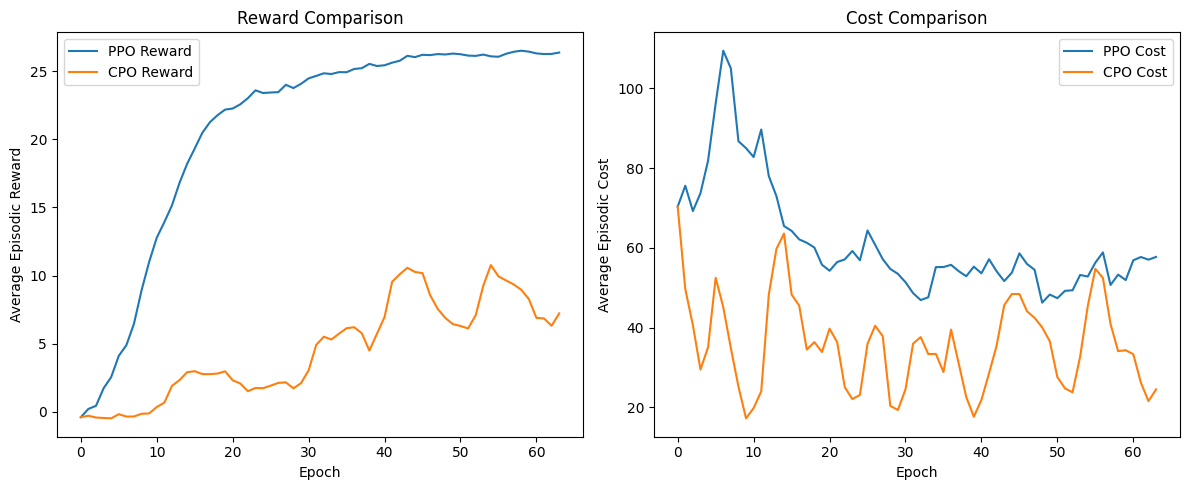

In [ ]:
# Cell 4: Plot PPO vs. CPO

ppo_rewards, ppo_costs = load_from_csv('PPO', env_id, base_dir=custom_cfgs['logger_cfgs']['log_dir'])
print(f"PPO: {len(ppo_rewards)} epochs loaded.")

cpo_rewards, cpo_costs = load_from_csv('CPO', env_id, base_dir=custom_cfgs['logger_cfgs']['log_dir'])
print(f"CPO: {len(cpo_rewards)} epochs loaded.")


epochs = np.arange(len(ppo_rewards))

plt.figure(figsize=(12, 5))

# Plot rewards
plt.subplot(1, 2, 1)
plt.plot(epochs, ppo_rewards, label='PPO Reward')
plt.plot(epochs, cpo_rewards, label='CPO Reward')
plt.xlabel('Epoch')
plt.ylabel('Average Episodic Reward')
plt.title('Reward Comparison')
plt.legend()

# Plot costs
plt.subplot(1, 2, 2)
plt.plot(epochs, ppo_costs, label='PPO Cost')
plt.plot(epochs, cpo_costs, label='CPO Cost')
plt.xlabel('Epoch')
plt.ylabel('Average Episodic Cost')
plt.title('Cost Comparison')
plt.legend()

plt.tight_layout()
plt.savefig('results/ppo_vs_cpo_comparison.png')
plt.show()


# Transition vers le monde réel


▶ seed-000-2025-05-01-22-39-34: epoch-64.pt
Episode 1 results:
Episode reward: 27.830927063136187
Episode cost: 37.0
Episode length: 1000.0
Episode 2 results:
Episode reward: 25.80961165667759
Episode cost: 0.0
Episode length: 1000.0
Episode 3 results:
Episode reward: 29.198831241483276
Episode cost: 58.0
Episode length: 1000.0
Episode 4 results:
Episode reward: 27.346523559801426
Episode cost: 20.0
Episode length: 1000.0
Episode 5 results:
Episode reward: 26.084074549609795
Episode cost: 99.0
Episode length: 1000.0
Episode 6 results:
Episode reward: 25.907408202930128
Episode cost: 43.0
Episode length: 1000.0
Episode 7 results:
Episode reward: 27.077611144697585
Episode cost: 94.0
Episode length: 1000.0
Episode 8 results:
Episode reward: 27.91891482962751
Episode cost: 48.0
Episode length: 1000.0
Episode 9 results:
Episode reward: 25.0615330472574
Episode cost: 0.0
Episode length: 1000.0
Episode 10 results:
Episode reward: 26.956604085828076
Episode cost: 36.0
Episode length: 1000.0


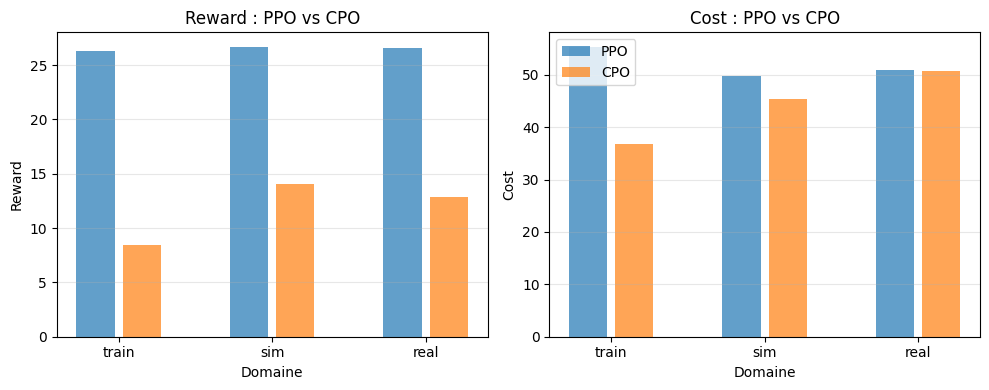

In [17]:
# Cell 5: Évaluation PPO / CPO (train, sim, real) via OmniSafe
import os, glob, warnings, pathlib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import defaultdict
import torch, gymnasium as gym, safety_gymnasium as sg, omnisafe
warnings.filterwarnings("ignore", category=UserWarning)

TAIL_EPOCHS = 10
ENV_ID      = "SafetyPointGoal1-v0"
ALGOS       = ("PPO","CPO")
RECORDS     = []

def newest_seed_dir(algo:str, env_id:str)->pathlib.Path:
    seeds = glob.glob(f"./results/{algo}-{{{env_id}}}/seed-*")
    if not seeds: raise FileNotFoundError("aucun seed-*")
    return pathlib.Path(max(seeds, key=os.path.getmtime))
def newest_ckpt(seed_dir:pathlib.Path)->pathlib.Path:
    ckpts = sorted(seed_dir.glob("torch_save/*.pt"))
    if not ckpts: raise FileNotFoundError("aucun .pt")
    return ckpts[-1]
def training_stats(seed_dir:pathlib.Path, tail=TAIL_EPOCHS):
    df = pd.read_csv(seed_dir/"progress.csv").tail(tail)
    return df["Metrics/EpRet"].mean(), df["Metrics/EpCost"].mean()

class RealWorldWrapper(gym.Wrapper):
    def __init__(self, env, d=2, n=0.05, f=0.1):
        super().__init__(env); self.d,self.n,self.f=d,n,f; self.buf=[]
    def reset(self, **kw):
        self.buf=[np.zeros(self.action_space.shape)]*self.d
        obs,info=self.env.reset(**kw); return obs+self._noise(), info
    def step(self, a):
        self.buf.append(a); act=self.buf.pop(0)
        try: self.env.unwrapped.sim.data.xfrc_applied[0]=np.random.normal(0,self.f,6)
        except Exception: pass
        out=self.env.step(act)
        if len(out)==6: obs,r,c,done,trunc,info=out; info=dict(info); info['cost']=c
        else:           obs,r,done,trunc,info=out
        return obs+self._noise(), r, done, trunc, info
    def _noise(self): return np.random.normal(0,self.n,self.observation_space.shape)

def omni_evaluate(seed_dir:pathlib.Path, env:gym.Env, episodes=100):
    ckpt=newest_ckpt(seed_dir)
    print(f" {seed_dir.name}: {ckpt.name}")
    ev=omnisafe.Evaluator(env=env, render_mode='rgb_array')
    ev.load_saved(save_dir=str(seed_dir), model_name=ckpt.name,
                  camera_name=None,width=0,height=0)
    res=ev.evaluate(num_episodes=episodes)

    if isinstance(res, dict):
        returns, costs = res["Return"], res["Cost"]
    else:
        returns, costs = res
    returns, costs = np.asarray(returns), np.asarray(costs)
    return returns.mean(), costs.mean(), np.mean((costs>25).astype(float))

for algo in ALGOS:
    seed=newest_seed_dir(algo,ENV_ID)
    r,c=training_stats(seed)
    RECORDS.append(dict(algo=algo,domain="train",reward=r,cost=c,viol=np.nan))

sim_env=sg.make(ENV_ID)
for algo in ALGOS:
    seed=newest_seed_dir(algo,ENV_ID)
    r,c,v=omni_evaluate(seed, sim_env, 100)
    RECORDS.append(dict(algo=algo,domain="sim",reward=r,cost=c,viol=v))
sim_env.close()

real_env=RealWorldWrapper(sg.make(ENV_ID))
for algo in ALGOS:
    seed=newest_seed_dir(algo,ENV_ID)
    r,c,v=omni_evaluate(seed, real_env, 100)
    RECORDS.append(dict(algo=algo,domain="real",reward=r,cost=c,viol=v))
real_env.close()

df=pd.DataFrame(RECORDS)
print("\n==== Tableau récapitulatif ====\n",
      df.pivot(index='algo',columns='domain',
               values=['reward','cost','viol']).round(2))

plt.figure(figsize=(10,4))
domains=['train','sim','real']; x=np.arange(len(domains))
for i,var in enumerate(("reward","cost")):
    plt.subplot(1,2,i+1)
    for j,algo in enumerate(ALGOS):
        vals=df[df.algo==algo].set_index('domain')[var].loc[domains]
        plt.bar(x+0.3*j,vals,width=0.25,label=algo,alpha=0.7)
    plt.xticks(x+0.15,domains); plt.xlabel("Domaine"); plt.ylabel(var.capitalize())
    plt.title(f"{var.capitalize()} : PPO vs CPO"); plt.grid(True,axis='y',alpha=0.3)
plt.legend(); plt.tight_layout(); plt.show()
